# Modelagem estatística e preditiva para dados de séries temporais


por **Cibele Russo**

**ICMC/USP - São Carlos SP**

**Escola avançada de Big Data Analysis - 25/11/2024**

Todos os direitos reservados. Proibida a reprodução sem autorização da Profa. Cibele Russo.

#### Resumo:
Este mini-curso aborda brevemente aspectos de modelagem estatística e preditiva para dados de séries temporais com métodos de Holt-Winters, Theta e modelos ARIMA. Serão abordados temas como a identificação de padrões de tendência e sazonalidade, análise de autocorrelação e autocorrelação parcial e métodos para a escolha de modelos. Serão abordados aspectos de teoria e prática, com ferramentas em Python para análise de dados reais. Conhecimentos básicos prévios de estatística e programação são recomendados.



**Referências:**

1. **Morettin, P.A.; Toloi, C.M.C. Análise de Séries Temporais - Modelos lineares univariados. Blucher, 2018.**
2. Eric D. Kolaczyk, Gábor Csárdi. Statistical Analysis of Network Data with R, Springer. 2014.
3. Paul S.P. Cowpertwait, Andrew V. Metcalfe. Introductory Time Series with R, Springer. 2009.
4. Louzada-Neto, F. ; Mazucheli, J. ; Achcar, J.A. . Análise de Sobrevivência e Confiabilidade. Lima, Peru: Instituto de Matematicas y Ciencias Afines, IMCA, 2002.
5. Colosimo, E. A. ; Giolo, S. R. Análise de Sobrevivência Aplicada. Blucher, 2006.
6. **Hyndman, R. ; Athanasopoulos, G. Forecasting: Principles and Practice. OTexts, 2018. Disponível em https://otexts.com/fpp3/**
7. Ehlers, R.S. Análise de Séries Temporais. ICMC USP. 2009.

# Séries temporais

### O que é uma série temporal?

**<span style="color:darkred">Uma série temporal é qualquer conjunto de observações ordenadas no tempo.</span>**

**Exemplos**

- valores diários de poluição na cidade de São Paulo

- número de óbitos diários registrados por COVID-19 no Brasil

- índices diários da Bovespa

- registro de marés no porto de Santos


**Objetivos**

São objetivos gerais dos estudos de séries temporais:

- **Identificar** padrões como tendência, sazonalidade, observações discrepantes (outliers);

- Usar a variação passada de uma série para **predizer** valores futuros. Embora não seja possível prever exatamente os valores futuros, podemos predizer um comportamento aproximado das próximas observações;

- **Entender** a variação conjunta de duas séries, e utilizar uma série para explicar a variação em outra série.

#### Para uma série temporal, observações vizinhas estão **correlacionadas**. Se em modelos de regressão a ordem das observações não importa, em modelos de séries temporais a ordem dos dados é crucial (Ehlers, 2009).

Algumas características são particulares a esse tipo de dados, por exemplo:

- Observações correlacionadas são mais difíceis de analisar e requerem técnicas específicas.

- Precisamos levar em conta a ordem temporal das observações.

- Fatores complicadores como presenca de tendências e variação sazonal ou cíclica podem ser difíceis de estimar ou remover.

- A seleção de modelos pode ser bastante complicada, e as ferramentas podem ser de difícil interpretação.

- É mais difıcil de lidar com observações perdidas e dados discrepantes devido à natureza sequencial.


## Motivação - Séries Temporais

### Exemplo: Dados de COVID-19 no estado de SP

Fonte dos dados originais: Brasil.IO: boletins epidemiológicos da COVID-19 por município por dia, disponível em: [https://brasil.io/datasets/](https://brasil.io/datasets/) (acesso em 08/03/2021,
utilizados dados até 31/12/2020). A partir dos dados originais, diversas bases de dados com registros de casos e óbitos por cidades brasileiras foram obtidas e serão disponibilizadas para estudo.

In [225]:
# Carrega as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [226]:
# Leitura dos dados

url = 'https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/covidSP.csv'

covidSP = pd.read_csv(url, parse_dates=True, index_col=0)
covidSP.head()

confirmed  deaths
date                         
2020-02-26          0       0
2020-02-27          0       0
2020-02-28          1       0
2020-02-29          0       0
2020-03-01          0       0

In [227]:
covidSP.tail()

confirmed  deaths
date                         
2020-12-26       1253      13
2020-12-27       2836      55
2020-12-28       1576      39
2020-12-29      12477     293
2020-12-30      11849     282

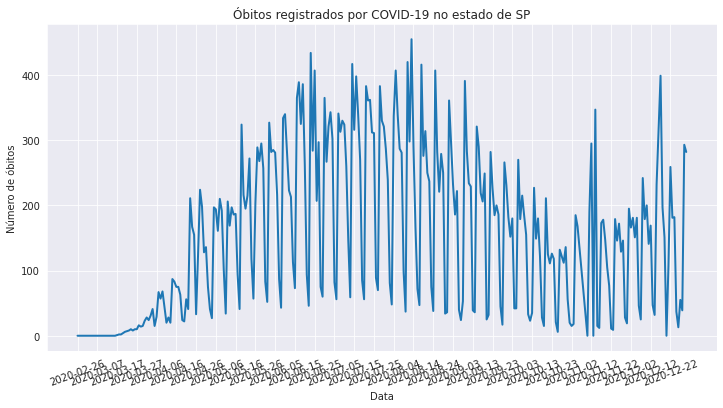

In [228]:
# COVID - Considere agora os dados de mortes diárias

y = covidSP['deaths']
x = covidSP.index

plt.rcParams['figure.figsize'] = [12,6]

plt.rc('font', size=10) # Altera o tamanho da fonte
plt.plot(x,y,label="Real data") # Plota os dados

plt.xticks(np.arange(x.min(),x.max(),10, dtype='datetime64[D]'),rotation=20)
plt.title("Óbitos registrados por COVID-19 no estado de %s" % 'SP')
plt.xlabel("Data")
plt.ylabel("Número de óbitos")
plt.ylim()
plt.show()


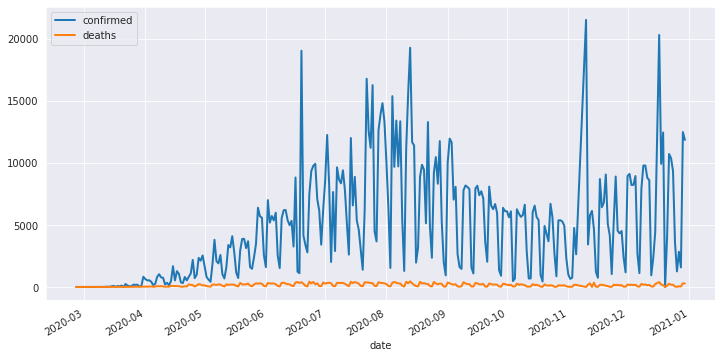

In [229]:
covidSP.plot();

**Exercícios**

1. Mesmo antes das definições formais, o que você entende por **tendência** e **sazonalidade** dos dados nesse caso?

2. Por que elas ocorrem?

### Motivação - Tendência e Sazonalidade

Considere o problema de decompor a série de mortes em **tendência, sazonalidade e resíduos (ruído)**. São conceitos que veremos adiante, mas usamos este problema para motivar o estudo de séries temporais.

In [230]:
# Instale o pacote statsmodels se necessário
#!pip show statsmodels

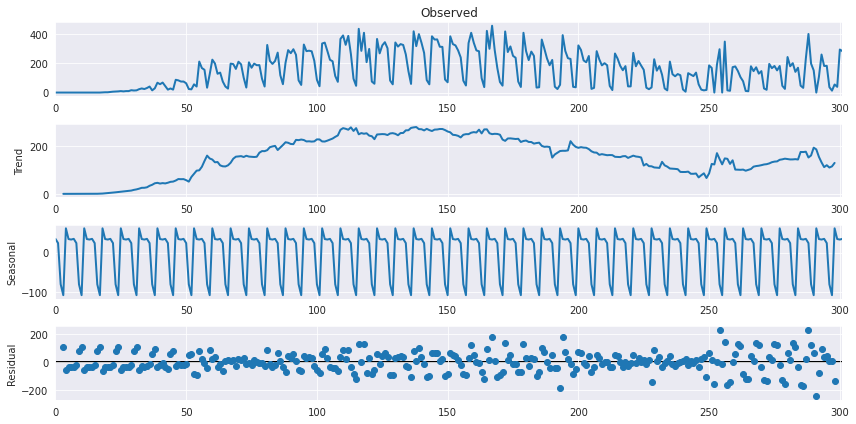

In [231]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

# y aqui são as mortes em SP

mortes = np.array(y)

result = seasonal_decompose(mortes, model='additive', period=7)
result.plot()

pyplot.show()

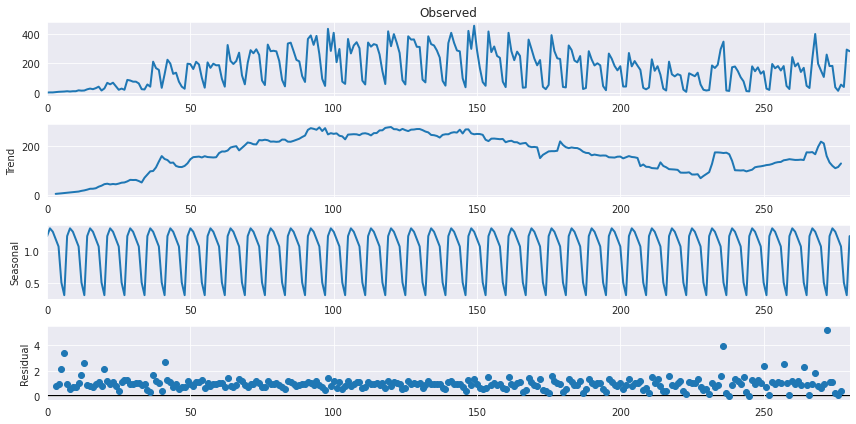

In [232]:
mortes = np.array(y)
mortes_pos = mortes[mortes>0]

result = seasonal_decompose(mortes_pos, model='multiplicative', period=7)
result.plot()

pyplot.show()

### Obs: Lidando com datas

In [233]:
covidSP.index

DatetimeIndex(['2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
               '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06',
               ...
               '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24',
               '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', name='date', length=302, freq=None)

**Caso o índice não seja do tipo DatetimeIndex, algumas alternativas podem ser utilizadas:**


In [234]:
idx = pd.date_range('25/2/2020', periods=7, freq='D')
idx

DatetimeIndex(['2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-02-29', '2020-03-01', '2020-03-02'],
              dtype='datetime64[ns]', freq='D')

In [235]:
idx = pd.date_range('25/02/2020', periods=7, freq='M')
idx

DatetimeIndex(['2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31', '2020-08-31'],
              dtype='datetime64[ns]', freq='M')

In [236]:
idx = pd.to_datetime(['Feb 02, 2020', '2/25/2020', '25-Feb-2020', None], dayfirst=False, format='mixed')
print(idx)

DatetimeIndex(['2020-02-02', '2020-02-25', '2020-02-25', 'NaT'], dtype='datetime64[ns]', freq=None)


# Conceitos básicos

## Processos estocásticos

Os modelos utilizados para descrever séries temporais são processos estocásticos. Em geral, assume-se que uma **série temporal observada é uma realização de um processo estocástico adjacente**.


**Definição**

Seja $T$ um conjunto arbitrário. Um _processo estocástico_ é uma família $Z = \{Z(t), t\in T\}$ tal que, para cada $t\in T$, $Z(t)$ é uma variável aleatória.


Um processo estocástico pode ser visto como uma família de variáveis aleatórias. Por outro lado, uma realização ou trajetória do processo estocástico pode ser visto como uma **série temporal**.



O **espaço de estados** de um processo estocástico é o conjunto de todos os possíveis valores que as variáveis aleatórias $Z(t)$ podem assumir.

Características estatísticas:

- Média: $\mu(t) = E(Z(t))$

- Variância: $\sigma^2(t) = Var(Z(t))$

- Autocovariância: $\gamma(t_1,t_2) = E[Z(t_1)-\mu(t_1)][Z(t_2)-\mu(t_2)]$



### Séries Temporais


Considere uma série temporal $Z(t_1),Z(t_2),\ldots,Z(t_n)$ observada nos instantes $t_1,\ldots,t_n$, ou seja, uma realização ou trajetória de um processo estocástico. Temos interesse em

- **Investigar** o mecanismo gerador da série

- **Fazer previsões** para valores futuros da série

- **Descrever** o comportamento da série

- **Procurar periodicidades** relevantes nos dados

As séries temporais podem ser **contínuas** ou **discretas**, **univariadas** ou **multivariadas**.


# Tendência e Sazonalidade



Considere as observações $\{Z_t, t=1,\ldots,N\}$ de uma série temporal.

Podemos escrever um modelo de decomposição de $Z_t$ como uma soma de três componentes não-observáveis:

$$Z_t = T_t + S_t + a_t$$

em que

- $T_t$ representa uma componente de **tendência**

- $S_t$ representa uma componente de **sazonalidade**

- $a_t$ é uma **componente aleatória** (resíduos ou ruído), com média 0 e variância $\sigma^2_a$ .

Se $\{a_t\}$ for um ruído branco, então $Cov(a_t,a_s) = 0$ com $s\neq t$, mas podemos eventualmente relaxar essa suposição supondo $\{a_t\}$ um processo estacionário. Segue-se que, em geral, $\{Z_t\}$ é uma série não-estacionária.

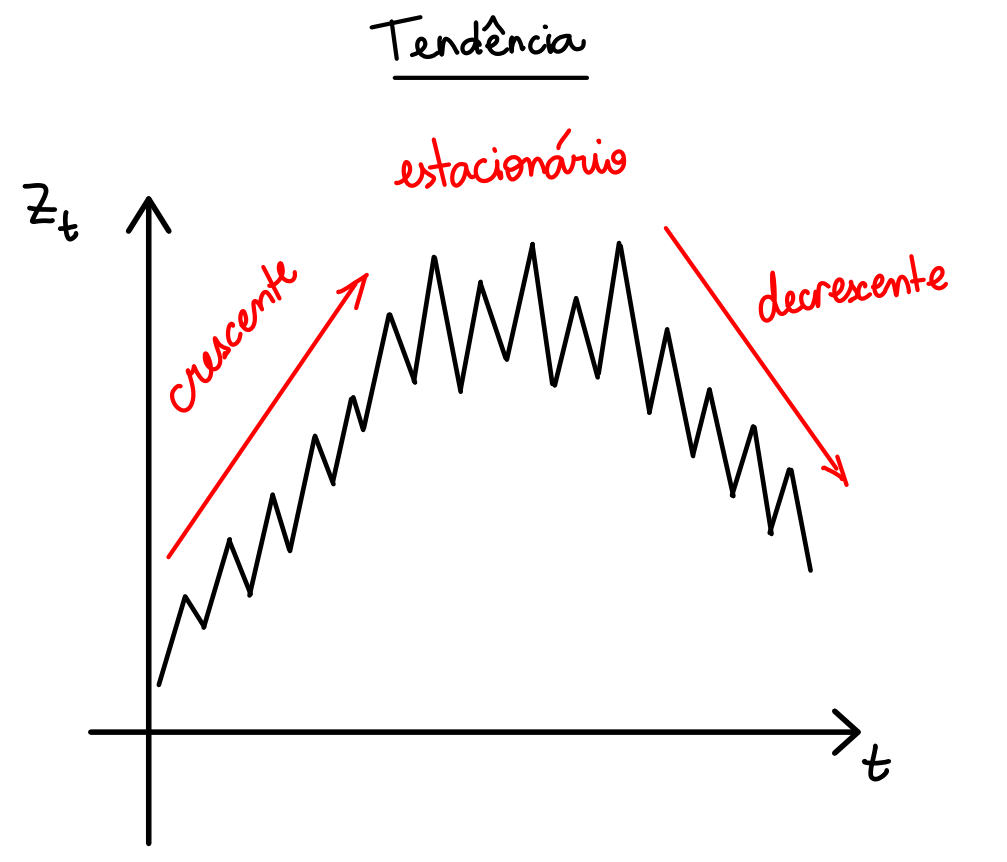

## Tendência

Suponha inicialmente que a componente sazonal $S_t$ não esteja presente. Um modelo inicial é

$$Z_t = T_t + a_t$$

em que $a_t$ é um ruído branco, com variância $\sigma^2_a$.

Queremos estimar $T_t$. Para isso, considere algumas possibilidades:

i. ajustar uma função no tempo, como um polinômio, uma exponencial ou outra função suave de $t$;

ii. suavizar (ou filtrar) os valores da série ao redor de um ponto, para estimar a tendência naquele ponto

iii. suavizar os valores da série através de sucessivos ajustes de retas de mínimos quadrados ponterados ('lowess')



Estimada a tendência, $\widehat{T}_t$, podemos obter a série ajustada para tendência ou livre de tendência

$$Y_t = Z_t - \widehat{T}_t$$

Para eliminar a tendência de uma série, também é possível considerar as diferenças. Normalmente para séries econômicas, a primeira diferença

$\Delta Z_t = Z_t - Z_{t-1}$ já é estacionária.



### Tendência polinomial

Suponha que

$$T_t = \beta_0+\beta_1t + \ldots +\beta_m t^m$$

onde o grau do polinômio $m$ é bem menor do que o número de observações N.

Pode-se utilizar o método de mínimos quadrados para estimar $\beta_0,\ldots,\beta_m$ e obter $\widehat{\beta}_0,\ldots,\widehat{\beta}_m$.

In [237]:
# Exemplo tendência polinomial - Carregando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt


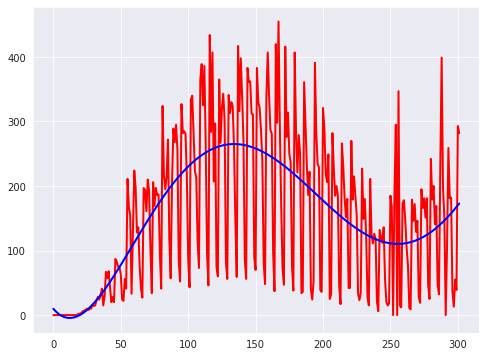

In [238]:
#Leitura dos dados

url = 'https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/covidSP.csv'

# Leitura via github
covidSP = pd.read_csv(url,index_col='date',parse_dates=True)

# Aqui não trabalharemos com as datas mas sim com um índice inteiro das observações
x = np.array(range(len(covidSP.index)))
y = np.array(covidSP['deaths'])

polynomial = np.polyfit(x, y, 5)
p5 = np.poly1d(polynomial)

xx = np.linspace(x.min(), x.max(), len(y))

plt.rcParams['figure.figsize'] = [8,6]

plt.plot(x,y,label="Real data",color="red") # Plota os dados
plt.plot(xx,p5(xx),label="Polinomio",color="blue") # Polinômio

## Sazonalidade

Comportamento da série temporal tende a se repetir a cada s perı́odos de tempo.

Por exemplo, para dados de COVID-19, os picos em geral ocorrem às terças-feiras e aos fins de semana os registros diminuem, dada a sistemática das notificações.

**Tipos de Sazonalidade**

- **Aditiva**. A série apresenta flutuações sazonais mais ou menos constantes não importando o nı́vel global da série.

- **Multiplicativa**. O tamanho das flutuações sazonais varia dependendo do nı́vel global da série.


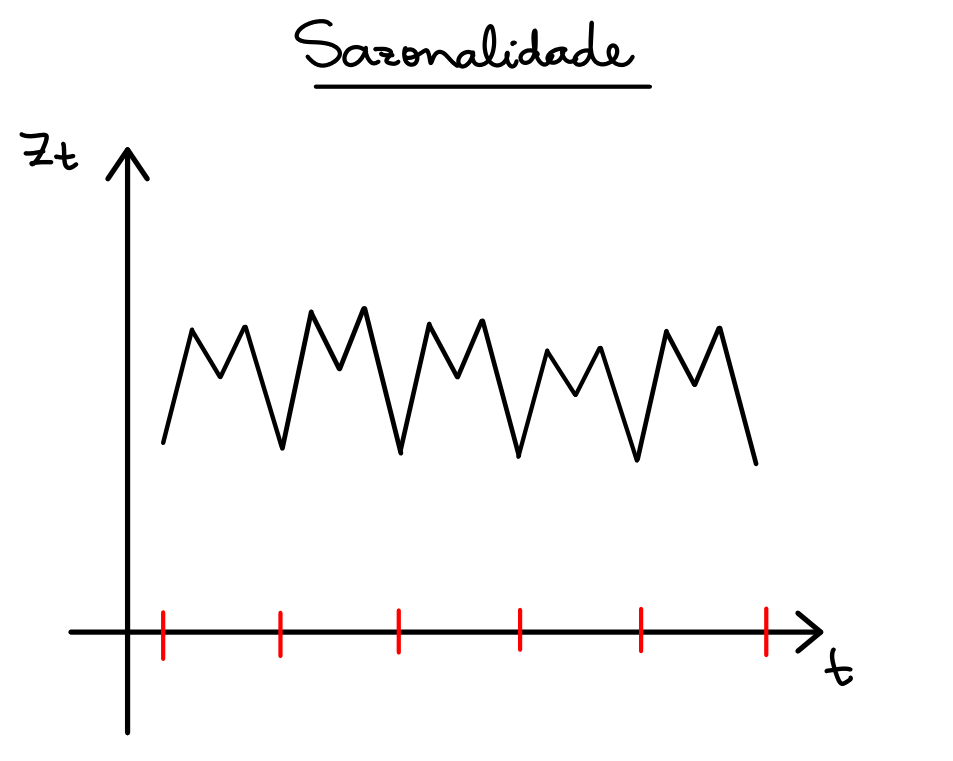

Considere as observações $\{Z_t, t=1,\ldots,N\}$ de uma série temporal.

Supondo que não existe tendência mas somente sazonalidade :

$$Z_t =  S_t + a_t$$

em que

- $S_t$ representa uma componente de **sazonalidade**

- $a_t$ é um ruído branco com média 0 e variância $\sigma^2_a$.

Se a sazonalidade for multiplicativa o modelo é definido como

$$Z_t =  S_t  a_t$$

**Métodos para estimar a sazonalidade**

Para obter a sazonalidade ajustada $\widehat{S_t}$, podemos utilizar diferentes métodos:

- **Método da regressão** (método determinístico) em que as covariáveis são variáveis periódicas, por exemplo seno, cosseno ou variáveis 'dummy', que são variáveis indicadoras  


- **Médias móveis** (método estocástico)

E então obtemos a série livre de sazonalidade (ou sazonalmente ajustada)


$$Y_t = Z_t - \widehat{S}_t, \text{  no caso aditivo, ou}$$


$$Y_t = Z_t / \widehat{S}_t \text{ no caso multiplicativo}$$

Aqui, nós usaremos a função [seasonal_decompose](https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) do pacote [statsmodels](https://www.statsmodels.org/stable/index.html).

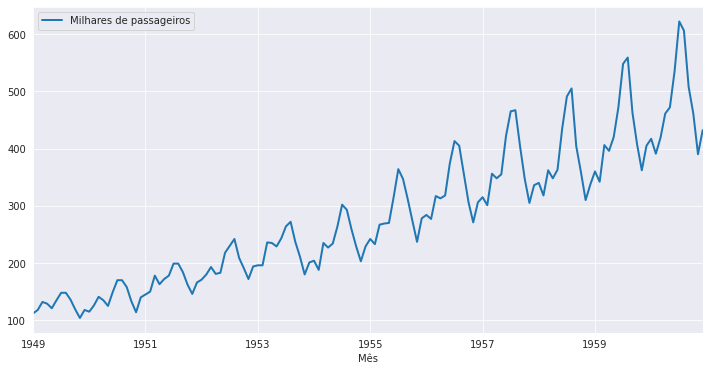

In [239]:
### Passageiros

# Agendamento de passageiros (em milhares) por mês na Pan Am nos Estados Unidos, observadas mensalmente no período de 1949-1960 (Brown, R. G. "Smoothing." Forecasting and Prediction of Discrete Time Series, 1963).
# A companhia usou os dados para prever a demanda futura e antes de programar compras e novas aeronaves e de treinar funcionários.

# Air Passengers: Passageiros aéreos
# Vamos ler os dados direto do github

url='https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/airline_passengers.csv'
passageiros = pd.read_csv(url, index_col=0,parse_dates=True)

passageiros.index = passageiros.index.to_period("M")

passageiros.plot(figsize=(12,6));

<Axes: xlabel='Mês'>

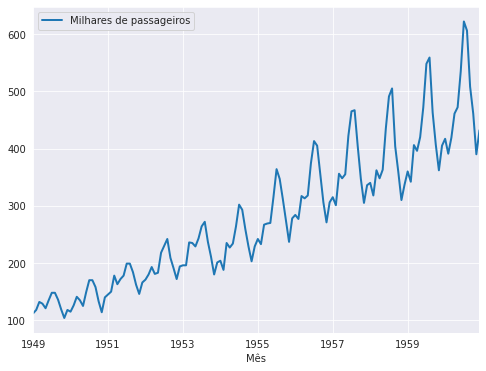

In [240]:
# Para essa análise, os dados faltantes devem ser excluídos!

passageiros = passageiros.dropna()

passageiros.plot()

# A sazonalidade é aditiva ou multiplicativa?


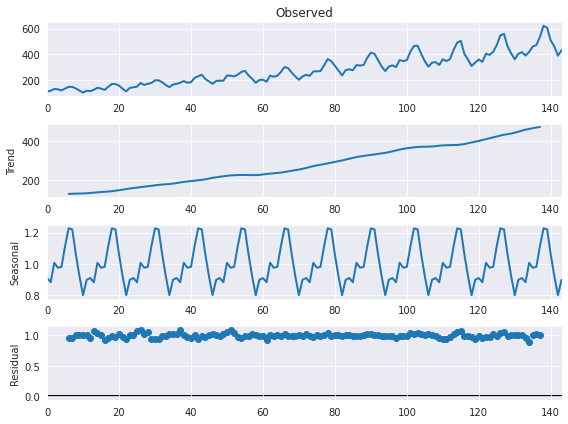

In [241]:
import statsmodels.api as sm

# Decomposição em tendência e sazonalidade

passag = np.array(passageiros['Milhares de passageiros'])

result = sm.tsa.seasonal_decompose(passag, model='multiplicative', period=12)


result.plot();


In [242]:
# Olhe para as componentes do objeto result

result.seasonal

array([0.91023037, 0.88362532, 1.00736629, 0.97590601, 0.98137803,
       1.11277583, 1.22655554, 1.21991097, 1.06049193, 0.92175724,
       0.80117808, 0.89882439, 0.91023037, 0.88362532, 1.00736629,
       0.97590601, 0.98137803, 1.11277583, 1.22655554, 1.21991097,
       1.06049193, 0.92175724, 0.80117808, 0.89882439, 0.91023037,
       0.88362532, 1.00736629, 0.97590601, 0.98137803, 1.11277583,
       1.22655554, 1.21991097, 1.06049193, 0.92175724, 0.80117808,
       0.89882439, 0.91023037, 0.88362532, 1.00736629, 0.97590601,
       0.98137803, 1.11277583, 1.22655554, 1.21991097, 1.06049193,
       0.92175724, 0.80117808, 0.89882439, 0.91023037, 0.88362532,
       1.00736629, 0.97590601, 0.98137803, 1.11277583, 1.22655554,
       1.21991097, 1.06049193, 0.92175724, 0.80117808, 0.89882439,
       0.91023037, 0.88362532, 1.00736629, 0.97590601, 0.98137803,
       1.11277583, 1.22655554, 1.21991097, 1.06049193, 0.92175724,
       0.80117808, 0.89882439, 0.91023037, 0.88362532, 1.00736

In [243]:
result.trend

array([         nan,          nan,          nan,          nan,
                nan,          nan, 126.79166667, 127.25      ,
       127.95833333, 128.58333333, 129.        , 129.75      ,
       131.25      , 133.08333333, 134.91666667, 136.41666667,
       137.41666667, 138.75      , 140.91666667, 143.16666667,
       145.70833333, 148.41666667, 151.54166667, 154.70833333,
       157.125     , 159.54166667, 161.83333333, 164.125     ,
       166.66666667, 169.08333333, 171.25      , 173.58333333,
       175.45833333, 176.83333333, 178.04166667, 180.16666667,
       183.125     , 186.20833333, 189.04166667, 191.29166667,
       193.58333333, 195.83333333, 198.04166667, 199.75      ,
       202.20833333, 206.25      , 210.41666667, 213.375     ,
       215.83333333, 218.5       , 220.91666667, 222.91666667,
       224.08333333, 224.70833333, 225.33333333, 225.33333333,
       224.95833333, 224.58333333, 224.45833333, 225.54166667,
       228.        , 230.45833333, 232.25      , 233.91

# Suavização e Alisamento exponencial



## Suavização

- A suavização permite que a tendência da série em um instante t possa ser estimada usando-se observações $Z_s$ com $s$ ao redor de $t$, por exemplo, usando as observações $Z_{t-n},Z_{t-n+1},\ldots, Z_{t+n}$ para estimar $T_t$.

- Procedimentos não paramétricos para aproximar localmente a série

- Transformação da série $Z_t$ em uma série $Z_t^{\star}$

Considere que as observações da série temporal $\{Z_t\}$ possam ser localmente decompostas em seu nível e mais um ruído aleatório

$$Z_t = \mu_t + a_t, \text{ para } t=1,\ldots, N$$

com $E(a_t)=0$ e $Var(a_t) = \sigma^2$ e $\mu_t$ é um parâmetro desconhecido, que pode variar lentamente com o tempo e que queremos estimar.



Alguns procedimentos de suavização:

- Médias móveis

- Medianas móveis

- Lowess

- Métodos de Holt-Winters




## Média móvel simples


Dadas as observações $Z_1,\ldots,Z_N$, a média móvel é dada por

$$Z_t^{\star} = M_t = \displaystyle{\frac{Z_t+Z_{t-1}+\ldots +Z_{t-(r+1)}}{r}},$$

ou

$$Z_t^{\star} = M_t = M_{t-1} + \displaystyle{\frac{Z_t-Z_{t-r}}{r}}$$



In [244]:
# Médias móveis para dados de passageiros aéreos

import pandas as pd
import numpy as np
%matplotlib inline

In [245]:
# Leitura dos dados

url = 'https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/airline_passengers.csv'

# Leitura via github
# Air Passengers: Passageiros aéreos
passageiros = pd.read_csv(url, index_col=0,parse_dates=True)

# Tirar dados faltantes pois influenciariam no cálculo da média móvel
passageiros = passageiros.dropna()

# OU poderia fazer simplesmente passageiros.dropna(inplace=True)

In [246]:
passageiros.head()

Milhares de passageiros
Mês                                
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

Podemos criar uma série para a média móvel simples usando a função mean em rolling, que usa janelas deslizantes.
[Veja a documentação do rolling do pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)




In [247]:
passageiros['MMS-6-meses'] = passageiros['Milhares de passageiros'].rolling(window=6).mean()
passageiros['MMS-12-meses'] = passageiros['Milhares de passageiros'].rolling(window=12).mean()

In [248]:
passageiros.head(15)

Milhares de passageiros  MMS-6-meses  MMS-12-meses
Mês                                                           
1949-01-01                      112          NaN           NaN
1949-02-01                      118          NaN           NaN
1949-03-01                      132          NaN           NaN
1949-04-01                      129          NaN           NaN
1949-05-01                      121          NaN           NaN
1949-06-01                      135   124.500000           NaN
1949-07-01                      148   130.500000           NaN
1949-08-01                      148   135.500000           NaN
1949-09-01                      136   136.166667           NaN
1949-10-01                      119   134.500000           NaN
1949-11-01                      104   131.666667           NaN
1949-12-01                      118   128.833333    126.666667
1950-01-01                      115   123.333333    126.916667
1950-02-01                      126   119.666667    127.583333
1950-03-01                      141   120.500000    128.333333

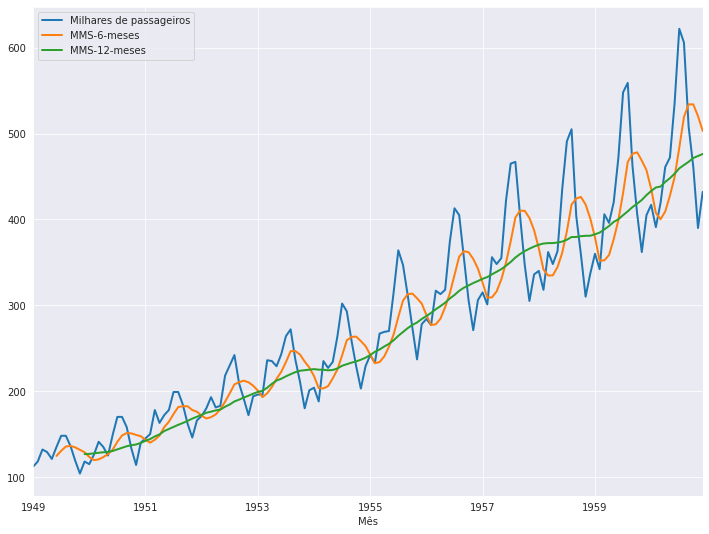

In [249]:
passageiros.plot(figsize=(12,9));

**Exercício:**

Crie um gráfico da mediana móvel. Quais as implicações?

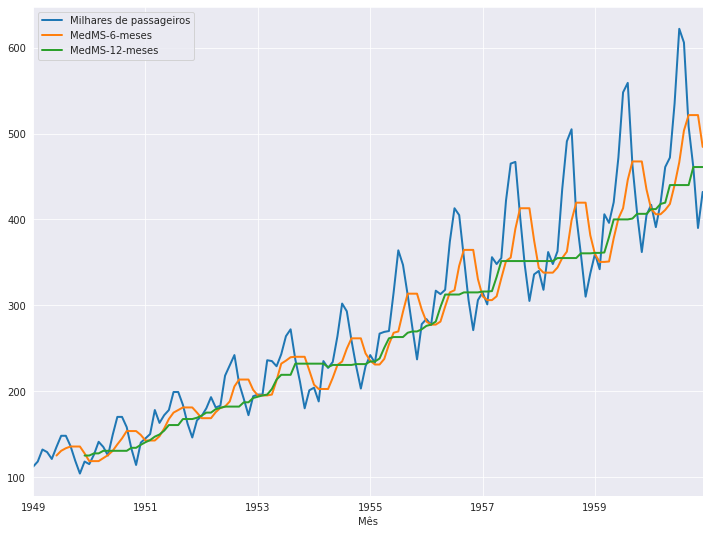

In [250]:
passageiros['MedMS-6-meses'] = passageiros['Milhares de passageiros'].rolling(window=6).median()
passageiros['MedMS-12-meses'] = passageiros['Milhares de passageiros'].rolling(window=12).median()

passageiros[['Milhares de passageiros','MedMS-6-meses','MedMS-12-meses']].plot(figsize=(12,9));

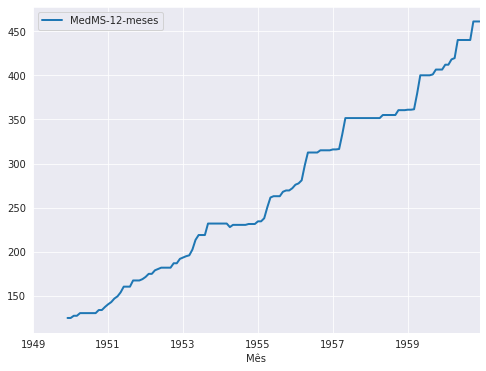

In [251]:
passageiros[['MedMS-12-meses']].plot(figsize=(8,6));

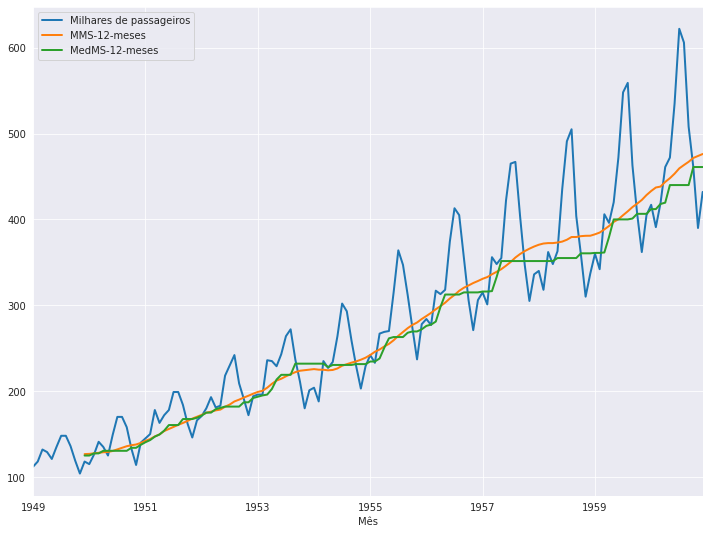

In [252]:
passageiros[['Milhares de passageiros','MMS-12-meses','MedMS-12-meses']].plot(figsize=(12,9));

## Média móvel exponencialmente ponderada  (MMEP)

As médias móveis simples têm algumas desvantagens:

- Janelas menores levarão a mais ruído, em vez de sinal.
- Ele nunca alcançará o pico ou vale máximo dos dados devido ao cálculo da média.
- Valores históricos extremos podem distorcer significativamente a MMS



Uma possível proposta para contornar esses problemas é a **média móvel exponencialmente ponderada**.

A MMEP permite reduzir o efeito de atraso da MMS e dará mais peso aos valores que ocorreram mais recentemente (aplicando mais peso aos valores mais recentes, portanto, o nome). A quantidade de peso aplicada aos valores mais recentes dependerá dos parâmetros reais usados na MMEP e do número de períodos determinados pelo tamanho da janela.


A MMEP é dada por

$$\overline{Z}_t = \alpha Z_t + (1-\alpha) Z_{t-1},$$

com $\overline{Z}_0=Z_1$;  $t=1,\ldots,N,$ e $\alpha$ é uma constante tal que $0\leq\alpha\leq 1$.



Uma representação alternativa mais geral da MMEP implementada em Python é

$\overline{Z}_t =  \displaystyle \frac{\sum\limits_{i=0}^{t-1} w_i Z_{t-i}}{\sum\limits_{i=0}^{t-1} w_i}$

Aqui, $Z_t$ é a entrada, $w_i$ é o peso aplicado (Note que os pesos podem ser diferentes de $i=0$ a $(t-1)$), e $\overline{Z}_t$ é a saída.

Agora a questão é, como podemos definir o peso $w_i$?

Isso pode ser feito mudando valores do parâmetro adjust no método .ewm (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html)

Quando <tt>adjust=True</tt> (default) as médias móveis ponderadas são calculadas usando pesos iguais a $w_i = (1 - \alpha)^i$

o que nos dá

$$\overline{Z}_t = \displaystyle\frac{Z_t + (1 - \alpha)Z_{t-1} + (1 - \alpha)^2 Z_{t-2} + \ldots+ (1 - \alpha)^{t-1} Z_{1}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...+ (1 - \alpha)^{t-1}}$$

Quando <tt>adjust=False</tt> as médias móveis são calculadas da forma

$\begin{array}{ll}\overline{Z}_0 &= Z_1 \\
\overline{Z}_t &= (1 - \alpha) Z_{t-1} + \alpha Z_t,\end{array}$

o que é equivalente a usar os pesos

$w_i = \begin{cases}
    \alpha (1 - \alpha)^i & \text{se } i < t \\
    (1 - \alpha)^i        & \text{se } i = t.
\end{cases}$

Quando adjust=True nós temos $\overline{Z}_0=Z_1$ e da última representação acima nós temos
$\overline{Z}_t=\alpha Z_t+(1−α)\overline{Z}_{t−1}$, portanto existe uma suposição que $Z_1$ não é um valor ordinário mas um momento exponencialmente ponderado das séries infinitas até aquele ponto.

Para o fator de suavização $\alpha$ tem-se que $0<\alpha≤1$ e é frequentemente mais fácil pensar ou em **span**, **centro de massa** ou **meia vida** de um momento exponencialmente ponderado

$\alpha =
 \begin{cases}
     \displaystyle\frac{2}{s + 1},               & \text{para span}\ s \geq 1\\
     \displaystyle\frac{1}{1 + c},               & \text{para centro de massa}\ c \geq 0\\
     \displaystyle 1 - \exp{\displaystyle(\frac{\log 0.5}{h})}, & \text{para meia-vida}\ h > 0
 \end{cases}$

* **Span** (período) corresponde ao que é comumente chamado uma "média móvel exponencialmente ponderada em N dias".
* **Centro de massa** tem uma interpretação física e pode ser pensado em termos do span: $c=(s−1)/2$
* **Meia-vida** é o período de tempo para o peso exponencial se reduzir pela metade.
* **Alpha** especifica o fator de suavização diretamente.

Temos que passar precisamente um dos parâmetros acima para a função .ewm(). Usaremos span=12.

In [253]:
passageiros['MMEP12'] = passageiros['Milhares de passageiros'].ewm(span=12,adjust=False).mean()

In [254]:
passageiros

Milhares de passageiros  MMS-6-meses  MMS-12-meses  MedMS-6-meses  \
Mês                                                                             
1949-01-01                      112          NaN           NaN            NaN   
1949-02-01                      118          NaN           NaN            NaN   
1949-03-01                      132          NaN           NaN            NaN   
1949-04-01                      129          NaN           NaN            NaN   
1949-05-01                      121          NaN           NaN            NaN   
...                             ...          ...           ...            ...   
1960-08-01                      606   519.166667    463.333333          503.5   
1960-09-01                      508   534.000000    467.083333          521.5   
1960-10-01                      461   534.000000    471.583333          521.5   
1960-11-01                      390   520.333333    473.916667          521.5   
1960-12-01                      432   503.166667    476.166667          484.5   

            MedMS-12-meses      MMEP12  
Mês                                     
1949-01-01             NaN  112.000000  
1949-02-01             NaN  112.923077  
1949-03-01             NaN  115.857988  
1949-04-01             NaN  117.879836  
1949-05-01             NaN  118.359861  
...                    ...         ...  
1960-08-01           440.0  494.898619  
1960-09-01           440.0  496.914216  
1960-10-01           461.0  491.388952  
1960-11-01           461.0  475.790652  
1960-12-01           461.0  469.053629  

[144 rows x 6 columns]

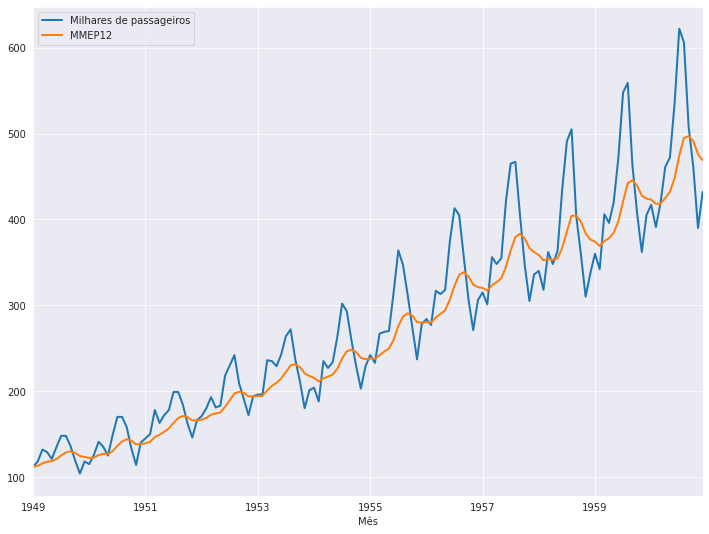

In [255]:
passageiros[['Milhares de passageiros','MMEP12']].plot(figsize=(12,9));

## Comparando MMS com MMEP

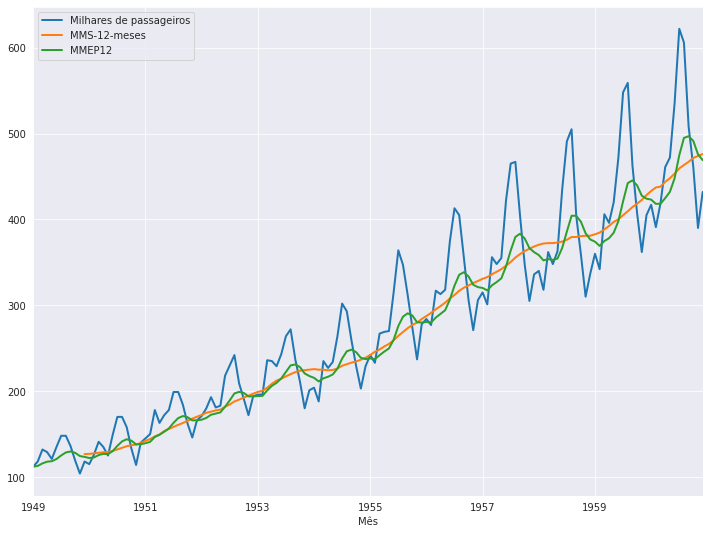

In [256]:
passageiros[['Milhares de passageiros','MMS-12-meses','MMEP12']].plot(figsize=(12,9)).autoscale(axis='x',tight=True);

**Exercício**

Aplique os métodos de média móvel (7 dias) e média exponencialmente ponderada (span=7) aos dados de mortes registradas por COVID-19 no estado de SP.


In [257]:
# Leitura dos dados

url = 'https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/covidSP.csv'

# Leitura via github
covidSP = pd.read_csv(url,index_col='date',parse_dates=True)


In [258]:
covidSP.head()

confirmed  deaths
date                         
2020-02-26          0       0
2020-02-27          0       0
2020-02-28          1       0
2020-02-29          0       0
2020-03-01          0       0

In [259]:
covidSP['MMS-7-dias'] = covidSP['deaths'].rolling(window=7).mean()
covidSP['MMEP-7'] = covidSP['deaths'].ewm(span=7,adjust=False).mean()

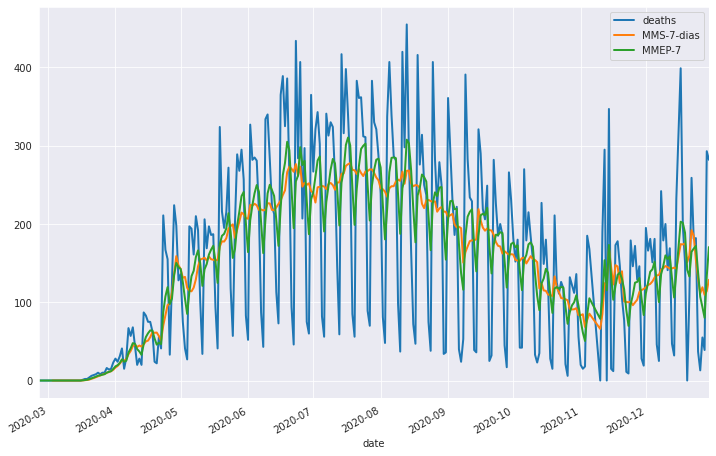

In [260]:
covidSP[['deaths','MMS-7-dias','MMEP-7']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

**Exercício**
Repita para 14 dias e span=14.
Compare esses resultados com os gráficos com 5 dias e span=5.
Você nota alguma relação com esses parâmetros e a suavidade da curva?

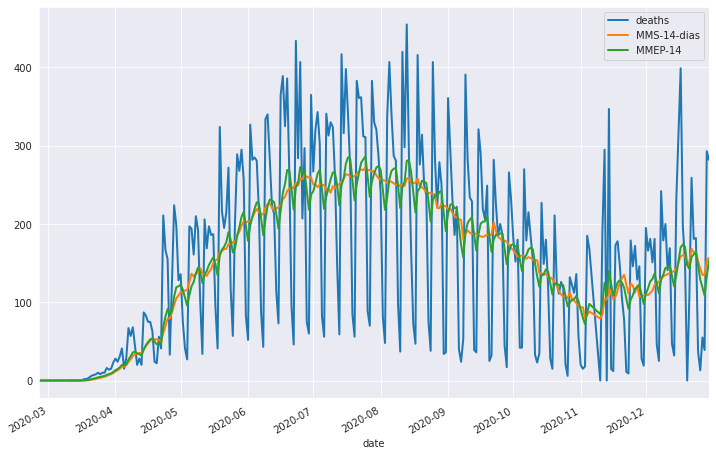

In [261]:
covidSP['MMS-14-dias'] = covidSP['deaths'].rolling(window=14).mean()
covidSP['MMEP-14'] = covidSP['deaths'].ewm(span=14,adjust=False).mean()
covidSP[['deaths','MMS-14-dias','MMEP-14']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

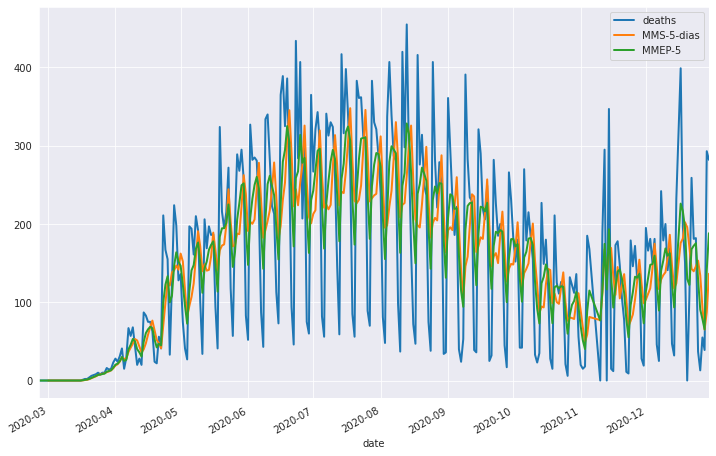

In [262]:
covidSP['MMS-5-dias'] = covidSP['deaths'].rolling(window=5).mean()
covidSP['MMEP-5'] = covidSP['deaths'].ewm(span=5,adjust=False).mean()
covidSP[['deaths','MMS-5-dias','MMEP-5']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

## Algumas outras séries que não iremos tratar em detalhes neste curso mas que podem ser exploradas similarmente


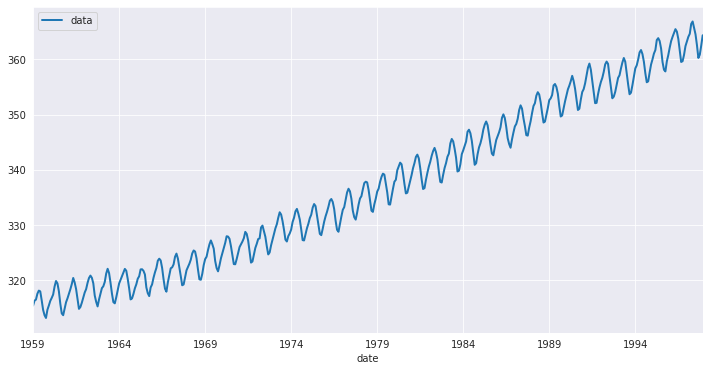

In [263]:
# Exemplo - CO2

# CO2 Concentrações atmosfericas de CO2 (em ppm) janeiro/1953 a dezembro/1997
# Dados disponíveis em https://github.com/mjuez/pytsdatasets/ e
# https://github.com/cibelerusso/Aprendizado-Dinamico/tree/main/Data

url='https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/co2.csv'
co2 = pd.read_csv(url, index_col=0, parse_dates=True)
co2.index = co2.index.to_period("M")

co2.plot(figsize=(12,6));

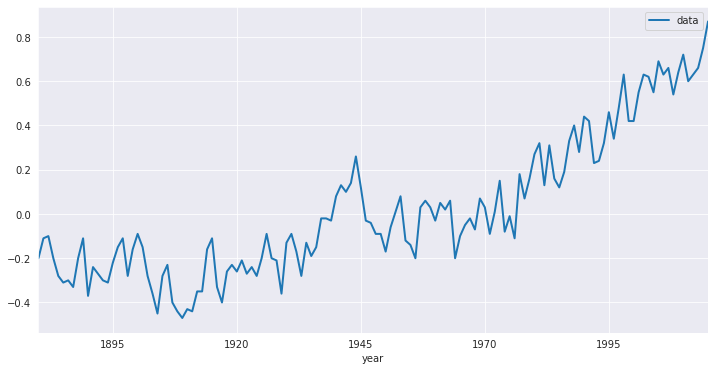

In [264]:
# Temperatura global

# Diferenças na média de temperatura global.
# Dados disponíveis em https://github.com/mjuez/pytsdatasets/ e
# https://github.com/cibelerusso/Aprendizado-Dinamico/tree/main/Data

url='https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/globaltemp.csv'
globaltemp = pd.read_csv(url, index_col=0, parse_dates=True)
globaltemp.index = globaltemp.index
globaltemp.plot(figsize=(12,6));


In [265]:
globaltemp

data
year            
1880-01-01 -0.20
1881-01-01 -0.11
1882-01-01 -0.10
1883-01-01 -0.20
1884-01-01 -0.28
...          ...
2011-01-01  0.60
2012-01-01  0.63
2013-01-01  0.66
2014-01-01  0.75
2015-01-01  0.87

[136 rows x 1 columns]

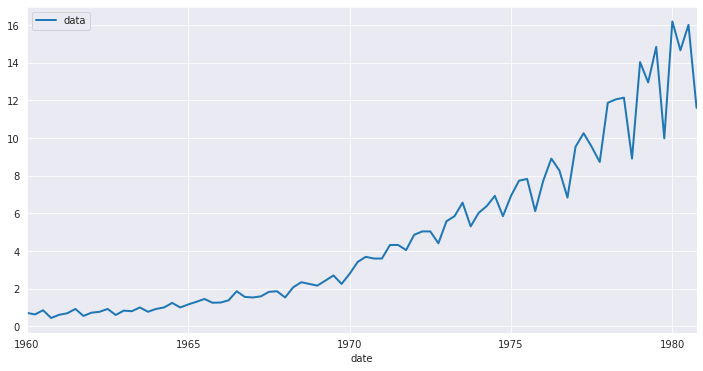

In [266]:
# Jhonson & Johnson

# Ganhos quadrimestrais da Jhonson & Jhonson
# Dados disponíveis em https://github.com/mjuez/pytsdatasets/ e
# https://github.com/cibelerusso/Aprendizado-Dinamico/tree/main/Data

url='https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/jj.csv'
jj = pd.read_csv(url, index_col=0, parse_dates=True)
jj.index = jj.index.to_period("Q")
jj.plot(figsize=(12,6));


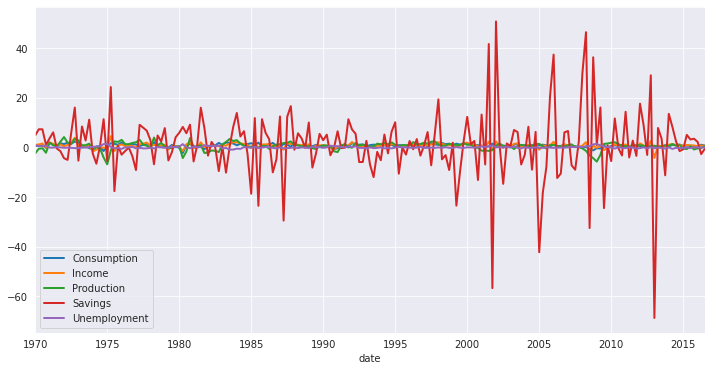

In [267]:
# US Change 1970 a 2016
# Fontes:
# Hyndman, Rob J., and George Athanasopoulos. Forecasting: principles and practice. OTexts, 2018.
# Dados disponíveis em https://github.com/robjhyndman/fpp2-package e
# https://github.com/cibelerusso/Aprendizado-Dinamico/tree/main/Data
# Percentage changes in quarterly personal consumption expenditure, personal disposable income, production, savings and the unemployment rate for the US, 1960 to 2016.

uschange = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/uschange.csv', index_col=0,
                       parse_dates=True)
uschange.index = uschange.index.to_period("Q")
uschange.plot(figsize=(12,6));

In [268]:
uschange

Consumption    Income  Production   Savings  Unemployment
date                                                             
1970Q1     0.615986  0.972261   -2.452700  4.810312           0.9
1970Q2     0.460376  1.169085   -0.551525  7.287992           0.5
1970Q3     0.876791  1.553271   -0.358708  7.289013           0.5
1970Q4    -0.274245 -0.255272   -2.185455  0.985230           0.7
1971Q1     1.897371  1.987154    1.909734  3.657771          -0.1
...             ...       ...         ...       ...           ...
2015Q3     0.664970  0.801663    0.380606  3.180930          -0.3
2015Q4     0.561680  0.740063   -0.845546  3.482786           0.0
2016Q1     0.404682  0.519025   -0.417930  2.236534           0.0
2016Q2     1.047707  0.723721   -0.203319 -2.721501          -0.1
2016Q3     0.729598  0.644701    0.474918 -0.572858           0.0

[187 rows x 5 columns]

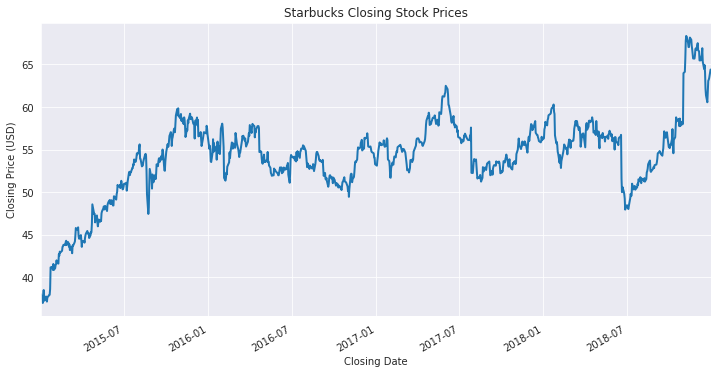

In [269]:
# Preço de fechamento e volume negociado de ações da Starbucks entre 2015 e 2018
# SBUX dataset
# Mais informações em https://medium.com/analytics-vidhya/pull-open-source-stock-price-history-using-python-d67ad0e3efe2
# Disponível em https://github.com/cibelerusso/Aprendizado-Dinamico/tree/main/Data

url='https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/starbucks.csv'
df = pd.read_csv(url,index_col='Date',parse_dates=True)

title='Starbucks Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Closing Date'

ax = df['Close'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);


Você pode repetir a decomposição em tendência e sazonalidade para algumas dessas séries, e mesmo utilizar janelas deslizantes para observar as médias móveis simples e exponencialmente ponderadas.

Na próxima semana daremos continuidade às técnicas de suavização com os **Métodos de Suavização Holt-Winters**, e falaremos também sobre estacionariedade e outros aspectos de séries temporais.

# Métodos de Suavização de Holt e Holt-Winters

por **Cibele Russo**

Baseado em

- MORETTIN, P. A.; TOLOI, C. M. C.. Análise de séries temporais: modelos lineares univariados. 3. ed. São Paulo: Blucher, 2018.

- EHLERS, R.S. Análise de Séries Temporais. ICMC USP. 2009.

Métodos de Holt e Holt-Winters:

- COWPERTWAIT, P. S.P., METCALFE, A. V. Introductory time series with R. Springer New York, NY, 2009.

- HYNDMAN, R. J., ATHANASOPOULOS, G.; Forecasting: principle and practice: O Texts; 2nd edition. 2018. Material sobre Holt-Winters disponível em https://otexts.com/fpp2/holt-winters.html. Acesso em 15/07/2024.

- HOLT, C.  Forecasting trends and seasonals by exponentially weighted averages. ONR. Memorandum no.52, p. 5-10, Carregie Institute of Technology.1957.

- WINTERS, P.R. Forecasting sales by exponentially weighted moving averages. Management Science, 6:324–342. 1960. DOI: https://doi.org/10.1287/mnsc.6.3.324

Implementações:

- BROWNLEE, J. Introduction to time series forecasting with python: how to prepare data and develop models to predict the future. Machine Learning Mastery, 2017.

- https://www.statsmodels.org/devel/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html

- https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/

## MMS e MMEP

Na aula anterior, vimos métodos de suavização médias móveis e médias móveis exponencialmente ponderadas considerando a seguinte decomposição de uma série temporal $\{Z_t\}$

$$Z_t = \mu_t + a_t, \text{ para } t=1,\ldots, N$$

com $E(a_t)=0$ e $Var(a_t) = \sigma^2$ e $\mu_t$ um parâmetro desconhecido.

Esses métodos não levam em consideração que a série tem uma componente de tendência.

São técnicas descritivas não aconselháveis para fazer previsão.


**Queremos estimar a tendência e a sazonalidade, e com isso já podemos fazer previsões!**


Considere inicialmente que a série temporal seja composta localmente por soma de nível, tendência e erro aleatório (ruído), com média zero e variância constante $\sigma^2_a$, isto é

$$Z_t = \mu_t + T_t + a_t, \text{ com  } t=1,\ldots, N.$$



## Método de Holt

Parecido com a MMEP, porém utiliza uma nova constante para modelar a **tendência**

Os valores do nível e da tendência da série, no instante $t$, serão estimados por

$\overline{Z}_t = A Z_t + (1-A)(\overline{Z}_{t-1} + \widehat{T}_{t-1}),\ 0<A<1 \text{ e } t=2,\ldots,N$

$\widehat{T}_t = C (\overline{Z}_t - \overline{Z}_{t-1}) + (1-C) \widehat{T}_{t-1},\ 0<C<1 \text{ e } t=2,\ldots,N,$

respectivamente, $A$ e $C$ são denominadas constantes de suavização.


### Previsão

A previsão para o valor $Z_{t+h}$ com origem em $t$ é dada por

$\widehat{Z}_{t} (h)= \overline{Z}_t + h \widehat{T}_{t},\ \forall h>0$

ou seja, adiciona-se ao valor básico $\overline{Z}_t$ a tendência multiplicada pelo número de passos à frente que se deseja prever $(h)$.


Para atualizar a previsão, quando tivermos uma nova observação $Z_{t+1}$, podemos fazer

$\overline{Z}_{t+1} = A Z_{t+1} + (1-A)(\overline{Z}_{t} + \widehat{T}_{t}),$

$\widehat{T}_{t+1} = C (\overline{Z}_{t+1} - \overline{Z}_{t}) + (1-C) \widehat{T}_{t}$

e a nova previsão do valor $Z_{t+h}$ dado que temos uma nova observação $Z_{t+1}$ será

$$\widehat{Z}_{t+1}(h-1) = \overline{Z}_{t+1} + (h-1)\widehat{T}_{t+1}.$$

Precisamos assumir hipóteses sobre os valores iniciais, por exemplo, assumir que $\widehat{T}_2 = Z_2-Z_1$ e $\overline{Z}_2 = Z_2$. Se $Z_t$ for gerado por um processo $ARIMA(0,2,2)$, essa previsão será ótima.


As constantes $A$ e $C$ são escolhidas de forma que a soma dos erros quadráticos de previsão seja mínimo.

## Método de Holt-Winters

Para séries com padrão de comportamento mais complexo, existem outras formas de suavização, tais com os métodos de Holt-Winters.

Considere uma série sazonal com período $s$.

### Modelo com sazonalidade multiplicativa e tendência aditiva

$$Z_t = \mu_t F_t + T_t + a_t, \text{ com  } t=1,\ldots, N.$$

As três equações de suavização são dadas por

$\widehat{F}_t = D \left(\displaystyle\frac{Z_t}{\overline{Z}_t}\right) + (1-D)\widehat{F}_{t-s}, 0<D<1, t=s+1,\ldots,N$

$\overline{Z}_t = A  \left(\displaystyle\frac{Z_t}{\widehat{F}_{t-s}}\right) + (1-A)(\overline{Z}_{t-1} + \widehat{T}_{t-1}),\ 0<A<1 \text{ e } t=s+1,\ldots,N$

$\widehat{T}_t = C (\overline{Z}_t - \overline{Z}_{t-1}) + (1-C) \widehat{T}_{t-1},\ 0<C<1 \text{ e } t=s+1,\ldots,N,$

e representam estimativas do fator sazonal, do nível e da tendência, respectivamente, e $A$, $C$ e $D$ são constantes de suavização.




### Previsão


$\widehat{Z}_t(h) = (\overline{Z}_t+h \widehat{T}_t)\widehat{F}_{t+h-s}, h=1,2,\ldots,s$

$\widehat{Z}_t(h) = (\overline{Z}_t+h \widehat{T}_t)\widehat{F}_{t+h-2s}, h=s+1,\ldots,2s$

$\vdots \ \  \ \  =\ \  \ \   \vdots$

onde $\overline{Z}_t$, $\widehat{F}_t$ e $\widehat{T}_t$ são obtidos das equações do método.

Para fazermos atualizações das previsões, quando temos uma nova observação $Z_{t+1}$, utilizamos os valores

$\widehat{F}_{t+1} = D \displaystyle\left(\frac{Z_{t+1}}{\overline{Z}_{t+1}}\right) + (1-D)\widehat{F}_{{t+1}-s},$

$\overline{Z}_{t+1} = A  \displaystyle\left(\frac{Z_{t+1}}{\widehat{F}_{{t+1}-s}}\right) + (1-A)(\overline{Z}_{t} + \widehat{T}_{t}),$

$\widehat{T}_{t+1} = C (\overline{Z}_{t+1} - \overline{Z}_{t}) + (1-C) \widehat{T}_{t},$

e a nova previsão para a observação $Z_{t+h}$ será

$\widehat{Z}_{t+1}(h-1) = (\overline{Z}_{{t+1}}+(h-1)\widehat{T}_{t+1})\widehat{F}_{t+1+h-s}, h=1,2,\ldots,s+1$

$\widehat{Z}_{t+1}(h-1) = (\overline{Z}_{{t+1}}+(h-1)\widehat{T}_{t+1})\widehat{F}_{t+1+h-2s}, h=s+2,\ldots, 2s+1$


Também é necessário fazer suposições sobre os valores iniciais para o processo.

### Modelo com sazonalidade e tendência aditivas

$$Z_t = \mu_t + T_t +F_t+ a_t, \text{ com  } t=1,\ldots, N.$$

As estimativas do fator sazonal, do nível e da tendência da série são dadas por

$\widehat{F}_t = D   ({Z}_t - \overline{Z}_{t})+ (1-D)\widehat{F}_{t-s}, 0<D<1, t=s+1,\ldots,N$

$\overline{Z}_t = A  (Z_t - \widehat{F}_{t-s}) + (1-A)(\overline{Z}_{t-1} + \widehat{T}_{t-1}),\ 0<A<1 \text{ e } t=s+1,\ldots,N$

$\widehat{T}_t = C (\overline{Z}_t - \overline{Z}_{t-1}) + (1-C) \widehat{T}_{t-1},\ 0<C<1 \text{ e } t=s+1,\ldots,N,$

respectivamente, e $A$, $C$ e $D$ são constantes de suavização e são estimadas de forma que minimizem a soma dos quadrados dos erros dos ajustes.

### Previsão


$\widehat{Z}_t(h) = \overline{Z}_t+h \widehat{T}_t + \widehat{F}_{t+h-s}, h=1,2,\ldots,s$

$\widehat{Z}_t(h) = \overline{Z}_t+h \widehat{T}_t + \widehat{F}_{t+h-2s}, h=s+1,\ldots,2s$

$\vdots \ \  \ \  =\ \  \ \   \vdots$

onde $\overline{Z}_t$, $\widehat{F}_t$ e $\widehat{T}_t$ são obtidos das equações do método.

Para fazermos atualizações das previsões, quando temos uma nova observação $Z_{t+1}$, utilizamos os valores

$\widehat{F}_{t+1} = D   (Z_{t+1} - \overline{Z}_{t+1})+ (1-D)\widehat{F}_{t+1-s}, $

$\overline{Z}_{t+1} = A  (Z_{t+1} - \widehat{F}_{{t+1}-s}) + (1-A)(\overline{Z}_{{t}} + \widehat{T}_{{t}}),$

$\widehat{T}_{t+1} = C (\overline{Z}_{t+1} - \overline{Z}_{t}) + (1-C) \widehat{T}_{t},$


e a nova previsão para a observação $Z_{t+h}$ será

$\widehat{Z}_{t+1}(h-1) = \overline{Z}_{{t+1}}+(h-1)\widehat{T}_{t+1} + \widehat{F}_{t+1+h-s}, h=1,2,\ldots,s+1$

$\widehat{Z}_{t+1}(h-1) = \overline{Z}_{{t+1}}+(h-1)\widehat{T}_{t+1}+\widehat{F}_{t+1+h-2s}, h=s+2,\ldots, 2s+1$

Também é necessário fazer suposições sobre os valores iniciais para o processo.

Se $Z_t$ for gerado por um processo $ARIMA$, essa previsão será ótima.



## Visão geral de vantagens e desvantagens dos métodos de suavização

### Média móvel simples 

- Simples implementação;

- Aplicável mesmo com um número pequeno de observações;

- Flexibilidade de acordo com o tamanho da janela

Porém

- Método descritivo e não recomendável para previsões

- Não leva em consideração a componente de tendência na série


### Média móvel exponencialmente ponderada 

- Fácil compreensão e aplicabilidade;

- Necessidade de armazenar somente $Z_t$, $\overline{Z}_t$ e $\alpha$

Porém

- Método descritivo e não recomendável para previsões

- Não leva em consideração a componente de tendência na série

### Método de Holt 

- Pode ser usado para prever séries que tem tendência

- Apresenta um nível maior de dificuldade para encontrar os valores apropriados para as constantes de suavização $A$ e $C$, em geral que minimizem a soma dos quadrados dos erros dos ajustes

### Método de Holt-Winters 

- Pode ser usado para prever séries que tem tendência e sazonalidade, seja ela aditiva ou multiplicativa

Porém

- Impossibilidade e dificuldade para estudar propriedades estatísticas como média e variância das previsões, e consequentemente construção de intervalos de confiança para as previsões

- Nível maior de dificuldade para encontrar os valores apropriados para as constantes de suavização $A$, $C$ e $D$, em geral que minimizem a soma dos quadrados dos erros dos ajustes

### Aplicação: dados de passageiros aéreos

In [270]:
import pandas as pd
import numpy as np
%matplotlib inline


# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")


In [271]:
passageiros = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/airline_passengers.csv', index_col=0, parse_dates=True)
passageiros.head()

Milhares de passageiros
Mês                                
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

In [272]:
passageiros.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Mês', length=144, freq=None)

**Estabeleça a frequência do DatetimeIndex!**

Para construir um modelo de suavização Holt-Winters, o pacote statsmodels precisa saber a frequência dos dados. Para os dados de passageiros aéreos, as observações são coletadas no início do mês, usaremos MS.

Veja <a href='http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases'>aqui</a> uma lista de possibilidades.

In [273]:
passageiros.index.freq = 'MS'
passageiros.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Mês', length=144, freq='MS')


## Suavização exponencial simples

Uma variação da função Holt-Winters de statsmodels apresenta a Suavização exponencial simples, que fornece os mesmos cálculos da média móvel exponencialmente ponderada do método .ewm do pandas que vimos na última aula.

 $\begin{align}\overline{Z}_0 &= Z_1 \\
\overline{Z}_t &= (1 - \alpha) Z_{t-1} + \alpha Z_t,\end{align}$


In [274]:
# É possível ajustar a MMEP usando o pacote statsmodels.tsa.holtwinters e a função SimpleExpSmoothing

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12
alpha = 2/(span+1)

passageiros['MMEP12'] = passageiros['Milhares de passageiros'].ewm(alpha=alpha,adjust=False).mean()
passageiros['SES12'] = SimpleExpSmoothing(passageiros['Milhares de passageiros']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
passageiros.head()

Milhares de passageiros      MMEP12       SES12
Mês                                                        
1949-01-01                      112  112.000000  112.000000
1949-02-01                      118  112.923077  112.923077
1949-03-01                      132  115.857988  115.857988
1949-04-01                      129  117.879836  117.879836
1949-05-01                      121  118.359861  118.359861

## Método de Holt

In [275]:
# Método de Holt

from statsmodels.tsa.api import ExponentialSmoothing


modelo =  ExponentialSmoothing(passageiros['Milhares de passageiros'], trend='add');

ajustado = modelo.fit();

passageiros['Holt'] = ajustado.fittedvalues.shift(-1);

passageiros.head()



Milhares de passageiros      MMEP12       SES12        Holt
Mês                                                                    
1949-01-01                      112  112.000000  112.000000  114.102394
1949-02-01                      118  112.923077  112.923077  120.040657
1949-03-01                      132  115.857988  115.857988  134.001539
1949-04-01                      129  117.879836  117.879836  131.085845
1949-05-01                      121  118.359861  118.359861  123.110263

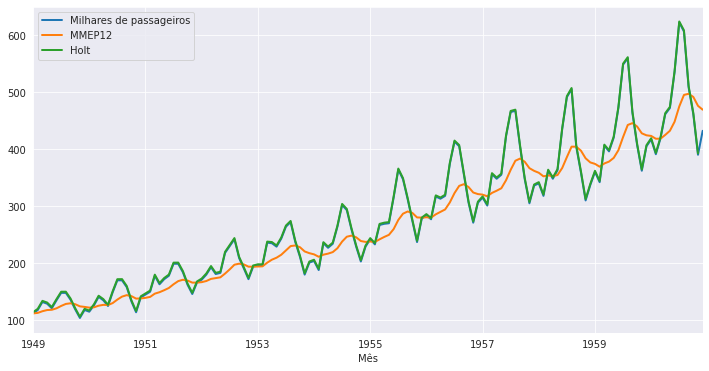

In [276]:
passageiros[['Milhares de passageiros','MMEP12','Holt']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

**Podemos notar que o método de Holt já apresenta um ajuste bem melhor do que a MMEP!**

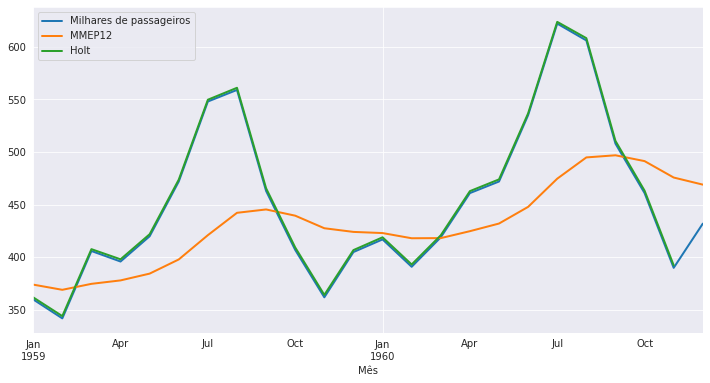

In [277]:
passageiros[['Milhares de passageiros','MMEP12','Holt']].iloc[-24:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

## Método de Holt-Winters - sazonalidade aditiva ou multiplicativa

In [278]:
# Ajuste do modelo pelo Método de Holt-Winters com sazonalidade aditiva

modelo =  ExponentialSmoothing(passageiros['Milhares de passageiros'],trend='add',seasonal='add',seasonal_periods=12);

ajustado = modelo.fit();

passageiros['Holt-Winters-adit-12'] = ajustado.fittedvalues;

passageiros.head()


Milhares de passageiros      MMEP12       SES12        Holt  \
Mês                                                                       
1949-01-01                      112  112.000000  112.000000  114.102394   
1949-02-01                      118  112.923077  112.923077  120.040657   
1949-03-01                      132  115.857988  115.857988  134.001539   
1949-04-01                      129  117.879836  117.879836  131.085845   
1949-05-01                      121  118.359861  118.359861  123.110263   

            Holt-Winters-adit-12  
Mês                               
1949-01-01            112.006984  
1949-02-01            120.149251  
1949-03-01            134.693302  
1949-04-01            131.367738  
1949-05-01            124.625107

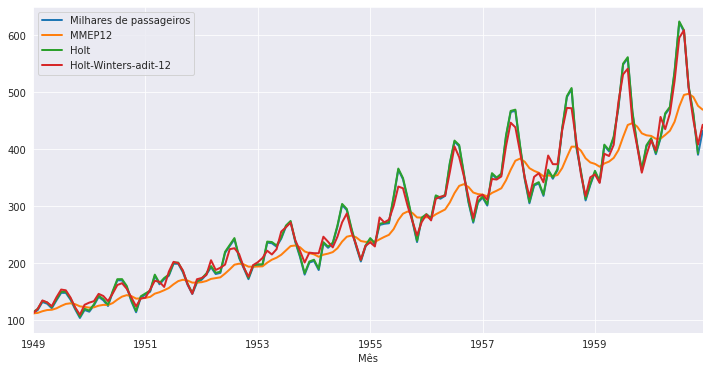

In [279]:
passageiros[['Milhares de passageiros','MMEP12','Holt', 'Holt-Winters-adit-12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [280]:
# Ajuste do modelo pelo Método de Holt-Winters com sazonalidade multiplicativa

modelo =  ExponentialSmoothing(passageiros['Milhares de passageiros'],trend='add',seasonal='mul',seasonal_periods=12)

ajustado = modelo.fit()

passageiros['Holt-Winters-mult-12'] = ajustado.fittedvalues

passageiros.tail()

Milhares de passageiros      MMEP12       SES12        Holt  \
Mês                                                                       
1960-08-01                      606  494.898619  494.898619  608.168786   
1960-09-01                      508  496.914216  496.914216  510.571382   
1960-10-01                      461  491.388952  491.388952  463.313463   
1960-11-01                      390  475.790652  475.790652  392.424879   
1960-12-01                      432  469.053629         NaN         NaN   

            Holt-Winters-adit-12  Holt-Winters-mult-12  
Mês                                                     
1960-08-01            608.232648            625.005552  
1960-09-01            507.657627            506.744124  
1960-10-01            451.326089            443.213013  
1960-11-01            407.931700            393.492899  
1960-12-01            442.600418            432.351059

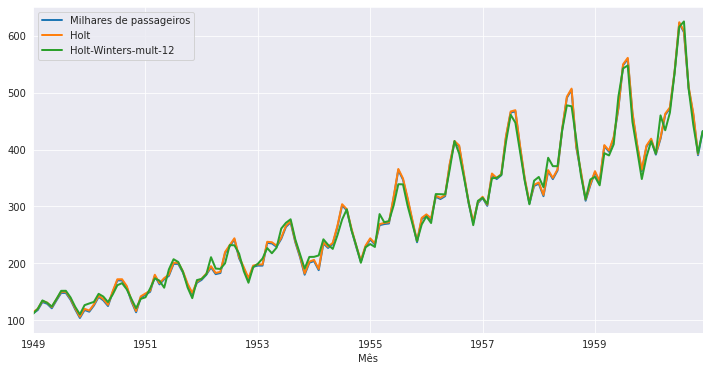

In [281]:
passageiros[['Milhares de passageiros','Holt','Holt-Winters-mult-12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

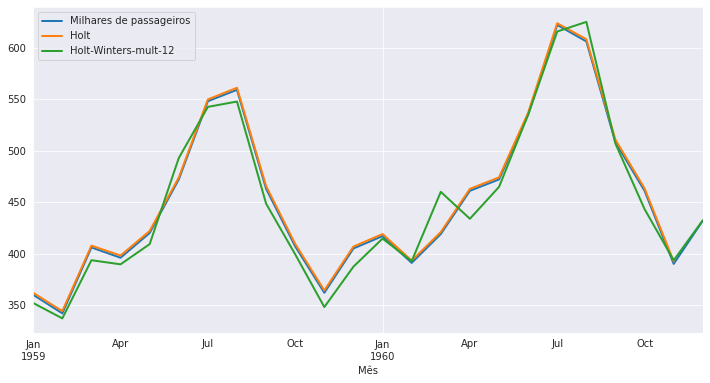

In [282]:
## Olhando somente para os últimos dois anos

passageiros[['Milhares de passageiros','Holt','Holt-Winters-mult-12']].iloc[-24:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Aparentemente, o método de Holt está performando melhor para esses dados.

Vamos ver como se comportam na predição de observações futuras?


In [283]:
len(passageiros)

144


## Previsão com o método Holt-Winters

Neste exemplo, usaremos o mesmo conjunto de dados airlines_passengers e os dividiremos em 108 registros de treinamento e 36 registros de teste. Em seguida, avaliaremos o desempenho do modelo.


In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

url='https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/airline_passengers.csv'
passageiros = pd.read_csv(url, index_col=0, parse_dates=True)


passageiros.index.freq = 'MS'
passageiros.head()

Milhares de passageiros
Mês                                
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

In [285]:
passageiros.tail()

Milhares de passageiros
Mês                                
1960-08-01                      606
1960-09-01                      508
1960-10-01                      461
1960-11-01                      390
1960-12-01                      432

In [286]:
passageiros.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Milhares de passageiros  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


## Divisão da base em treino e teste

In [287]:
dados_treino = passageiros.iloc[:108] # Dados de treinamento até observação 108, sem incluí-la
dados_teste = passageiros.iloc[108:] # Dados de teste a partir da observação 108

## Ajuste do modelo

In [288]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

ajustado_HW = ExponentialSmoothing(dados_treino['Milhares de passageiros'],trend='add',seasonal='mul',seasonal_periods=12).fit()


## Avaliação do modelo com predições para dados de teste

In [289]:
predito_HW = ajustado_HW.forecast(36).rename('Previsão Holt-Winters')



In [290]:
predito_HW.head()

1958-01-01    343.512143
1958-02-01    335.465298
1958-03-01    388.891944
1958-04-01    378.396546
1958-05-01    379.937308
Freq: MS, Name: Previsão Holt-Winters, dtype: float64

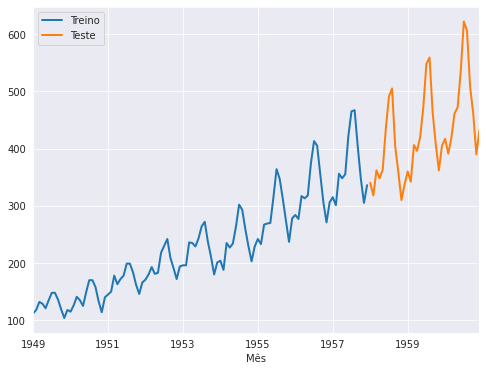

In [291]:
dados_treino['Milhares de passageiros'].plot(legend=True,label='Treino')
dados_teste['Milhares de passageiros'].plot(legend=True,label='Teste',figsize=(8,6));

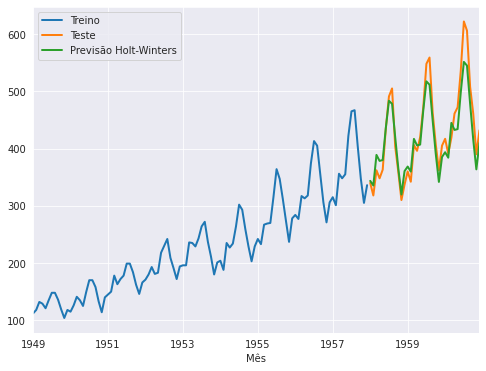

In [292]:
dados_treino['Milhares de passageiros'].plot(legend=True,label='Treino')
dados_teste['Milhares de passageiros'].plot(legend=True,label='Teste',figsize=(8,6))

predito_HW.plot(legend=True,label='Previsão Holt-Winters');



**Exercício: Obtenha a previsão pelo Método de Holt**


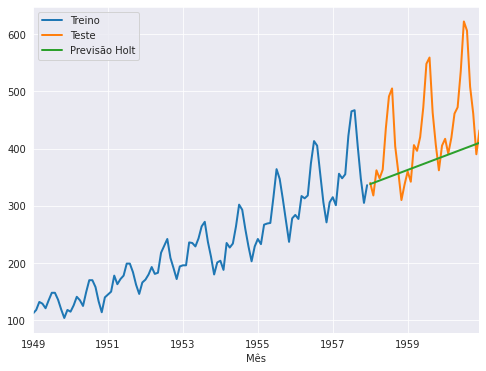

In [293]:
ajustado_H = ExponentialSmoothing(dados_treino['Milhares de passageiros'],trend='add').fit()
predito_H = ajustado_H.forecast(36).rename('Previsão Holt')


dados_treino['Milhares de passageiros'].plot(legend=True,label='Treino')
dados_teste['Milhares de passageiros'].plot(legend=True,label='Teste',figsize=(8,6))
predito_H.plot(legend=True,label='Previsão Holt');

## Métricas de avaliação dos ajustes

Para avaliar a distância da predição para o valor ajustado, usamos o erro quadrático médio e o erro absoluto médio

### Erro quadrático médio


$EQM = MSE = \displaystyle\sum_ {i=t+1}^{k}\frac{({Z_i - \widehat{Z}_i})^2}{k-t-1}$


### Erro absoluto médio

$EAM = MAE =  \displaystyle\sum_ {i=t+1}^{k}\frac{|{Z_t - \widehat{Z}_t}|}{k-t-1}$


In [294]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [295]:
mean_absolute_error(dados_teste,predito_HW)

22.629311210003227

In [296]:
mean_absolute_error(dados_teste,predito_H)

63.343307065273606

In [297]:
mean_squared_error(dados_teste,predito_HW)

749.0304177969965

In [298]:
mean_squared_error(dados_teste,predito_H)

7791.631326444599

In [299]:
np.sqrt(mean_squared_error(dados_teste,predito_HW))

27.36842008222244

In [300]:
np.sqrt(mean_squared_error(dados_teste,predito_H))

88.27021766396976

In [301]:
dados_teste.describe()

Milhares de passageiros
count                36.000000
mean                428.500000
std                  79.329152
min                 310.000000
25%                 362.000000
50%                 412.000000
75%                 472.000000
max                 622.000000

In [302]:
predito_HW.describe()

count     36.000000
mean     418.350044
std       59.952333
min      319.756686
25%      375.928394
50%      408.394148
75%      453.700127
max      551.342174
Name: Previsão Holt-Winters, dtype: float64

In [303]:
predito_H.describe()

count     36.000000
mean     373.968065
std       21.704398
min      337.916485
25%      355.942275
50%      373.968065
75%      391.993855
max      410.019644
Name: Previsão Holt, dtype: float64

## Previsão para os dados da COVID-19

In [304]:
# Dados de COVID-19 no estado de SP

import pandas as pd
import numpy as np
%matplotlib inline

covidSP = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/covidSP.csv', index_col=0, parse_dates=True)
covidSP.index = pd.to_datetime(covidSP.index)

In [305]:
covidSP.head()

confirmed  deaths
date                         
2020-02-26          0       0
2020-02-27          0       0
2020-02-28          1       0
2020-02-29          0       0
2020-03-01          0       0

In [306]:
covidSP.index.min()

Timestamp('2020-02-26 00:00:00')

In [307]:
covidSP.index.max()

Timestamp('2020-12-30 00:00:00')

In [308]:
idx = pd.date_range(start='2020-02-28', end='2020-12-30', freq='D')
idx

DatetimeIndex(['2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02',
               '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
               '2020-03-07', '2020-03-08',
               ...
               '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24',
               '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', length=307, freq='D')

In [309]:
covidSP = covidSP.reindex(idx)
covidSP.head(30)

confirmed  deaths
2020-02-28        1.0     0.0
2020-02-29        0.0     0.0
2020-03-01        0.0     0.0
2020-03-02        0.0     0.0
2020-03-03        0.0     0.0
2020-03-04        1.0     0.0
2020-03-05        3.0     0.0
2020-03-06        4.0     0.0
2020-03-07        3.0     0.0
2020-03-08        3.0     0.0
2020-03-09        0.0     0.0
2020-03-10        3.0     0.0
2020-03-11       11.0     0.0
2020-03-12       16.0     0.0
2020-03-13        NaN     NaN
2020-03-14       19.0     0.0
2020-03-15        NaN     NaN
2020-03-16       87.0     0.0
2020-03-17       12.0     1.0
2020-03-18       76.0     2.0
2020-03-19       46.0     2.0
2020-03-20      110.0     4.0
2020-03-21        0.0     6.0
2020-03-22      235.0     7.0
2020-03-23      114.0     8.0
2020-03-24       65.0    10.0
2020-03-25       52.0     8.0
2020-03-26      190.0    10.0
2020-03-27      171.0    10.0
2020-03-28      183.0    16.0

In [310]:
covidSP.fillna(0,inplace=True)
covidSP.head(30)

confirmed  deaths
2020-02-28        1.0     0.0
2020-02-29        0.0     0.0
2020-03-01        0.0     0.0
2020-03-02        0.0     0.0
2020-03-03        0.0     0.0
2020-03-04        1.0     0.0
2020-03-05        3.0     0.0
2020-03-06        4.0     0.0
2020-03-07        3.0     0.0
2020-03-08        3.0     0.0
2020-03-09        0.0     0.0
2020-03-10        3.0     0.0
2020-03-11       11.0     0.0
2020-03-12       16.0     0.0
2020-03-13        0.0     0.0
2020-03-14       19.0     0.0
2020-03-15        0.0     0.0
2020-03-16       87.0     0.0
2020-03-17       12.0     1.0
2020-03-18       76.0     2.0
2020-03-19       46.0     2.0
2020-03-20      110.0     4.0
2020-03-21        0.0     6.0
2020-03-22      235.0     7.0
2020-03-23      114.0     8.0
2020-03-24       65.0    10.0
2020-03-25       52.0     8.0
2020-03-26      190.0    10.0
2020-03-27      171.0    10.0
2020-03-28      183.0    16.0

In [311]:
len(covidSP)

307

In [312]:
covidSP.index

DatetimeIndex(['2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02',
               '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
               '2020-03-07', '2020-03-08',
               ...
               '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24',
               '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', length=307, freq='D')

## Divisão da base em treino e teste


In [313]:
dados_treino = covidSP.iloc[:286] # Dados de treinamento até observação 240, sem incluí-la
dados_teste = covidSP.iloc[286:] # Dados de teste a partir da observação 240

In [314]:
dados_treino

confirmed  deaths
2020-02-28        1.0     0.0
2020-02-29        0.0     0.0
2020-03-01        0.0     0.0
2020-03-02        0.0     0.0
2020-03-03        0.0     0.0
...               ...     ...
2020-12-05     8938.0   181.0
2020-12-06     2675.0    46.0
2020-12-07     1116.0    25.0
2020-12-08     7923.0   242.0
2020-12-09     9784.0   179.0

[286 rows x 2 columns]

In [315]:
## Ajuste do modelo
from statsmodels.tsa.holtwinters import ExponentialSmoothing


ajustado = ExponentialSmoothing(dados_treino['deaths'],trend='add',seasonal='add',seasonal_periods=7).fit()

In [316]:
# Previsão

predito = ajustado.forecast(21).rename('Previsão Holt-Winters')

In [317]:
predito.index = covidSP.index[286:]
predito.index

DatetimeIndex(['2020-12-10', '2020-12-11', '2020-12-12', '2020-12-13',
               '2020-12-14', '2020-12-15', '2020-12-16', '2020-12-17',
               '2020-12-18', '2020-12-19', '2020-12-20', '2020-12-21',
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30'],
              dtype='datetime64[ns]', freq='D')

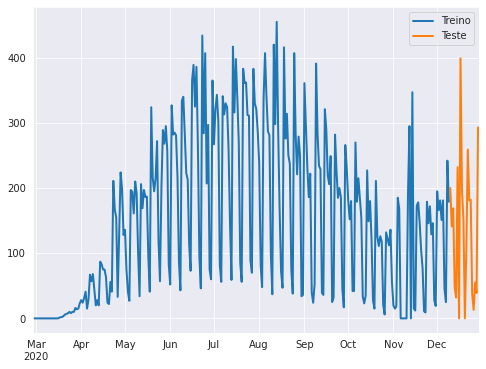

In [318]:
dados_treino['deaths'].plot(legend=True,label='Treino')
dados_teste['deaths'].plot(legend=True,label='Teste',figsize=(8,6));


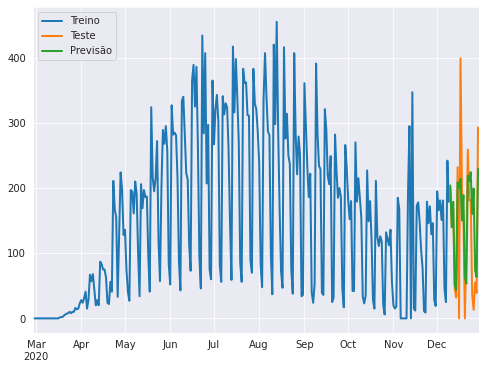

In [319]:
dados_treino['deaths'].plot(legend=True,label='Treino')
dados_teste['deaths'].plot(legend=True,label='Teste',figsize=(8,6))
predito.plot(legend=True,label='Previsão');

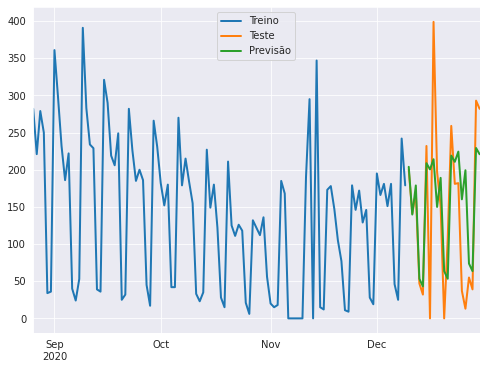

In [320]:
dados_treino['deaths'].iloc[180:].plot(legend=True,label='Treino')
dados_teste['deaths'].plot(legend=True,label='Teste',figsize=(8,6))
predito.plot(legend=True,label='Previsão');

In [321]:
## Ajuste do modelo com sazonalidade multiplicativa
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Precisamos considerar somente os dados positivos, mas vamos considerar os dados entre o início de maio e o início de setembro

In [322]:
covidSP = covidSP.loc['2020-05-01':'2020-09-01']

In [323]:
len(covidSP)

124

In [324]:
dados_treino = covidSP.iloc[:103] # Dados de treinamento até observação 240, sem incluí-la
dados_teste = covidSP.iloc[103:] # Dados de teste a partir da observação 240

In [325]:
ajustado = ExponentialSmoothing(dados_treino['deaths'],trend='add',seasonal='mul',seasonal_periods=7).fit()

In [326]:
predito = ajustado.forecast(21).rename('Previsão Holt-Winters')
predito.index = covidSP.index[103:]


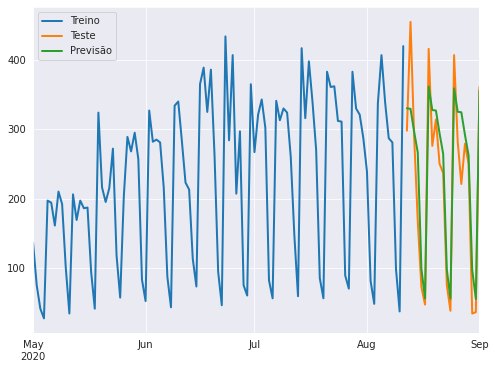

In [327]:
dados_treino['deaths'].plot(legend=True,label='Treino')
dados_teste['deaths'].plot(legend=True,label='Teste',figsize=(8,6))
predito.plot(legend=True,label='Previsão');

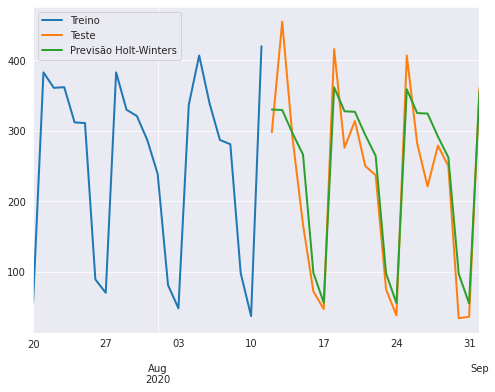

In [328]:
dados_treino['deaths'].iloc[80:].plot(legend=True,label='Treino')
dados_teste['deaths'].plot(legend=True,label='Teste',figsize=(8,6))
predito.plot(legend=True,label='Previsão Holt-Winters');

# Séries estacionárias

por **Cibele Russo**

Baseado em

- MORETTIN, P. A.; TOLOI, C. M. C.. Análise de séries temporais: modelos lineares univariados. 3. ed. São Paulo: Blucher, 2018.

- EHLERS, R.S. Análise de Séries Temporais. ICMC USP. 2009.


Leituras adicionais recomendadas

- Boxplots https://pt.wikipedia.org/wiki/Diagrama_de_caixa

- Boxplots usando o pacote seaborn https://seaborn.pydata.org/generated/seaborn.boxplot.html

- Teste para raiz unitária
https://en.wikipedia.org/wiki/Unit_root_test

- Teste de Dickey-Fuller aumentado https://en.wikipedia.org/wiki/Augmented_Dickey-Fuller_test.


## Estacionariedade

Como as séries temporais são realizações de processos estocásticos, estudaremos um pouco as características de processos estocásticos estacionários.


**Definição**

Um processo estocástico é dito ser **estritamente estacionário** se a distribuição de probabilidade conjunta de $Z (t_1 ), \ldots , Z (t_k )$ é a mesma de $Z (t_1+\tau), \ldots , Z (t_k +\tau)$.

Ou seja, o deslocamento da origem dos tempos por uma quantidade $\tau$ não tem efeito na distribuição conjunta que portanto depende apenas dos intervalos entre $t_1,\ldots,t_k$.




Para $k=1$, a estacionariedade estrita implica que a distribuição de $Z_t$ é a mesma para todo $t$ de modo que, se os primeiros momentos forem finitos,

$$\mu(t) = \mu \text{ e } \sigma^2(t) = \sigma^2\ \  \forall t$$


Para $k=2$, a distribuição conjunta de $Z(t_1)$ e $Z(t_2)$ depende apenas da distância $t_2-t_1$.

A **função de autocovariância** também depende apenas de $t_2-t_1$ e pode ser escrita como $\gamma(\tau)$:

$$\gamma(\tau) = E [(Z (t) − \mu)(Z (t + \tau ) − \mu)] = Cov(Z (t), Z (t + \tau )).$$

$\gamma(\tau)$ é chamado de coeficiente de autocovariância na defasagem $\tau$.

Note que o tamanho de $\gamma(\tau)$ depende da escala de $Z(t)$. Uma quantidade livre de escala é a **função de autocorrelação**

$$\rho(\tau) = \displaystyle\frac{\gamma(\tau)}{\gamma(0)}.$$


Na prática é muito difı́cil usar a definição de estacionariedade estrita e costuma-se definir estacionariedade de uma forma menos restrita.



**Definição**

Um processo estocástico $\{ Z (t), t \in \mathcal{T} \}$ é dito ser **estacionário de segunda ordem ou fracamente estacionário** se a sua função média é constante e sua função de autocovariância depende apenas da
defasagem,

$E(Z(t))  = \mu,\  \forall t$ e

$ Cov [Z (t), Z (t + \tau )] =  E [Z (t) − \mu][Z (t + \tau ) − \mu] = \gamma(\tau) \ \forall t $



- Nenhuma outra suposição é feita a respeito dos momentos de ordem mais alta.

- Fazendo $\tau = 0$ segue que $Var [Z (t)] = \gamma(0), \forall t$.

- Tanto a média quanto a variância precisam ser finitos.



**Definição**

Um processo estocástico é dito ser um processo **Gaussiano** se, para qualquer conjunto $\{ t_1 , t_ 2 , \ldots , t_n\}$ as variáveis aleatórias $Z (t_1 ), Z (t_2 ), \ldots , Z (t_n )$ tem distribuição normal multivariada.

- A distribuição normal multivariada fica completamente caracterizada pelo primeiro e segundo momentos, ou seja, média,variâncias e covariâncias.


- **Estacionariedade fraca implica em estacionariedade estrita para processos Gaussianos.**


- Por outro lado, $\mu$ e $\gamma(t)$ podem não descrever adequadamente processos que se afastem muito da normalidade.


Já vimos na primeira aula um **passeio aleatório**


$$Z_t = Z_{t-1}+\epsilon_t.$$


A série temporal se desenvolve no tempo de forma aleatória ao redor de uma média constante?

A maior parte das séries temporais não! Em geral, as séries de tempo apresentam *tendências*, positivas ou negativas, que podem ser lineares ou não lineares.



## Séries estacionárias

- Uma série temporal é estacionária se a sua média, variância e autocovariância são fixas para quaisquer dois pontos equidistantes. Isso significa que, independente de onde tomarmos um subconjunto da série, a **média, variância, autocorrelação devem se manter constantes**.


- Uma série que apresenta sazonalidade ou tendência não é estacionária.





## Transformações para buscar estacionariedade

#### Diferenças da série original

Como a maioria dos procedimentos da análise estatística das séries temporais supõe estacionariedade, pode ser necessário transformar os dados originais para obter uma série estacionária.

A transformação (filtro) mais comum consiste em tomar _diferenças sucessivas_ da série original, até obter uma série estacionária.

* Primeira diferença

$$\Delta Z(t) = Z(t) - Z(t-1)$$

* Segunda diferença

$$\Delta^2 Z(t) = \Delta(\Delta(Z(t))) = \Delta(Z(t) - Z(t-1)) $$

$$\Delta^2 Z(t)  = Z(t) - 2 Z(t-1) + Z(t-2)$$



### Exemplos:

1. Considere os dados dos passageiros. A série é estacionária? A primeira diferença é estacionária?

2. Considere a série de mortes da COVID-19 em SP. Ela é estacionária? A primeira diferença é estacionária?

Veremos outros exemplos!

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

passageiros = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/airline_passengers.csv', index_col=0, parse_dates=True)

# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")


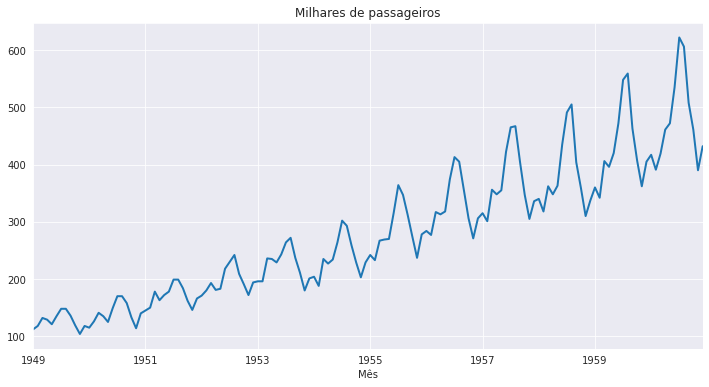

In [330]:
passageiros['Milhares de passageiros'].plot(figsize=(12,6), title='Milhares de passageiros');

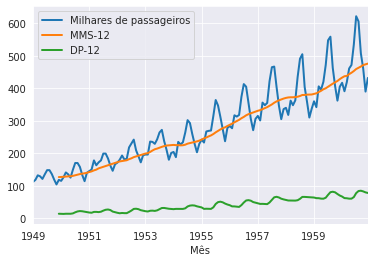

In [331]:
# Verificando as séries de média e desvio-padrão móvel com janela de 12 meses

passageiros['MMS-12'] = passageiros['Milhares de passageiros'].rolling(window=12).mean()
passageiros['DP-12'] = passageiros['Milhares de passageiros'].rolling(window=12).std()

passageiros[['Milhares de passageiros','MMS-12','DP-12']].plot();

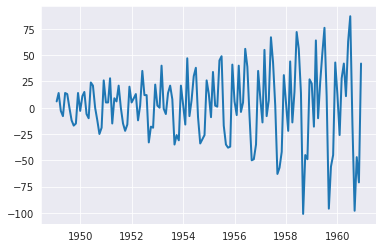

In [332]:
# Primeiras diferenças
y = np.diff(passageiros['Milhares de passageiros'])
x = passageiros.iloc[1:].index

plt.plot(x,y);

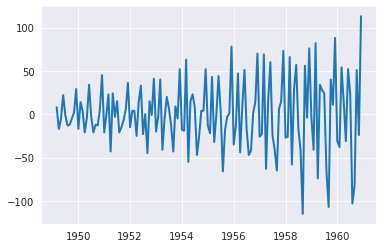

In [333]:
# Segundas diferenças
y2 = np.diff(y)
x2 = x[1:]

plt.plot(x2,y2);

## Boxplots por períodos

Veja mais em

https://pt.wikipedia.org/wiki/Diagrama_de_caixa

https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: xlabel='Ano', ylabel='Milhares de passageiros'>

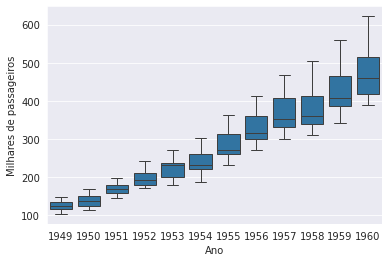

In [334]:
import seaborn as sns

passageiros['Ano'] = passageiros.index.year


sns.boxplot(x=passageiros['Ano'], y=passageiros['Milhares de passageiros'])

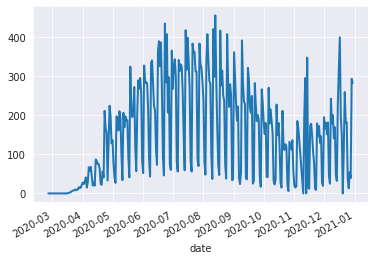

In [335]:
# Mortes por COVID-19 no estado de SP

covidSP = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/covidSP.csv', index_col=0, parse_dates=True)

covidSP['deaths'].plot();


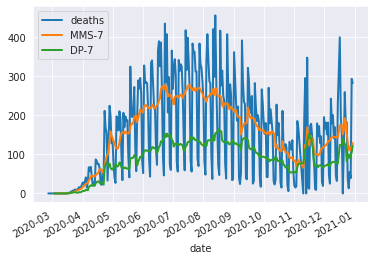

In [336]:
# Verificando as séries de média e desvio-padrão móvel com janela de 7 dias

covidSP['MMS-7'] = covidSP['deaths'].rolling(window=7).mean()
covidSP['DP-7'] = covidSP['deaths'].rolling(window=7).std()

covidSP[['deaths','MMS-7','DP-7']].plot();

<Axes: xlabel='Week', ylabel='deaths'>

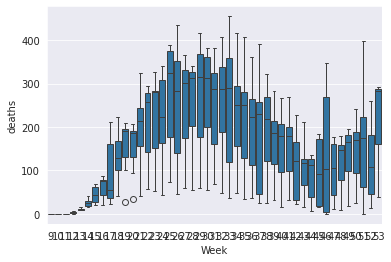

In [337]:
import seaborn as sns

covidSP['Week'] = covidSP.index.isocalendar().week

sns.boxplot(x=covidSP['Week'], y=covidSP['deaths'])

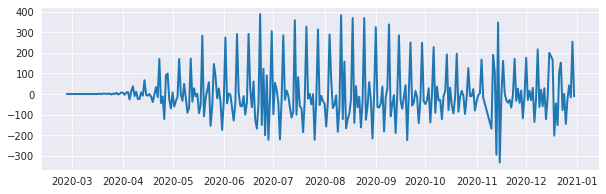

In [338]:
# Primeiras diferenças
y = np.diff(covidSP['deaths'])
x = covidSP.index[1:]


plt.rcParams['figure.figsize'] = [10,3]
plt.plot(x,y)


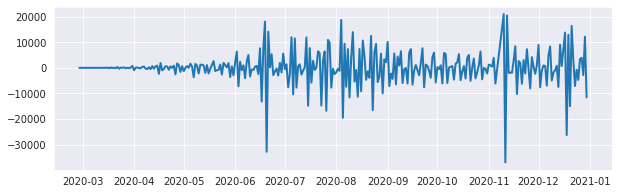

In [339]:
# Segundas diferenças

y = np.diff(np.diff(covidSP['confirmed']))
x = covidSP.iloc[2:].index


plt.rcParams['figure.figsize'] = [10,3]
plt.plot(x,y);





<Axes: xlabel='Date'>

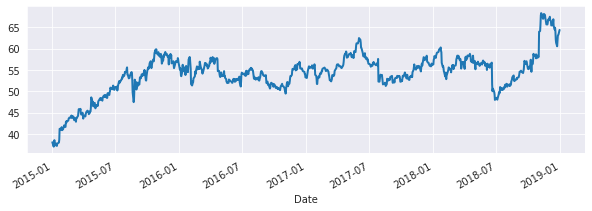

In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

starbucks = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/starbucks.csv', index_col=0, parse_dates=True)

starbucks['Close'].plot()

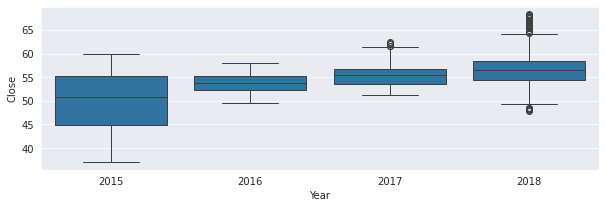

In [341]:
import seaborn as sns

starbucks['Year']= starbucks.index.year

x = sns.boxplot(x=starbucks['Year'], y=starbucks['Close'])

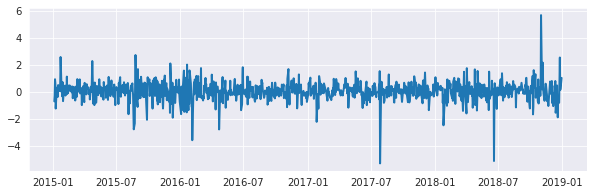

In [342]:
# Primeiras diferenças
y = np.diff(starbucks['Close'])
x = starbucks.iloc[1:].index

plt.plot(x,y);

**O Teste de Dickey-Fuller é usado para testar estacionariedade em um contexto de modelos autorregressivos.**

## Um teste para "alguma evidência sobre estacionariedade"


Considere inicialmente um modelo AR(1), que veremos com mais detalhes nas próximas aulas.

$$Z_t = \phi Z_{t-1} + a_t$$

em que $a_t \sim RBN(0,\sigma^2)$.

Segue-se que

$$\Delta Z_t = \phi^{\star} Z_{t-1} + a_t$$

no qual $ \phi^{\star}  = \phi-1$.

Queremos avaliar as hipóteses

$H_0: \phi^{\star} = 0$ contra

$H_1: \phi^{\star} < 0 $.

Para isso, diversos desenvolvimentos são necessários para se obter a estatística de teste, mas não daremos detalhes aqui!




Existem outros tipos de testes de hipóteses como esse, e muitos deles testam se:


$H_0: \text{ a série é não estacionária e contém uma raiz unitária}$

$H_1: \text{ a série é estacionária ou tendência-estacionária }$


Para mais informações, veja  (https://en.wikipedia.org/wiki/Unit_root_test)

O teste Dickey-Fuller aumentado também tem essa proposta  (https://en.wikipedia.org/wiki/Augmented_Dickey-Fuller_test).

Para o Teste de Dickey-Fuller:

- Quando o valor-p é pequeno ($p < 0.05$, por exemplo), rejeitamos $H_0$ e portanto há evidências de que a série é estacionária ou tendência-estacionária.

- Se o valor-p for grande ($p \geq 0.05$, por exemplo), não rejeitamos $H_0$ e a série não é estacionária e contém uma raiz unitária.


**Neste momento, vamos apenas aplicar o teste de Dickey-Fuller e verificar se há ou não evidências contra a estacionariedade da série**.


In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller

passageiros = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/airline_passengers.csv', index_col=0, parse_dates=True)


In [344]:
# fonte: https://machinelearningmastery.com/time-series-data-stationary-python/

result = adfuller(passageiros['Milhares de passageiros'], autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))


ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


Há evidências de que a série não seja estacionária!

In [345]:
result = adfuller(np.diff(passageiros['Milhares de passageiros']), autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.829267
p-value: 0.054213
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


Há evidências fracas de que a série das primeiras diferenças não seja estacionária!

In [346]:
result = adfuller(np.diff(np.diff(passageiros['Milhares de passageiros'])), autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -16.384232
p-value: 0.000000
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


Há evidências de que a série das segundas diferenças seja estacionária ou tendência-estacionária!

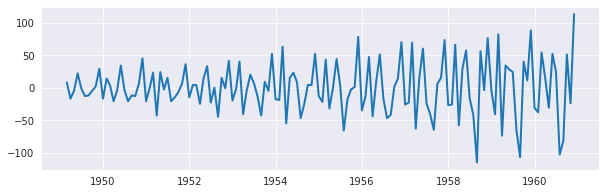

In [347]:
y = np.diff(np.diff(passageiros['Milhares de passageiros']))
x = passageiros.index[1:][1:]


plt.rcParams['figure.figsize'] = [10,3]
plt.plot(x,y)

In [348]:
result = adfuller(covidSP['deaths'], autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.017376
p-value: 0.279007
Critical Values:
	1%: -3.453
	5%: -2.872
	10%: -2.572


Há evidências de que a série não seja estacionária!

In [349]:
result = adfuller(np.diff(covidSP['deaths']), autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.026969
p-value: 0.000000
Critical Values:
	1%: -3.453
	5%: -2.872
	10%: -2.572


Há evidências de que a série das primeiras diferenças seja estacionária ou tendência-estacionária!

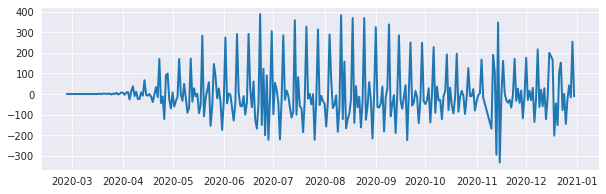

In [350]:
y = np.diff(covidSP['deaths'])
x = covidSP.index[1:]


plt.rcParams['figure.figsize'] = [10,3]
plt.plot(x,y)

<Axes: xlabel='date'>

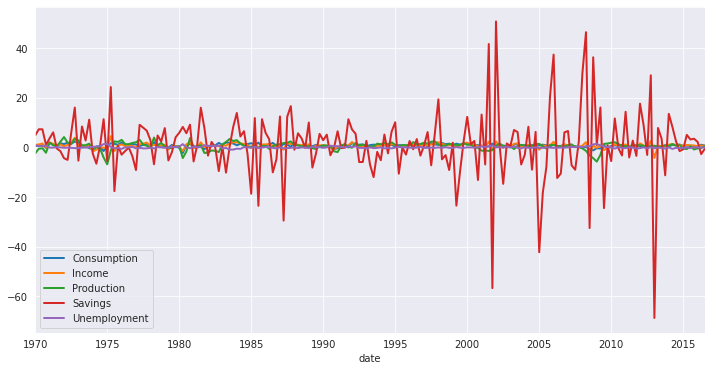

In [351]:
# dados US change

uschange = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/uschange.csv',index_col=0,parse_dates=True)
uschange.index = uschange.index.to_period("Q")
uschange.plot(figsize=(12,6))

In [352]:

result = adfuller(uschange['Savings'], autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -18.705760
p-value: 0.000000
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


Há fortes evidências para concluir que a série seja estacionária ou tendência-estacionária!

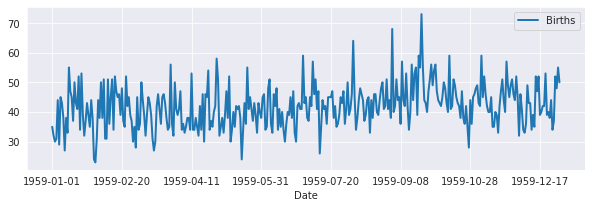

In [353]:
# Dados daily-total-female-births, cujo objetivo seria prever nascimentos diários de meninas


from pandas import read_csv
from matplotlib import pyplot


plt.rcParams['figure.figsize'] = [10,3]
births = read_csv('https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/daily-total-female-births.csv', header=0, index_col=0)

births.plot();

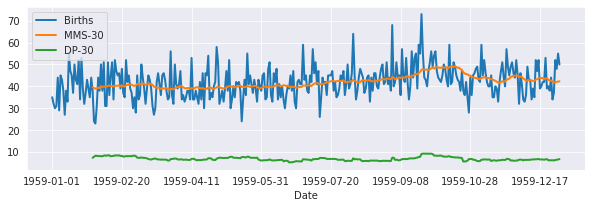

In [354]:
births['MMS-30'] = births['Births'].rolling(window=30).mean()
births['DP-30'] = births['Births'].rolling(window=30).std()


plt.rcParams['figure.figsize'] = [10,3]
births[['Births','MMS-30','DP-30']].plot();

In [355]:

result = adfuller(births['Births'], autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


Há evidências de que a série seja estacionária ou tendência-estacionária!

**Exercício: Faça o teste para avaliar a estacionariedade dos dados do Starbucks. Existem evidências de que a série das primeiras diferenças é estacionária?**

In [356]:
plt.rcParams['figure.figsize'] = [10,3]

url = 'https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/starbucks.csv'

starbucks = pd.read_csv(url, index_col=0, parse_dates=True)
starbucks

Close    Volume
Date                         
2015-01-02  38.0061   6906098
2015-01-05  37.2781  11623796
2015-01-06  36.9748   7664340
2015-01-07  37.8848   9732554
2015-01-08  38.4961  13170548
...             ...       ...
2018-12-24  60.5600   6323252
2018-12-26  63.0800  16646238
2018-12-27  63.2000  11308081
2018-12-28  63.3900   7712127
2018-12-31  64.4000   7690183

[1006 rows x 2 columns]

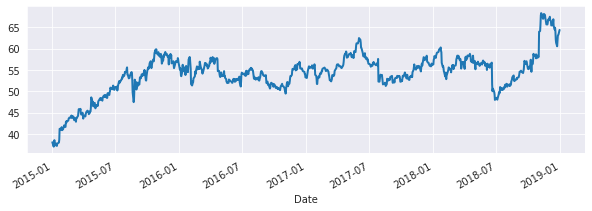

In [357]:

starbucks['Close'].plot();

In [358]:
result = adfuller(starbucks['Close'], autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.048094
p-value: 0.030641
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


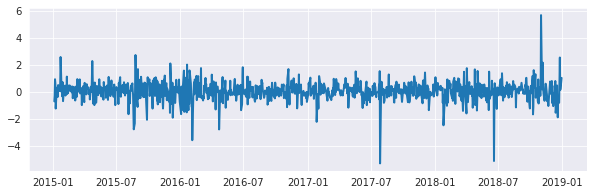

In [359]:
# Primeiras diferenças
y = np.diff(starbucks['Close'])
x = starbucks.iloc[1:].index

plt.plot(x,y);

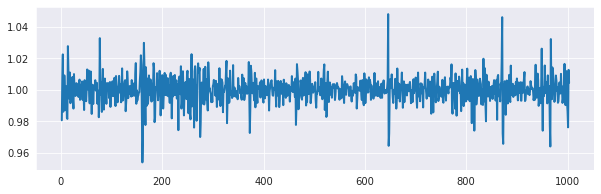

In [360]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

starbucks = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/starbucks.csv', index_col=0, parse_dates=True)

y = np.array(starbucks['Close'])

decomp = seasonal_decompose(y, model='multiplicative', period=5)
plt.plot(decomp.resid);



In [361]:
x = decomp.resid
x = x[~np.isnan(x)]
x
result = adfuller(x, autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.920651
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


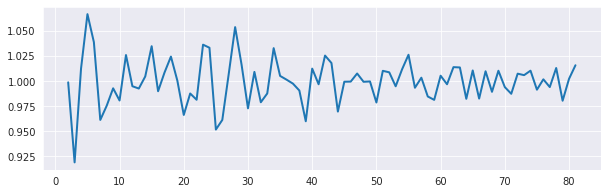

In [362]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

url = 'https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/PETR4.csv'
PETR4 = pd.read_csv(url, header=0, index_col=0)

y = np.array(PETR4['Close'])

decomp = seasonal_decompose(y, model='multiplicative', period=5)
plt.plot(decomp.resid);

In [363]:
x = decomp.resid
x = x[~np.isnan(x)]
x
result = adfuller(x, autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.914345
p-value: 0.000000
Critical Values:
	1%: -3.519
	5%: -2.900
	10%: -2.587


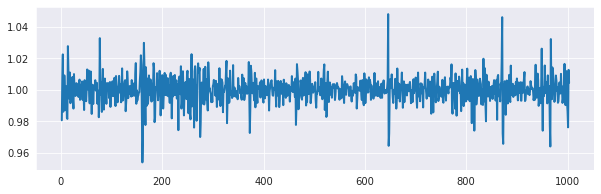

In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

url='https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/starbucks.csv'
starbucks = pd.read_csv(url, index_col=0, parse_dates=True)

y = np.array(starbucks['Close'])

decomp = seasonal_decompose(y, model='multiplicative', period=5)
plt.plot(decomp.resid);

# Funções de Autocovariância e Autocorrelação

por **Cibele Russo**

Baseado em

- MORETTIN, P. A.; TOLOI, C. M. C.. Análise de séries temporais: modelos lineares univariados. 3. ed. São Paulo: Blucher, 2018.

- EHLERS, R.S. Análise de Séries Temporais. ICMC USP. 2009.


Implementações:

- BROWNLEE, J. Introduction to time series forecasting with python: how to prepare data and develop models to predict the future. Machine Learning Mastery, 2017.

Leituras sugeridas:

- https://en.wikipedia.org/wiki/Autocorrelation

- https://otexts.com/fpp2/autocorrelation.html

- https://www.statsmodels.org/devel/generated/statsmodels.graphics.tsaplots.plot_pacf.html

- https://en.wikipedia.org/wiki/Partial_autocorrelation_function


Logo falaremos de modelos autorregressivos e de médias móveis, mas antes disso precisamos estudar covariância, correlação e como elas são usadas para descrever a associação entre observações de uma série temporal observada.

Nesta aula, falaremos de

- Função de autocovariância

- Função de autocorrelação

- Gráficos de autocorrelação e autocorrelação parcial



<span style="color:red">**Antes de falar de autocovariância e autocorrelação, o que é covariância e correlação?**</span>



Basicamente, a **covariância é uma medida de variabilidade conjunta entre duas variáveis aleatórias**.

Ela mede a força da associação linear entre essas duas variáveis.

E a **correlação é essa medida de associação linear padronizada**, de forma que assuma valores entre -1 e 1.

O sinal da covariância e da correlação indica se as variáveis se associam de forma positiva ou negativa.




## Covariância e correlação

A covariância entre duas variáveis aleatórias  $X$ e $Y$ é dada por

$\sigma^2_{XY}=Cov(X,Y) = E[(X-E(X))(Y-E(Y))]$.

Sejam $\sigma^2_X$ e  $\sigma^2_Y$ as variâncias de $X$ e $Y$, respectivamente.

A correlação entre  $X$ e $Y$ é dada por

$\rho = Cor(X,Y) = \displaystyle\frac{ E[(X-E(X))(Y-E(Y))]}{\sqrt{Var(X)}\sqrt{(Var(Y))}} = \displaystyle\frac{\sigma^2_{XY}}{\sqrt{\sigma^2_X} \sqrt{\sigma^2_Y}}$.

Obs: $-1\leq\rho\leq 1$ e quanto maior a correlação em módulo, mais forte é a associação, positiva ou negativa, entre as duas variáveis.



### Coeficiente de correlação de Pearson

O coeficiente de correlação de Pearson entre as variáveis aleatórias $X$ e $Y$, dada que amostras de $X$ e $Y$ foram observadas, é dado por

${\displaystyle r_{xy}={\frac {\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{{\sqrt {\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}}{\sqrt {\sum _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}}}}$


Em Python, podemos usar a função numpy.corrcoef(x,y)



<span style="color:red">**Correlação não significa causalidade!**</span>

<span style="color:red">**E então que é autocovariância e autocorrelação?**</span>

## Autocovariância

Seja $\{Z_t, t\in \mathbb{Z}\}$ um processo estacionário real com tempo discreto, de média zero.

A função de autocovariância facv para um deslocamento no tempo $\tau$ é dada por $\gamma_\tau = E(Z_t Z_{t+\tau})$.

Mais geralmente, a **função de autocovariância** é dada por:

$\gamma(\tau) = E[(Z(t)-\mu)(Z (t+\tau )-\mu)] = Cov(Z (t), Z (t + \tau )).$

$\gamma(\tau)$ é chamado de coeficiente de autocovariância na defasagem $\tau$.


## Autocorrelação

Uma quantidade livre de escala é a **função de autocorrelação**

$\rho(\tau) = \displaystyle\frac{\gamma(\tau)}{\gamma(0)}, \text{ para } \tau \in \mathbb{Z}.$







A autocorrelação, também conhecida como correlação serial, é a correlação de um sinal com uma cópia atrasada de si mesma em função do atraso (lag). Informalmente, é a semelhança entre as observações em função do intervalo de tempo entre elas.

(Fonte: Traduzido de https://en.wikipedia.org/wiki/Autocorrelation)


Para entender a autocorrelação, é comum construirmos gráficos e autocorrelação e autocorrelação parcial.

## Autocorrelação em séries temporais

Seja $y_k$ a $k$-ésima observação da série temporal, e $\bar{y}$ e média amostral da série.

A autocorrelação entre observações com atraso $k$ é dada por

${\displaystyle \rho_k = \frac {\sum\limits_{t=1}^{n-k} (y_t - \bar{y})(y_{t+k}-\bar{y})} {\sum\limits_{t=1}^{n} (y_t - \bar{y})^2}}$




## Correlograma

O correlograma é uma representação das autocorrelações entre as observações da série temporal.

Ou seja, cada ponto do gráfico representa a correlação entre a série original e a série com o atraso correspondente.

## Autocorrelação parcial

A autocorrelação parcial é uma medida de associação linear de duas variáveis após remover o efeito de outras variáveis que afetam ambas. Ou seja, a autocorrelação parcial com atraso $k$ é a autocorrelação entre $y_t$ e $y_ {t + k}$ em que não são contabilizados os atrasos entre $1$ e $k - 1$.

Na prática, modelos lineares são ajustados para a série "corrente" com a série em atraso como preditor, e os resíduos desse modelo são utilizados para o próximo passo, calcula-se a correlação entre os resíduos e a próxima série em atraso e assim por diante.





## Aplicações

In [365]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import statsmodels.api as sm

# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.dpi'] = 100

# Dados Passageiros aéreos
df1 = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/airline_passengers.csv',index_col=0,parse_dates=True)
df1.index.freq = 'MS'

# Dados de nascimentos diários de mulheres
df2 = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'


In [366]:
# Funções para cálculo da autocorrelação e autocorrelação parcial

from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

## Funções para cálculo de autocorrelação e autocorrelação parcial

https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.pacf.html

In [367]:
acf(df1['Milhares de passageiros'])

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376])

In [368]:
pacf(df1['Milhares de passageiros'])

array([ 1.        ,  0.95467704, -0.26527732,  0.05546955,  0.10885622,
        0.08112579,  0.00412541,  0.15616955,  0.10370833,  0.28878144,
        0.20691805,  0.2411297 , -0.15800498, -0.7183246 , -0.08948064,
        0.22160591,  0.13462253,  0.11561572,  0.1948294 ,  0.09665618,
       -0.20215868, -0.0936381 ])

In [369]:
pacf(df1['Milhares de passageiros'], method='ols')

array([ 1.        ,  0.95893198, -0.32983096,  0.2018249 ,  0.14500798,
        0.25848232, -0.02690283,  0.20433019,  0.15607896,  0.56860841,
        0.29256358,  0.8402143 ,  0.61268285, -0.66597616, -0.38463943,
        0.0787466 , -0.02663483, -0.05805221, -0.04350748,  0.27732556,
       -0.04046447,  0.13739883])

In [370]:
pacf_ols(df1['Milhares de passageiros'])

array([ 1.        ,  0.95893198, -0.32983096,  0.2018249 ,  0.14500798,
        0.25848232, -0.02690283,  0.20433019,  0.15607896,  0.56860841,
        0.29256358,  0.8402143 ,  0.61268285, -0.66597616, -0.38463943,
        0.0787466 , -0.02663483, -0.05805221, -0.04350748,  0.27732556,
       -0.04046447,  0.13739883])

In [371]:
acf(df2['Births'])

array([ 1.        ,  0.21724118,  0.15287758,  0.10821254,  0.09066059,
        0.09595481,  0.09104012,  0.19508071,  0.14115295,  0.06117859,
        0.04781522,  0.04770662, -0.01964707,  0.02287422,  0.08112657,
        0.11185686,  0.07333732,  0.01501845,  0.07270333,  0.06859   ,
        0.09280107,  0.26386846,  0.14012147,  0.06070286,  0.08716232,
        0.05038825])

In [372]:
pacf(df2['Births'], method='ols')

array([ 1.        ,  0.2179641 ,  0.11388341,  0.06139271,  0.05014092,
        0.05597304,  0.0483302 ,  0.16061715,  0.061602  , -0.0245556 ,
       -0.00774957,  0.00782231, -0.07054357,  0.00367697,  0.05073901,
        0.06869818,  0.02855912, -0.03000743,  0.04890835,  0.05079005,
        0.06672663,  0.23464568,  0.01251561, -0.05701977,  0.03051524,
       -0.03035958])

# Representação gráfica da autocorrelação


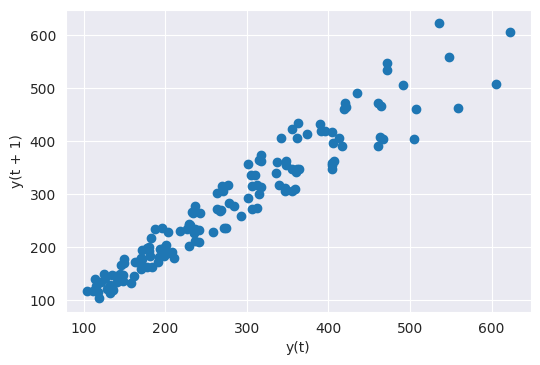

In [373]:
from pandas.plotting import lag_plot

lag_plot(df1['Milhares de passageiros']);

O gráfico acima indica forte correlação entre a série original e a série com atraso 1.

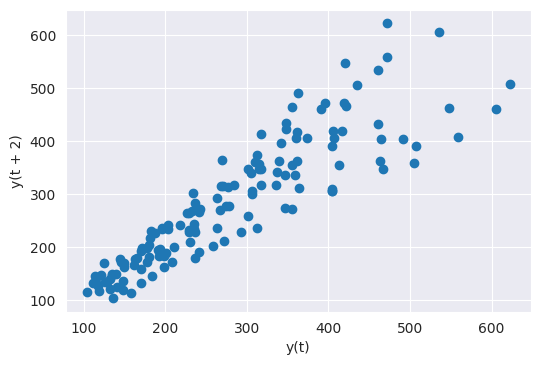

In [374]:
from pandas.plotting import lag_plot

lag_plot(df1['Milhares de passageiros'],lag=2);

**Dados dos nascimentos**

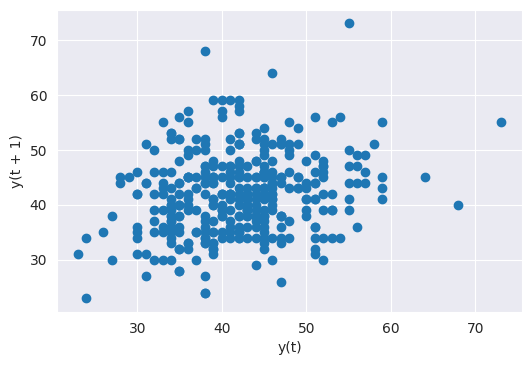

In [375]:
lag_plot(df2['Births']);

<Axes: xlabel='y(t)', ylabel='y(t + 2)'>

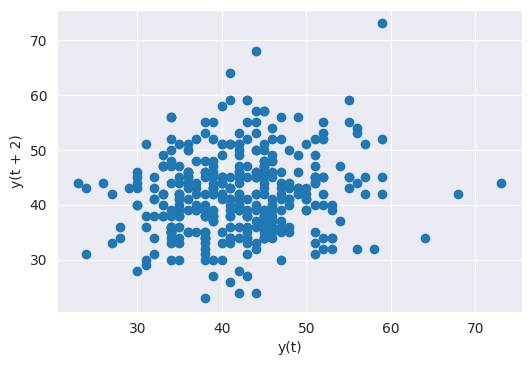

In [376]:
lag_plot(df2['Births'], lag=2)

## Representação gráfica da autocorrelação



In [377]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

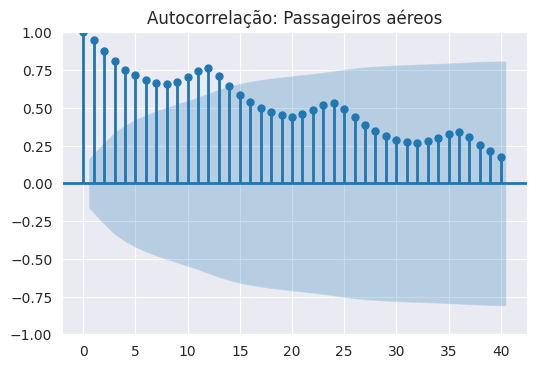

In [378]:
title = 'Autocorrelação: Passageiros aéreos'
lags = 40
plot_acf(df1['Milhares de passageiros'],title=title,lags=lags);


Observe o efeito da sazonalidade e portanto da não-estacionariedade no gráfico da autocorrelação.

A região em azul representa um intervalo de confiança para a correlação, e quando um ponto ultrapassa essa região temos um indicativo de significância da correlação observada.


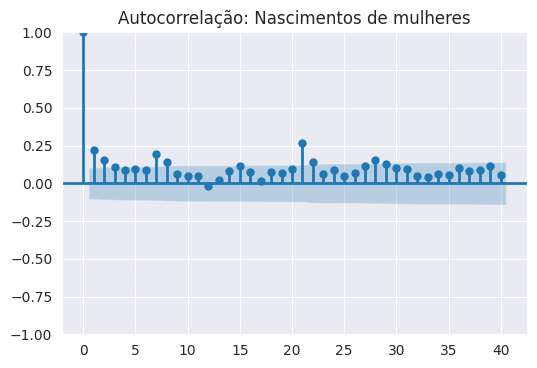

In [379]:
title='Autocorrelação: Nascimentos de mulheres'
lags=40
plot_acf(df2['Births'],title=title,lags=lags);

## Representação gráfica da autocorrelação parcial

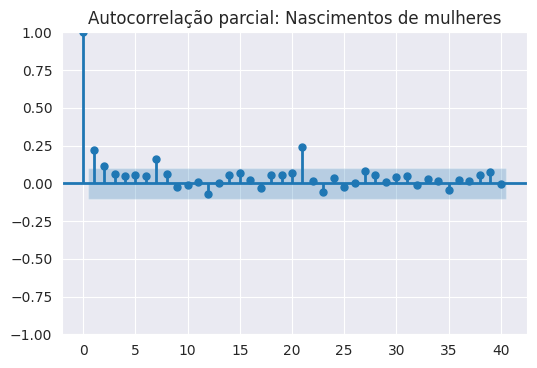

In [380]:
title='Autocorrelação parcial: Nascimentos de mulheres'
lags=40
plot_pacf(df2['Births'],title=title,lags=lags);

**Exercícios:**
    
Obtenha gráficos de autocorrelação e autocorrelação parcial para os dados de COVID-19 do estado de São Paulo. Lembre-se de utilizar os dados completos como fizemos na Aula 2.

Obtenha gráficos de autocorrelação e autocorrelação parcial para os dados PETR4.
    

# Modelos AR, MA, ARMA, ARIMA


por **Cibele Russo**

Baseado em

- MORETTIN, P. A.; TOLOI, C. M. C.. Análise de séries temporais: modelos lineares univariados. 3. ed. São Paulo: Blucher, 2018.

- EHLERS, R.S. Análise de Séries Temporais. ICMC USP. 2009.

Implementações:

- BROWNLEE, J. Introduction to time series forecasting with python: how to prepare data and develop models to predict the future. Machine Learning Mastery, 2017.

Leituras adicionais:

- BOX, G. E., & JENKINS, G. M. Time series analysis: Forecasting and control. San Francisco. Calif: Holden-Day. 1976.

- BOX, G. E., & JENKINS, G. M., & REINSEL, G. C. Time series analysis, forecasting and control. Englewood Clifs. 1994.

- HYNDMAN, R. J., ATHANASOPOULOS, G.; Forecasting: principle and practice: O Texts; 2nd edition. 2018. Acesso em 09/07/2022.

- https://otexts.com/fpp2/AR.html
- https://otexts.com/fpp2/MA.html
- https://otexts.com/fpp2/non-seasonal-arima.html

- https://www.statsmodels.org/stable/examples/notebooks/generated/tsa_arma_0.html
- https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html
- https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMAResults.html



# Modelos ARIMA (p,d,q)

**Componentes de um modelo ARIMA:**

- **AR (p)**: Componentes autorregressivas, utilizam a relação de dependência entre a observação corrente e as observações em um período prévio.


- **Integrado (d)**: Diferenças para tornar a série estacionária.


- **MA (q)**: Componentes de médias móveis, utilizam a dependência entre uma obervação e um erro residual de um modelo de média móvel aplicado a observações em atraso.



**SARIMA: ARIMA com componentes sazonais.**



Abordagem de Box e Jenkins (1976): Ajustar modelos autorregressivos integrados de médias móveis, ARIMA(p,d,q) a um conjunto de dados. Veja também Box et al. (1994).

Uma estratégia para a construção do modelo será baseada em um ciclo iterativo, na qual a escolha da estrutura do modelo é baseada nos próprios dados:


1. Uma classe geral de modelos é considerada para a análise, no caso modelos ARIMA (***especificação***),


2. Há ***identificação*** do modelo, com base na análise de autocorrelações, autocorrelações parciais e outros critérios,


3. ***Estimação*** dos parâmetros do modelo identificado,


4. ***Verificação*** ou ***diagnóstico*** do modelo ajustado, por meio de uma análise de resíduos, para saber se esse modelo é adequado para fazer previsão, por exemplo.


Se o modelo não for adequado, as estapas 2, 3 e 4 se repetem até obter um ajuste satisfatório. A etapa mais trabalhosa é a identificação.

No contexto desse curso, utilizaremos a função auto_arima do pacote pmdarima do Python para selecionar a ordem do ARIMA.

## Operadores úteis

### Operador translação (defasagem, backshift)

$B Z_t = Z_{t-1},$

$B^2 Z_t = Z_{t-2},$

$\vdots$

$B^m Z_t = Z_{t-m}$.



### Operador translação para o futuro (forward)

$F Z_t = Z_{t+1},$

$F^2 Z_t = Z_{t+2},$

$\vdots$

$F^m Z_t = Z_{t+m}$.


### Operador diferença

$\Delta Z_t = Z_t - Z_{t-1} = (1-B) Z_t$

ou seja $\Delta = (1-B)$.

### Operador soma (expressão corrigida da aula)

$S Z_t = \displaystyle\sum_{j=0}^ {\infty} Z_{t-j} = Z_t+Z_{t-1}+Z_{t-2}+\ldots = (1+B+B^2+\ldots)Z_t$

do que segue que

$S Z_t = (1-B)^{-1}Z_t = \Delta^{-1}Z_t$

ou seja $S=\Delta^{-1}$.





## Modelos autorregressivos - AR(p)

Considere uma série **estacionária** $Z_t$ com média $\mu$, e considere que $\tilde{Z}_t = Z_t -\mu$.


O termo autoregressão descreve uma regressão da variável contra ela mesma. Uma regressão automática é executada em um conjunto de  valores defasados da ordem $p$.



$\tilde{Z}_{t} = \phi_{1}\tilde{Z}_{t-1} + \phi_{2}\tilde{Z}_{t-2} + \ldots + \phi_{p}\tilde{Z}_{t-p} + a_{t}$

onde $\tilde{Z}_t = Z_t -\mu$, $\phi_ {1}, \ldots, \phi_ {p}$ **são coeficientes de atraso** até $p$ e $a_{t}$ é um ruído branco.

Por exemplo, um modelo <strong> AR (1) </strong> seria dado por

$\tilde{Z}_ {t} = \phi_{1} \tilde{Z}_ {t-1} + a_ {t}$

considerando que um modelo <strong> AR (2) </strong> seria dado por

$\tilde{Z}_ {t} =  \phi_{1} \tilde{Z}_{t-1} + \phi_{2} \tilde{Z}_{t-2} + a_ {t}$

e assim por diante.


## Modelos de médias móveis - MA(q)

Considere uma série **estacionária** $Z_t$ com média $\mu$, e considere que $\tilde{Z}_t = Z_t -\mu$.

$\tilde{Z}_{t} =  a_t  -  \theta_{1}a_{t-1} -\ldots - \theta_q a_{t-q}$

sendo $\tilde{Z}_t = Z_t -\mu$, teremos

$\tilde{Z}_{t} = (1-\theta_1 B - \ldots -\theta_q B^q) a_t = \theta(B) a_t$

onde $\theta(B) = 1-\theta_1 B-\ldots-\theta_q B^q$ é o operador de médias móveis de ordem $q$.

O exemplo mais simples é o MA(1):

$\tilde{Z}_{t} = a_t -\theta_1 a_{t-1}$ ou

$\tilde{Z}_{t} = (1-\theta_1 B) a_t$

com $\theta(B) = (1-\theta_1 B)$.

Um resultado garante que como $\psi(B) = 1 - \theta_1 B$ é finito, o processo é sempre estacionário.




## Modelo autorregressivo e de médias móveis - ARMA(p,q)

Os modelos ARMA(p,q) são dados na forma


$\tilde{Z}_{t} = \phi_{1}\tilde{Z}_{t-1} + \ldots + \phi_{p}\tilde{Z}_{t-p} +  a_t  -  \theta_{1}a_{t-1} -\ldots - \theta_q a_{t-q}$

Exemplo: Um modelo ARMA(1,1) com $p=1$, $q=1$, $\phi(B) = 1-\phi B$, $\theta (B) = 1-\theta B$, é dado por

$\tilde{Z}_{t} = \phi_{1}\tilde{Z}_{t-1} + a_t  -  \theta_{1}a_{t-1}$

Os modelos ARMA podem ser usado para séries estacionárias se as raízes de $\phi(B)=0$ caírem todas fora do círculo unitário.

Para séries não-estacionárias com uma componente de tendência, os modelos ARIMA podem ser mais adequados.


### Função de autocorrelação (fac) e função de autocorrelação parcial (facp) para processos AR, MA, ARMA

Função de autocorrelação (fac):

1. Um processo AR(p) tem fac que decai de acordo com exponenciais ou senoides amortecidas, infinita em extensão;

2. Um processo MA(q) tem fac finita, no sentido de que ela apresenta um corte após o "lag" q;

3. Um processo ARMA (p,q) tem fac infinita em extensão, a qual decai de acordo com exponenciais e/ou senoides amortecidas após o "laq" q-p.

A função de autocorrelação parcial também pode auxiliar na identificação do modelo. Entre outras características,

1. Um processo MA(q) tem facp que se comporta de maneira similar à fac de um processo AR(p), com decaimento exponencial e/ou senoides amortecidas;

2. Um processo ARMA(p,q) tem facp que se comporta como a facp de um processo MA puro.

Para mais informações, veja
- MORETTIN, P. A.; TOLOI, C. M. C.. Análise de séries temporais: modelos lineares univariados. 3. ed. São Paulo: Blucher, 2018.

- BOX, G. E., & JENKINS, G. M., & REINSEL, G. C. Time series analysis, forecasting and control. Englewood Clifs. 1994.



### Correlogramas de dados simulados

In [381]:
# instale se necessário
#!pip show statsmodels

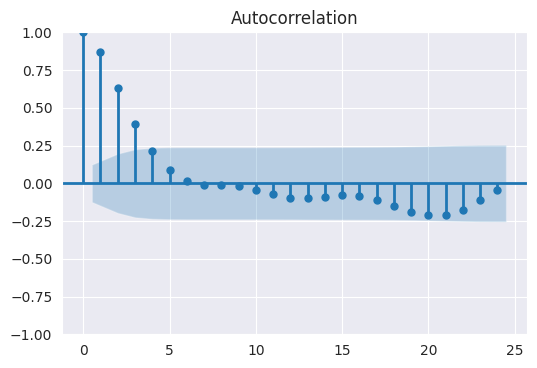

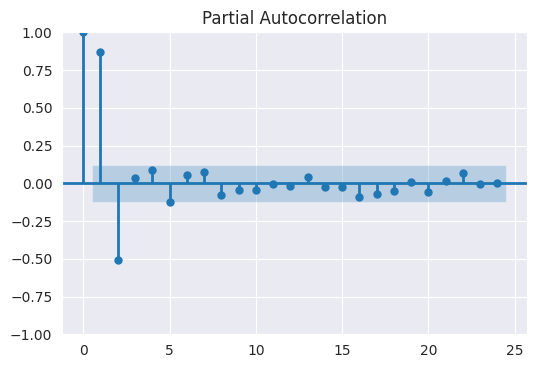

In [382]:
# ARMA(1,2)
# Fonte: https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_process.arma_generate_sample.html

import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.dpi'] = 100

np.random.seed(12345)
arparams = np.array([.6])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
y = arma_generate_sample(ar, ma, 250)
model = ARIMA(endog=y, order=(1,0,2)).fit() # Exercício: Olhar o ajuste

plot_acf(y)
plot_pacf(y, method='ywm') # Método atualizado na nova versão
plt.show()

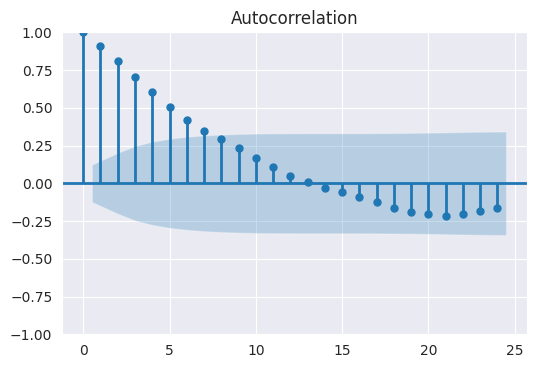

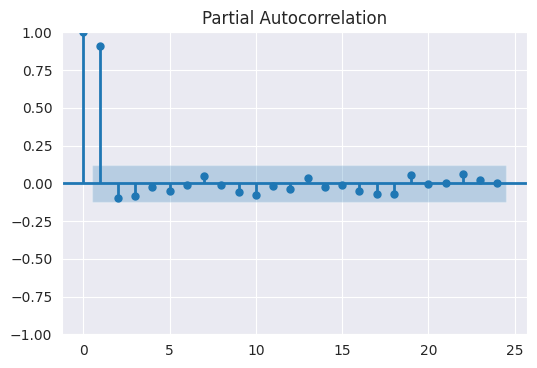

In [383]:
# ARMA(1,0) ou AR(1)

np.random.seed(12345)
arparams = np.array([.9])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams]
ma = np.r_[1]
y = arma_generate_sample(ar, ma, 250)
model = ARIMA(y, order=(1,0,0)).fit()
model.params

plot_acf(y)
plot_pacf(y, method='ywm') # Método atualizado na nova versão
plt.show()

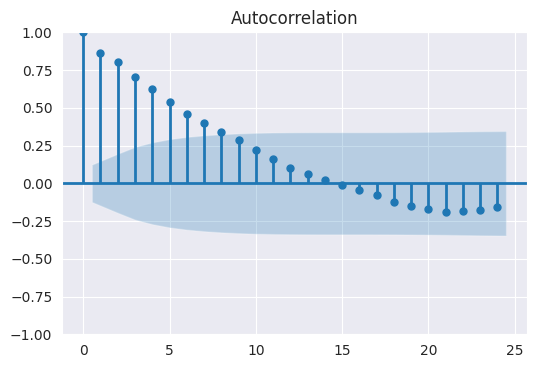

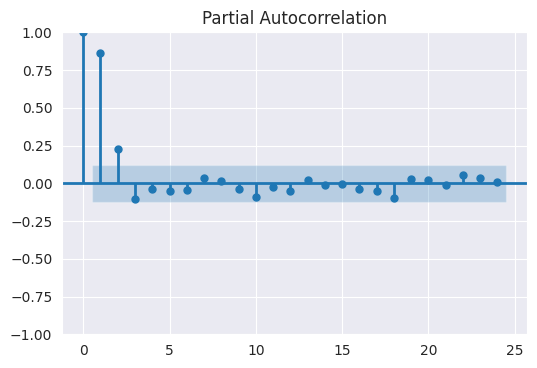

In [384]:
# ARMA(2,0) ou AR(2)
# Fonte: https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_process.arma_generate_sample.html

np.random.seed(12345)
arparams = np.array([.6, 0.3])
maparams = np.array([.8, .35])
ar = np.r_[1, -arparams]
ma = np.r_[1]
y = arma_generate_sample(ar, ma, 250)
model = ARIMA(endog=y, order=(2,0,0)).fit()
model.params

plot_acf(y)
plot_pacf(y, method='ywm') # Método atualizado na nova versão
plt.show()

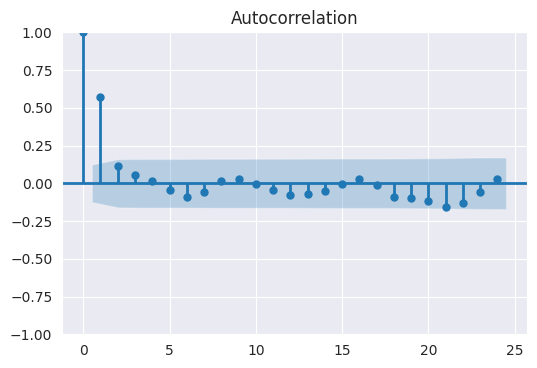

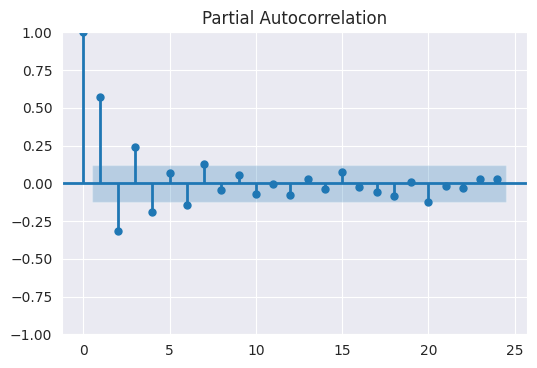

In [385]:
# ARMA(0,1) ou MA(1)

np.random.seed(12345)
arparams = np.array([.75])
maparams = np.array([.85])
ar = np.r_[1]
ma = np.r_[1, maparams]
y = arma_generate_sample(ar, ma, 250)
model = ARIMA(endog=y, order=(0,0, 1)).fit()

plot_acf(y)
plot_pacf(y, method='ywm') # Método atualizado na nova versão
plt.show()

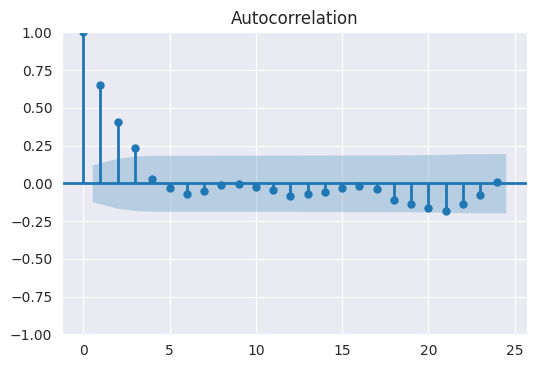

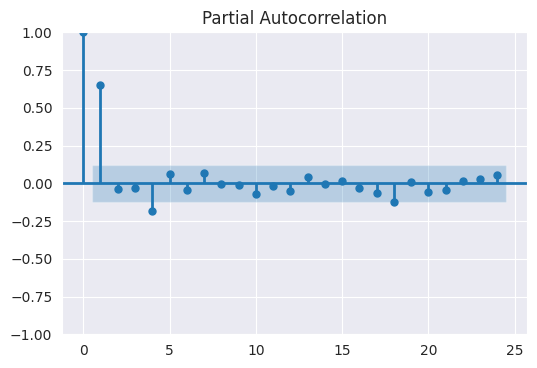

In [386]:
# ARMA(0,3) ou MA(3)
# Fonte: https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_process.arma_generate_sample.html

np.random.seed(12345)
arparams = np.array([.75])
maparams = np.array([.6, 0.3, 0.3])
ar = np.r_[1]
ma = np.r_[1, maparams]
y = arma_generate_sample(ar, ma, 250)
model = ARIMA(endog=y, order=(0,0,3)).fit()

plot_acf(y)
plot_pacf(y, method='ywm') # Método atualizado na nova versão
plt.show()

## Aplicações

In [387]:
!pip show statsmodels
!pip show pmdarima

Name: statsmodels
Version: 0.13.2
Summary: Statistical computations and models for Python
Home-page: https://www.statsmodels.org/
Author: 
Author-email: 
License: BSD License
Location: /home/cibele/.local/lib/python3.10/site-packages
Requires: patsy, pandas, scipy, numpy, packaging
Required-by: pynm, pycaret, pmdarima, plotly-express, category-encoders
Name: pmdarima
Version: 1.8.5
Summary: Python's forecast::auto.arima equivalent
Home-page: http://alkaline-ml.com/pmdarima
Author: 
Author-email: 
License: MIT
Location: /home/cibele/.local/lib/python3.10/site-packages
Requires: statsmodels, joblib, pandas, setuptools, urllib3, numpy, Cython, scipy, scikit-learn
Required-by: tbats, pycaret


In [388]:
import pandas as pd
import numpy as np
%matplotlib inline
from statsmodels.tsa.stattools import adfuller

# Funções específicas para a modelagem e previsão
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # para determinar (p,q)

import pmdarima as pm

# Carregue as bases de dados
# Trabalharemos com uma série estacionária, de nascimentos de mulheres, e uma série não estacionária, PETR4

# Dados de nascimentos diários de mulheres
url1='https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/DailyTotalFemaleBirths.csv'
df1 = pd.read_csv(url1,index_col='Date',parse_dates=True)
df1.index.freq = 'D'

# Dados de fechamento das ações da PETR4
url2 = 'https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/PETR4.csv'
df2 = pd.read_csv(url2,index_col='Date',parse_dates=True)
idx = pd.date_range(start=df2.index.min(), end=df2.index.max(), freq='B')
df2 = df2.reindex(idx)
df2.fillna(method='ffill', inplace=True)

## Média móvel autoregressiva - ARMA (p, q)

Olhemos a princípio uma série estacionária e determinaremos (p,q) em um modelo ARMA.


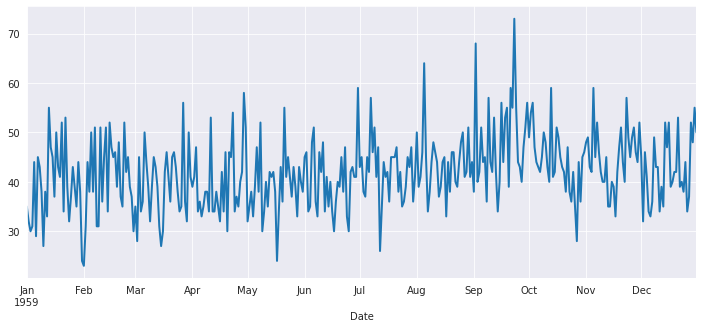

In [389]:
df1['Births'].plot(figsize=(12,5));

### Execute o teste Dickey-Fuller aumentado para confirmar a estacionariedade

In [390]:
# Teste de Dickey-Fuller aumentado
# fonte: https://machinelearningmastery.com/time-series-data-stationary-python/

result = adfuller(df1['Births'], autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))



ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


Há fortes evidências de que a série seja estacionária ou tendência-estacionária.

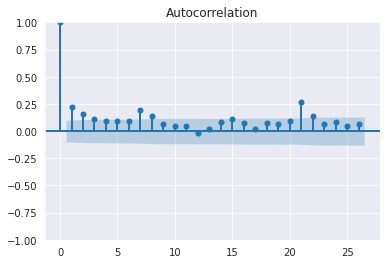

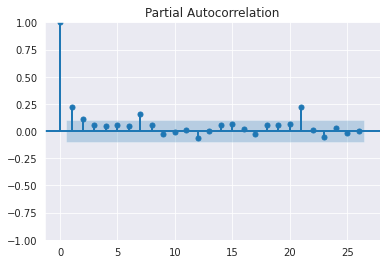

In [391]:
# Correlograma

plot_acf(df1['Births'])
plot_pacf(df1['Births'], method='ywm') # Método atualizado na nova versão
plt.show()

In [392]:
# Vamos considerar um modelo ARMA(p,q) e a função auto_arima

In [393]:
# Novo comando para auto_arima a partir de pm (pmdarima)
stepwise_fit = pm.auto_arima(df1['Births'], start_p=0, start_q=0,
                          max_p=6, max_q=3, m=0,
                          seasonal=False,
                          d=0,
                          error_action='ignore',   # se uma ordem não funcionar, ignorar
                          suppress_warnings=True,  # ignorar avisos
                          stepwise=True)           # executa stepwise

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -1231.679
Date:                Mon, 25 Nov 2024   AIC                           2471.358
Time:                        11:28:53   BIC                           2486.957
Sample:                             0   HQIC                          2477.557
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1251      0.060     18.763      0.000       1.008       1.243
ar.L2         -0.1251      0.060     -2.087      0.037      -0.243      -0.008
ma.L1         -0.9623      0.017    -55.585      0.000      -0.996      -0.928
sigma2        49.1469      3.301     14.889      0.000      42.677      55.617
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                24.86
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.80   Kurtosis:                         3.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Considere agora bases de treino e teste

In [394]:
len(df1)

365

In [395]:
treino = df1.iloc[:290]
teste = df1.iloc[290:]

In [396]:
# Ignorar warnings não prejudiciais
#
import warnings
warnings.filterwarnings("ignore")

modelo = ARIMA(endog=treino['Births'],order=(2,0,1))
resultados = modelo.fit()
resultados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Births   No. Observations:                  290
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -981.565
Date:                Mon, 25 Nov 2024   AIC                           1973.131
Time:                        11:28:53   BIC                           1991.480
Sample:                    01-01-1959   HQIC                          1980.482
                         - 10-17-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.3955      5.590      7.585      0.000      31.440      53.351
ar.L1          1.0670      0.076     13.994      0.000       0.918       1.216
ar.L2         -0.0723      0.069     -1.040      0.298      -0.208       0.064
ma.L1         -0.9521      0.044    -21.883      0.000      -1.037      -0.867
sigma2        50.8100      3.880     13.095      0.000      43.205      58.415
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                22.38
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                             0.59
Prob(H) (two-sided):                  0.59   Kurtosis:                         3.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [397]:
# O melhor modelo obtido com esta versão do pmdarima foi ARMA(2,1). Com outra versão pode-se selecionar outro modelo como o melhor.

In [398]:
# Olhando as previsões

inicio=len(treino)
fim=len(treino)+len(teste)-1
previsoes = resultados.predict(start=inicio, end=fim).rename('Previsões ARMA(2,1)')

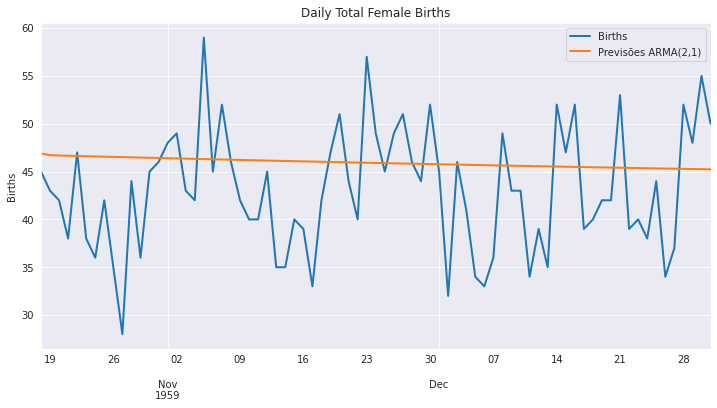

In [399]:
title = 'Daily Total Female Births'
ylabel='Births'
xlabel='' # we don't really need a label here

ax = teste['Births'].plot(legend=True,figsize=(12,6),title=title)
previsoes.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

Como nosso conjunto de dados inicial não exibiu tendência ou componente sazonal, essa previsão faz sentido. Na próxima seção, tomaremos medidas adicionais para avaliar o desempenho de nossas previsões e fazer previsões para o futuro.

## Modelo autorregressivo integrado de médias móveis - ARIMA (p,d,q)
As etapas são as mesmas que para o ARMA (p, q), exceto que aplicaremos um componente diferencial para tornar o conjunto de dados estacionário. <br>
Primeiro, vamos dar uma olhada no conjunto de dados PETR4.
### Plotar os dados de origem

[Text(0.5, 0, ''), Text(0, 0.5, 'Fechamentos')]

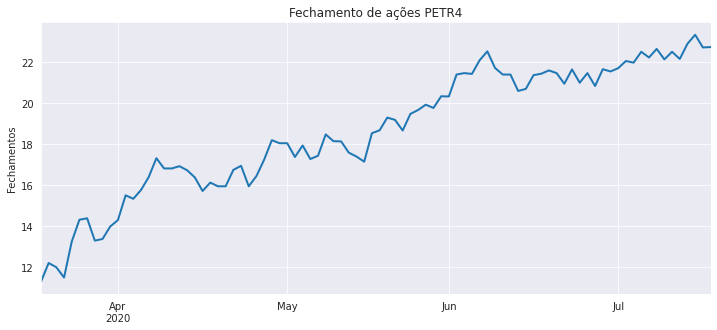

In [400]:
title = 'Fechamento de ações PETR4'
ylabel='Fechamentos'

ax = df2['Close'].plot(figsize=(12,5),title=title);
ax.set(xlabel=xlabel, ylabel=ylabel)


### Executar uma decomposição em tendência e sazonalidade

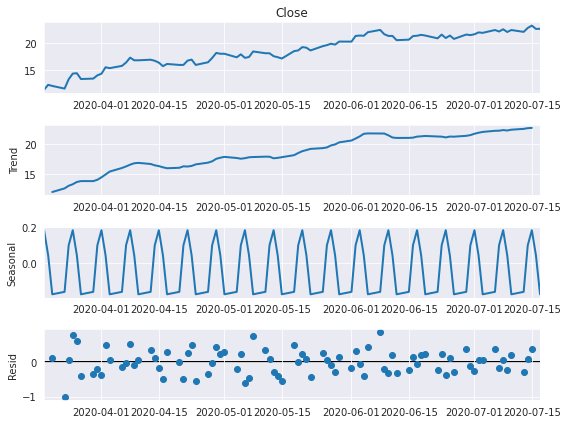

In [401]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams['figure.figsize'] = (8,6)

result = seasonal_decompose(df2['Close'], model='additive')  # model='add' also works
result.plot();

Possivelmente existe sazonalidade nesses dados. A princípio vamos considerar um modelo ARIMA não sazonal.

Vamos usar o pdmarima.auto_arima para determinar o modelo ARIMA.



### Execute o teste Dickey-Fuller aumentado na primeira diferença

In [402]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.tools import diff

result = adfuller(diff(df2['Close']), autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))


ADF Statistic: -10.506245
p-value: 0.000000
Critical Values:
	1%: -3.509
	5%: -2.896
	10%: -2.585


Isso confirma que atingimos a estacionariedade após a primeira diferença.
### Construa os gráficos ACF e PACF

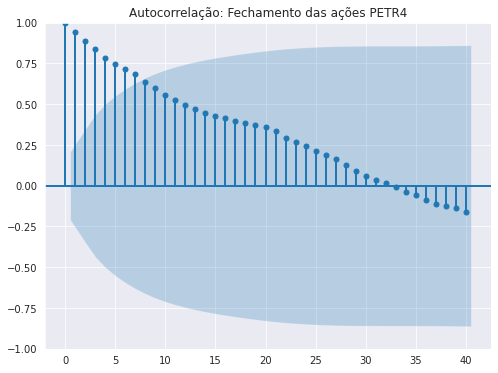

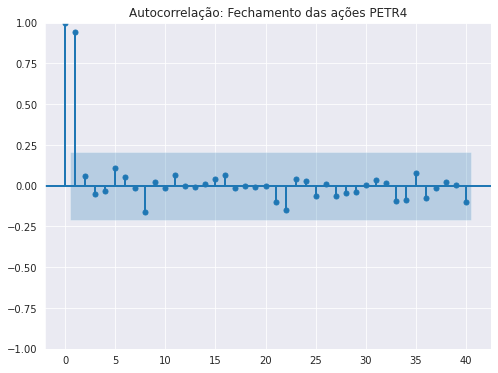

In [403]:
title = 'Autocorrelação: Fechamento das ações PETR4'
lags = 40
plot_acf(df2['Close'],title=title,lags=lags);
plot_pacf(df2['Close'],title=title,lags=lags, method='ywm'); # Método atualizado na nova versão
plt.show();

Vamos dar uma olhada no <tt> pmdarima.auto_arima </tt> feito com o stepwise_fit para ver se ter os termos $p$ e $q$ o mesmo ainda faz sentido:

In [404]:
stepwise_fit = pm.auto_arima(df2['Close'], start_p=0, start_q=0,
                          max_p=3, max_q=3, m=7,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # se uma ordem não funcionar, ignorar
                          suppress_warnings=True,  # ignorar avisos
                          stepwise=True)           # executa stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=152.390, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=153.013, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=152.598, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=154.944, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=152.746, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.109 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   88
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -74.195
Date:                Mon, 25 Nov 2024   AIC                            152.390
Time:                        11:28:55   BIC                            157.322
Sample:                             0   HQIC                           154.376
                                 - 88                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1316      0.062      2.124      0.034       0.010       0.253
sigma2         0.3223      0.053      6.046      0.000       0.218       0.427
===================================================================================
Ljung-Box (L1) (Q):                   1.40   Jarque-Bera (JB):                 1.14
Prob(Q):                              0.24   Prob(JB):                         0.57
Heteroskedasticity (H):               0.57   Skew:                             0.25
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Vamos avaliar o modelo ARIMA (0,1,0) em bases de treino e teste


### Divida os dados em conjuntos de treino / teste

In [405]:
len(df2)

88

In [406]:
# Defina as bases de treino e teste
treino = df2.iloc[:70]
teste = df2.iloc[70:]

In [407]:
## Atenção! Versões diferentes de pacotes podem levar a previsões diferentes

from statsmodels.tsa.arima.model import ARIMA

# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")

modelo = ARIMA(treino['Close'], order=(0,1,0))
resultados = modelo.fit()
resultados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                   70
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -63.547
Date:                Mon, 25 Nov 2024   AIC                            129.094
Time:                        11:28:56   BIC                            131.328
Sample:                    03-18-2020   HQIC                           129.981
                         - 06-23-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.3694      0.063      5.876      0.000       0.246       0.493
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 0.99
Prob(Q):                              0.80   Prob(JB):                         0.61
Heteroskedasticity (H):               0.53   Skew:                             0.26
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Previsões

In [408]:
inicio=len(treino)
fim=len(treino)+len(teste)-1
previsoes = resultados.predict(start=inicio,end = fim, dynamic=False, typ='levels').rename('Previsões ARIMA (0,1,0)')

Passar <tt> dynamic = False </tt> significa que as previsões em cada ponto são geradas usando o histórico completo até aquele ponto (todos os valores defasados).

Passar <tt> typ = 'levels' </tt> prevê os níveis das variáveis endógenas originais. Se tivéssemos usado o padrão <tt> typ = 'linear' </tt>, teríamos visto previsões lineares em termos de variáveis endógenas diferenciadas.

Para obter mais informações sobre esses argumentos, visite https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMAResults.predict.html

<Axes: >

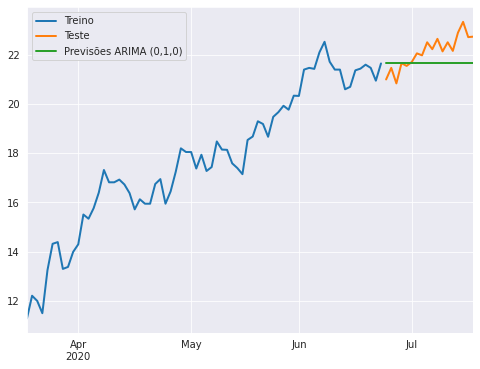

In [409]:
treino['Close'].plot(legend=True, label='Treino')
teste['Close'].plot(legend=True, label='Teste')
previsoes.plot(legend=True, figsize=(8,6))


### Treine novamente o modelo com os dados completos e preveja o futuro

In [410]:
modelo = ARIMA(df2['Close'],order=(0,1,0))
resultados = modelo.fit()
fcast = resultados.predict(len(df2),len(df2)+11,typ='levels').rename('Previsões ARIMA(0,1,0) ')

[Text(0.5, 0, ''), Text(0, 0.5, 'Fechamentos')]

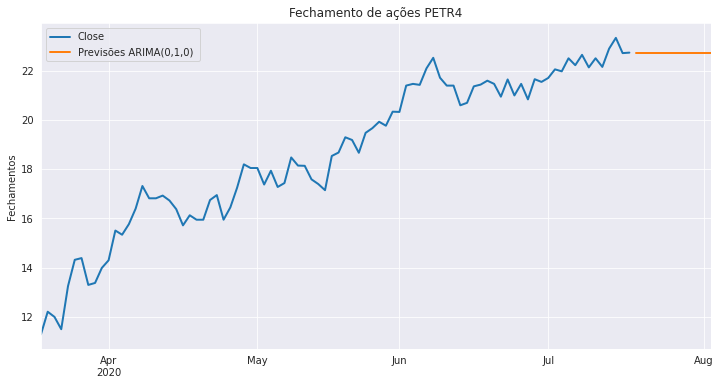

In [411]:
# Previsão
title = 'Fechamento de ações PETR4'
ylabel='Fechamentos'
xlabel=''

ax = df2['Close'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)


**Como exercício, verifique se o ARIMA com sazonalidade traz previsões melhores para esses dados. Para isso, use seasonal=True no auto_arima.**

# Modelos ARIMA, SARIMA. Diagnóstico.


por **Cibele Russo**

Baseado em

- MORETTIN, P. A.; TOLOI, C. M. C.. Análise de séries temporais: modelos lineares univariados. 3. ed. São Paulo: Blucher, 2018.

- EHLERS, R.S. Análise de Séries Temporais. ICMC USP. 2009.


Implementações:

- BROWNLEE, J. Introduction to time series forecasting with python: how to prepare data and develop models to predict the future. Machine Learning Mastery, 2017.

Leituras adicionais:

- HYNDMAN, R. J., ATHANASOPOULOS, G.; Forecasting: principle and practice: O Texts; 2nd edition. 2018. Acesso em 09/07/2022.

- https://otexts.com/fpp2/non-seasonal-arima.html
- https://otexts.com/fpp2/seasonal-arima.html



**Vamos fazer uma pequena revisão da aula anterior?**

Sejam

- $\tilde{Z}_t = Z_t -\mu$


- $B^m Z_t = Z_{t-m}$ (Operador translação (defasagem, backshift))


- $F^m Z_t = Z_{t+m}$ (Operador translação para o futuro (forward))


- $\Delta = (1-B)$ (Operador diferença)


- $S Z_t = (1-B)^{-1}Z_t = \Delta^{-1}Z_t$ (Operador soma)






## Modelos autorregressivos - AR(p)

$$\tilde{Z}_{t} = \phi_{1}\tilde{Z}_{t-1} + \phi_{2}\tilde{Z}_{t-2} + \ldots + \phi_{p}\tilde{Z}_{t-p} + a_{t}$$

onde $a_{t}$ é um ruído branco.

Sendo o operador autorregressivo estacionário de ordem p dado por

$$\phi(B) = 1-\phi_1 B-\phi_2 B^2-\ldots -\phi_p B^p,$$

podemos reescrever o modelo AR(p) como

$$\phi(B)\tilde{Z}_{t} =  a_{t}$$


## Modelos de médias móveis - MA(q)

$$\tilde{Z}_{t} =  a_t  -  \theta_{1}a_{t-1} -\ldots - \theta_q a_{t-q}$$

$$\tilde{Z}_{t} = (1-\theta_1 B - \ldots -\theta_q B^q) a_t $$

Assim

$$\tilde{Z}_{t}=\theta(B) a_t$$

onde $\theta(B) = 1-\theta_1 B-\ldots-\theta_q B^q$ é o operador de médias móveis de ordem $q$.


## Modelos ARMA(p,q)

Os modelos ARMA(p,q) são dados na forma

$$\tilde{Z}_{t} = \phi_{1}\tilde{Z}_{t-1} + \ldots + \phi_{p}\tilde{Z}_{t-p} +  a_t  -  \theta_{1}a_{t-1} -\ldots - \theta_q a_{t-q}$$

ou podemos reescrever

$$\phi(B)\tilde{Z}_{t} = \theta(B) a_t$$

em que

- $\phi(B)$ é o operador autorregressivo

- $\theta(B)$ é o operador de médias móveis


# Modelos ARIMA (p,d,q)


**Componentes de um modelo ARIMA (p,d,q):**

- **AR (p)**: Componentes autorregressivas, utilizam a relação de dependência entre a observação corrente e as observações em um período prévio

- **Integrado (d)**: Diferenças para tornar a série estacionária

- **MA (q)**: Componentes de médias móveis, utilizam a dependência entre uma obervação e um erro residual de um modelo de média móvel aplicado a observações em atraso.





Considere que $Z_t$ não é estacionária mas

$$W_t = \Delta^d Z_t$$

é uma série estacionária e utilizamos portanto um modelo ARMA(p,q) para $W_t$, ou seja,

$$\phi(B) W_t = \theta(B) a_t.$$

Se $W_t$ for uma diferença de $Z_t$, então dizemos que $Z_t$ segue um modelo autorregressivo _integrado_ de médias móveis, ou um modelo ARIMA:

$$\phi(B) \Delta^d Z_t = \theta(B) a_t$$

de ordem (p,d,q) e escrevemos ARIMA (p,d,q) em que $p$ e $q$ são as ordens de $\phi(B)$ e $\theta(B)$, respectivamente.



# Modelos SARIMA (p,d,q)x(P, D,Q)m

- **SARIMA: ARIMA com sazonalidade**


- Componente sazonal se repete a cada $m$ observações ($m>1$).


- Com dados mensais e $m=12$, tipicamente espera-se que $Z_t$ dependa de $Z_{t-12}$ e talvez $Z_{t-24}$ além de $Z_{t-1}, Z_{t-2}$, ...


- Tomar a primeira diferença $\Delta Z_t = Z_t -Z_{t-1}$ não é suficiente para tornar a
série (aproximadamente) estacionária.


- Considere as diferenças sazonais
$$\Delta_m Z_t = (1 - B^m )Z_t = Z_t - Z_{t-m}$$
sendo $m$ o periodo da sazonalidade.


- A D-ésima diferença sazonal é denotada por $\Delta^D_m$.


- Combinando-se diferenciação simples e sazonais obtem-se o operador $\Delta^d\Delta^D_m$.


**Componentes de um modelo SARIMA (p,d,q)x(P,D,Q)m:**

- $(p,d,q)$: componentes não-sazonais
- $(P,D,Q)_m$: componentes sazonais

Aqui $m$ é o período da sazonalidade.


$$\phi(B) \Phi(B^m ) W_t = \theta(B) \Theta(B^m ) a_ t$$

onde

- $\phi(B) = (1-\alpha_1 B-\ldots \alpha_p B^p)$

- $\Phi(B^m)= (1- \phi_1 B^m-\ldots - \phi_p B^{P_m})$

- $W_t = \Delta^d \Delta^D Z_t = (1-B)^d (1-B^m)^D Z_t$

- $\theta(B) = (1+\beta_1 B + \ldots + \beta_q B^q)$

- $\Theta(B^m) = (1+\theta_1 B^m+\ldots+\theta_Q B^{Q_m})$






**Exemplo:** Série mensal com 1 diferença simples e 1 sazonal com período 12


$\begin{array}{lll}
\Delta \Delta_{12} Z_t & =& (1-B)(1-B^{12})Z_t\\
&=& (1-B-B^{12}+B^{13}) Z_t\\
&=& Z_t-Z_{t-1}-Z_{t-12}+Z_{t-13}\end{array}$


**Exemplo:** Modelo $\text{ SARIMA(1,0,0)}\times(0,1,1)_{12}$


$\begin{array}{rll}
(1-\phi B)(1-B^{12})Z_t &=& (1-\theta B^{12})a_t\\
Z_t &=& Z_{t-12}+\phi(Z_{t-1}-Z_{t-13})+a_t-\theta a_{t-12}\end{array}$



**Observações**

- Na prática os valores de d e D em geral não serão muito maiores do que 1 e um número pequeno de coeficientes será suficiente.

-  Especificar os valores de d e D que tornam a série (aproximadamente) estacionária e remove a maior parte da sazonalidade.

-  Os valores de p, P, q e Q devem ser especificados com base nas funções de autocorrelação e autocorrelação parcial da série diferenciada.

-  Os valores de P e Q são especificados basicamente olhando-se para as defasagens $k = m, 2m, \ldots.$

## Aplicação

<Axes: >

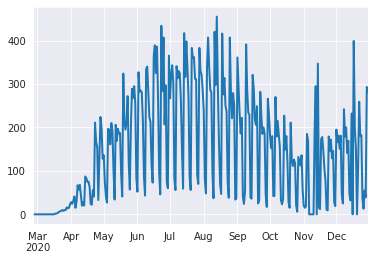

In [412]:
import pandas as pd
import numpy as np
%matplotlib inline

from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")

np.random.seed(0)

covidSP = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/covidSP.csv', index_col='date', parse_dates=True)

idx = pd.date_range(start=covidSP.index.min(), end=covidSP.index.max(), freq='D')
covidSP = covidSP.reindex(idx)
covidSP.fillna(0,inplace=True)

covidSP['deaths'].plot()

In [413]:
covidSP.index.max()


Timestamp('2020-12-30 00:00:00')

Vamos considerar a decomposição em sazonalidade e tendência em um modelo aditivo, nesse caso porque temos muitos zeros.

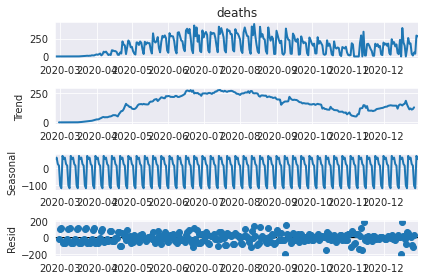

In [414]:
result = seasonal_decompose(covidSP['deaths'], model='additive')
result.plot();

Há sazonalidade nos dados, devido à sistemática de notificações

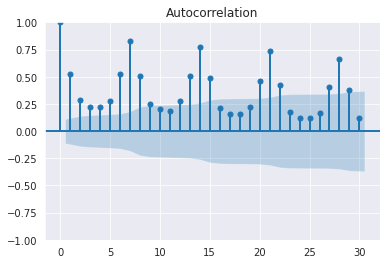

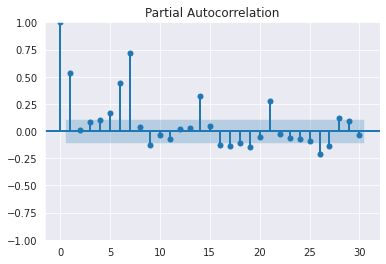

In [415]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # para determinar (p,q)

# Correlograma

plot_acf(covidSP['deaths'], lags=30)
plot_pacf(covidSP['deaths'], lags=30)
plt.show()

In [416]:
# Ajuste de modelo SARIMA

auto_arima(covidSP['deaths'],seasonal=True,m=7).summary()


stepwise_fit = auto_arima(covidSP['deaths'], start_p=0, start_q=0,
                          max_p=6, max_q=3, m=7,
                          seasonal=True,
                          trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=3579.716, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=3825.903, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=3563.494, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=3581.821, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=3823.921, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=3808.539, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=3519.108, Time=0.60 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=3488.255, Time=1.08 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=3486.546, Time=0.91 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=3683.983, Time=0.15 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=3488.166, Time=0.89 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=3635.827, Time=0.70 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=inf, Time=0.99 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=3454.120, Time=0.72 sec
 ARIMA(2,1,0)(0,0,1)[7] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  309
Model:             SARIMAX(6, 1, 0)x(2, 0, [1, 2], 7)   Log Likelihood               -1680.329
Date:                                Mon, 25 Nov 2024   AIC                           3382.659
Time:                                        11:32:06   BIC                           3423.690
Sample:                                             0   HQIC                          3399.065
                                                - 309                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9565      0.041    -23.483      0.000      -1.036      -0.877
ar.L2         -0.8957      0.071    -12.546      0.000      -1.036      -0.756
ar.L3         -0.7751      0.084     -9.224      0.000      -0.940      -0.610
ar.L4         -0.7331      0.111     -6.631      0.000      -0.950      -0.516
ar.L5         -0.6990      0.100     -6.978      0.000      -0.895      -0.503
ar.L6         -0.5315      0.110     -4.812      0.000      -0.748      -0.315
ar.S.L7        1.2647      0.156      8.126      0.000       0.960       1.570
ar.S.L14      -0.3080      0.144     -2.131      0.033      -0.591      -0.025
ma.S.L7       -1.4971      0.104    -14.418      0.000      -1.701      -1.294
ma.S.L14       0.7018      0.089      7.890      0.000       0.527       0.876
sigma2      3161.6837    171.606     18.424      0.000    2825.341    3498.026
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):               402.22
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               2.69   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [417]:
len(covidSP)

309

In [418]:
len(covidSP)*0.9

278.1

In [419]:
treino = covidSP.iloc[:278]
teste = covidSP.iloc[278:]

In [420]:
modelo = SARIMAX(treino['deaths'],order=(0,1,1),seasonal_order=(1,0,1,7))
resultado = modelo.fit()
resultado.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.83314D+00    |proj g|=  1.04700D-01


 This problem is unconstrained.



At iterate    5    f=  5.75463D+00    |proj g|=  1.06307D-02

At iterate   10    f=  5.51723D+00    |proj g|=  2.04163D-02

At iterate   15    f=  5.46606D+00    |proj g|=  3.84751D-02

At iterate   20    f=  5.42586D+00    |proj g|=  3.95661D-02

At iterate   25    f=  5.41081D+00    |proj g|=  5.15917D-03

At iterate   30    f=  5.41041D+00    |proj g|=  2.55884D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     49      1     0     0   2.559D-07   5.410D+00
  F =   5.4104095202615490     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                            deaths   No. Observations:                  278
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -1504.094
Date:                           Mon, 25 Nov 2024   AIC                           3016.188
Time:                                   11:32:06   BIC                           3030.684
Sample:                               02-26-2020   HQIC                          3022.004
                                    - 11-29-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9181      0.024    -38.831      0.000      -0.964      -0.872
ar.S.L7        0.9652      0.018     54.002      0.000       0.930       1.000
ma.S.L7       -0.6308      0.052    -12.188      0.000      -0.732      -0.529
sigma2      2935.5057    135.109     21.727      0.000    2670.697    3200.314
===================================================================================
Ljung-Box (L1) (Q):                   1.07   Jarque-Bera (JB):               544.32
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [421]:
resultado.fittedvalues

2020-02-26      0.000000
2020-02-27      0.000000
2020-02-28      0.000000
2020-02-29      0.000000
2020-03-01      0.000000
                 ...    
2020-11-25    169.508288
2020-11-26    171.827578
2020-11-27     75.707054
2020-11-28    134.617751
2020-11-29     23.737495
Freq: D, Length: 278, dtype: float64

In [422]:
# Obtain predicted values
inicio=len(treino)
fim=len(treino)+len(teste)-1
previsões = resultado.predict(start=inicio, end=fim, dynamic=False).rename('Previsões SARIMA(0,1,1)(1,0,1,7) ')
previsões.index = teste.index


In [423]:
previsões

2020-11-30     20.604151
2020-12-01    133.815704
2020-12-02    162.275209
2020-12-03    173.646237
2020-12-04     98.627527
2020-12-05    138.719915
2020-12-06     28.733013
2020-12-07     24.063354
2020-12-08    133.331820
2020-12-09    160.800098
2020-12-10    171.775081
2020-12-11     99.369225
2020-12-12    138.065221
2020-12-13     31.909093
2020-12-14     27.402076
2020-12-15    132.864790
2020-12-16    159.376365
2020-12-17    169.969096
2020-12-18    100.085090
2020-12-19    137.433329
2020-12-20     34.974552
2020-12-21     30.624512
2020-12-22    132.414025
2020-12-23    158.002219
2020-12-24    168.226013
2020-12-25    100.776023
2020-12-26    136.823446
2020-12-27     37.933244
2020-12-28     33.734712
2020-12-29    131.978961
2020-12-30    156.675934
Freq: D, Name: Previsões SARIMA(0,1,1)(1,0,1,7) , dtype: float64

Passar <tt> dynamic = False </tt> significa que as previsões em cada ponto são geradas usando o histórico completo até aquele ponto (todos os valores defasados).

Passar <tt> typ = 'levels' </tt> prevê os níveis das variáveis endógenas originais. Se tivéssemos usado o padrão <tt> typ = 'linear' </tt>, teríamos visto previsões lineares em termos de variáveis endógenas diferenciadas.

Para obter mais informações sobre esses argumentos, visite https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMAResults.predict.html

In [424]:
for i in range(len(previsões)):
    print(f"predicted={previsões[i]:<11.10}, expected={teste['deaths'][i]}")

predicted=20.60415104, expected=19.0
predicted=133.8157038, expected=195.0
predicted=162.2752087, expected=166.0
predicted=173.6462375, expected=181.0
predicted=98.62752666, expected=151.0
predicted=138.7199155, expected=181.0
predicted=28.73301283, expected=46.0
predicted=24.06335436, expected=25.0
predicted=133.33182  , expected=242.0
predicted=160.8000982, expected=179.0
predicted=171.7750812, expected=200.0
predicted=99.36922492, expected=141.0
predicted=138.0652211, expected=169.0
predicted=31.90909301, expected=47.0
predicted=27.4020758 , expected=32.0
predicted=132.8647895, expected=232.0
predicted=159.376365 , expected=0.0
predicted=169.9690962, expected=399.0
predicted=100.0850903, expected=197.0
predicted=137.4333293, expected=151.0
predicted=34.97455232, expected=0.0
predicted=30.62451168, expected=107.0
predicted=132.4140255, expected=259.0
predicted=158.0022194, expected=181.0
predicted=168.2260125, expected=182.0
predicted=100.7760225, expected=37.0
predicted=136.8234458,

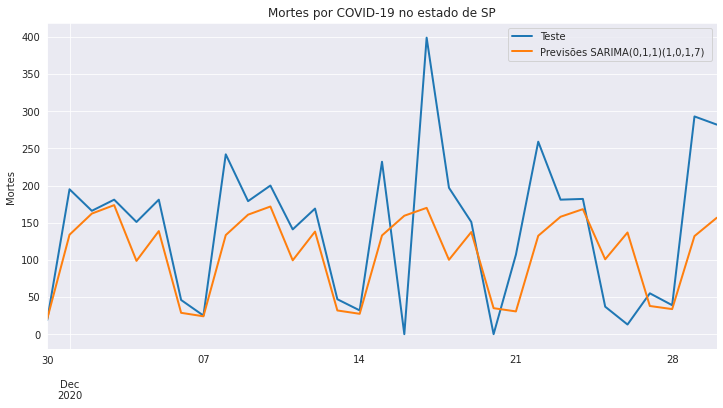

In [425]:
# Plot predictions against known values
title = 'Mortes por COVID-19 no estado de SP'
ylabel='Mortes '
xlabel=''

ax = teste['deaths'].plot(legend=True,figsize=(12,6),title=title, label='Teste')
previsões.plot(legend=True)

ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

<Axes: >

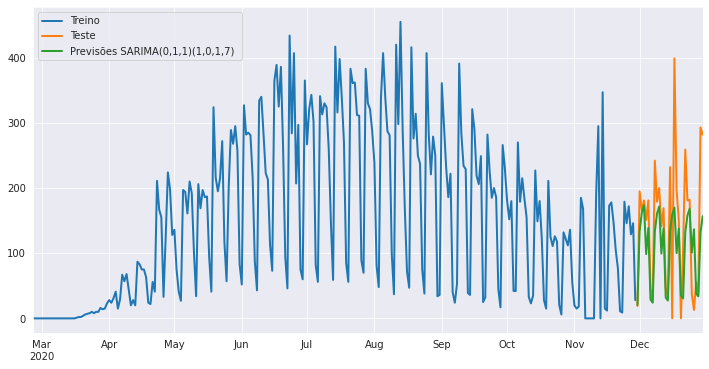

In [426]:
treino['deaths'].plot(legend=True, label='Treino')
teste['deaths'].plot(legend=True, label='Teste')
previsões.plot(legend=True, figsize=(12,6))

### Previsões para dados cujos tempos ainda não estão nas bases

In [427]:
# Notem o uso de "trend", vejam o help para outras variações = Aqui tem mais uma possibilidade para buscar o melhor ajuste.

modelo = SARIMAX(covidSP['deaths'],order=(0,1,1),seasonal_order=(1,0,1,7), trend='c')
resultados = modelo.fit()
fcast = resultados.predict(len(covidSP),len(covidSP)+14).rename('Previsões SARIMA(1,0,1)(1,0,1,7)')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.85370D+00    |proj g|=  1.17058D-01

At iterate    5    f=  5.78649D+00    |proj g|=  1.43190D-02


 This problem is unconstrained.



At iterate   10    f=  5.74890D+00    |proj g|=  2.20579D-02

At iterate   15    f=  5.56386D+00    |proj g|=  5.18626D+00

At iterate   20    f=  5.55699D+00    |proj g|=  4.89409D-03

At iterate   25    f=  5.55692D+00    |proj g|=  7.28132D-02
  ys=-1.520E-02  -gs= 7.351E-03 BFGS update SKIPPED

At iterate   30    f=  5.52142D+00    |proj g|=  4.76876D-02

At iterate   35    f=  5.46809D+00    |proj g|=  1.99863D-02

At iterate   40    f=  5.46105D+00    |proj g|=  3.41647D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     90      1     1     0   7.630D-07   5.461D+00
  F =   5.4610418812740340     

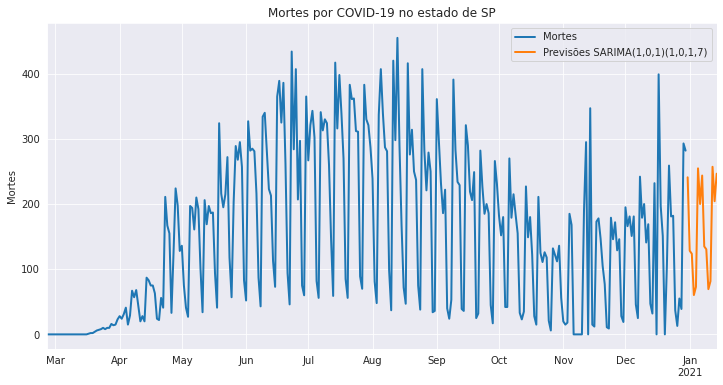

In [428]:
title = 'Mortes por COVID-19 no estado de SP'
ylabel='Mortes'
xlabel=''

ax = covidSP['deaths'].plot(legend=True,figsize=(12,6),title=title, label='Mortes')
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

**Exercício: É possível melhorar as previsões para os dados de PETR4 com o SARIMA sazonal?**

## Diagnóstico em modelos SARIMA

### Métricas

In [429]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(teste['deaths'], previsões)
print(f'EQM SARIMA(0,1,1)(1,0,1,7): {error:11.10}')

EQM SARIMA(0,1,1)(1,0,1,7): 6675.195956


In [430]:
from statsmodels.tools.eval_measures import rmse

error = rmse(teste['deaths'], previsões)
print(f'REQM SARIMA(0,1,1)(1,0,1,7): {error:11.10}')

REQM SARIMA(0,1,1)(1,0,1,7): 81.70187241


### Análise de resíduos

Considere inicialmente um modelo ARIMA

$\phi(B) W_t = \theta(B) a_t$ com $W_t = \Delta^d Z_t$ supondo que $a_t$ é um ruído branco.

Se o modelo for verdadeiro, então os erros verdadeiros $a_t = \theta^{-1}(B) \phi(B) W_t$ devem ser um ruído branco.

Uma análise equivalente poderia ser feita para modelos mais gerais SARIMA.

Quando o modelo é estimado, ou seja, quando são obtidos $\widehat{\theta}$ e $\widehat{\phi}$, as quantidades

$$\widehat{a}_t = \widehat{\theta}^{-1}(B) \widehat{\phi}(B) W_t$$

são chamadas de **resíduos**. Se o modelo for correto, eles devem ser aproximadamente não correlacionados.

Uma forma de analisar os resíduos ajustados é simplesmente considerar

$$r_t = Z_t - \widehat{Z}_t$$

e podemos analisar a distribuição, estatísticas descritivas, a autocorrelação dos resíduos e verificar se existe algum padrão nos mesmos.

Leitura adicional: https://otexts.com/fpp2/residuals.html

In [431]:
# Uma forma de obter os resíduos pelo ajuste do modelo

resíduos = resultados.resid

In [432]:
resíduos.describe()

count    309.000000
mean      -0.376648
std       57.008281
min     -291.854862
25%      -24.506031
50%       -1.613624
75%       23.350758
max      306.678979
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7e2f88b74250>,
 'caps': [<matplotlib.lines.Line2D at 0x7e2f88b77430>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e2f88b764a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e2f88b76500>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e2f88b751e0>],
 'means': []}

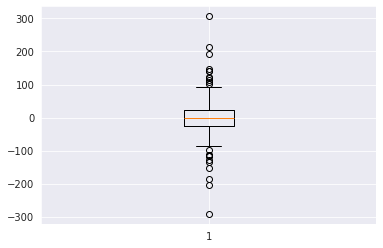

In [433]:
plt.boxplot(resíduos)

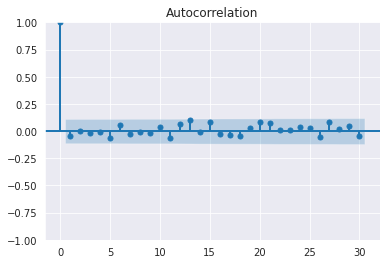

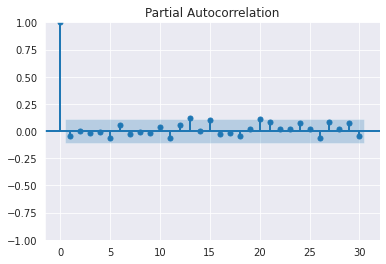

In [434]:
plot_acf(resíduos, lags=30)
plot_pacf(resíduos, lags=30)
plt.show()

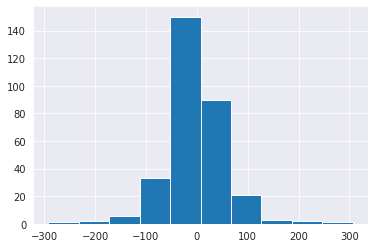

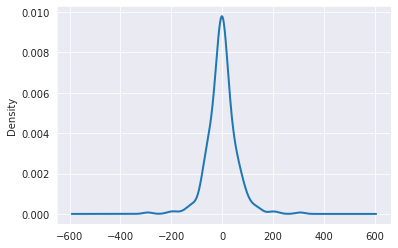

In [435]:
from matplotlib import pyplot


resíduos.hist()

pyplot.show()
resíduos.plot(kind='kde')
pyplot.show()

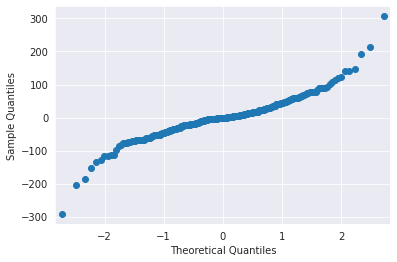

In [436]:
from statsmodels.graphics.gofplots import qqplot

qqplot(resíduos)
pyplot.show()

**Exercício: O que aconteceria com os resíduos se um modelo incorreto tivesse sido ajustado?**

# Previsão de séries temporais: Método Theta e expansões

por **Cibele Russo**




Baseado em

- ASSIMAKOPOULOS, V., NIKOLOPOULOS, K. The theta model: a decomposition approach to forecasting. International Journal of Forecasting, v. 16, n. 4, p. 521-530, 2000.

Implementações:

https://www.statsmodels.org/devel/examples/notebooks/generated/theta-model.html

Leituras adicionais:

- FIORUCCI, J. A., PELLEGRINI, T. R., LOUZADA, F., PETROPOULOS, F., & KOEHLER, A. B. (2016). Models for optimising the theta method and their relationship to state space models. International Journal of Forecasting, 32(4), 1151-1161. Disponível em https://www.sciencedirect.com/science/article/pii/S0169207016300243. Acessado em 07/08/2022.


- FIORUCCI, J. A. (2016). Time series forecasting:advances on Theta method. Tese de doutorado. Disponível em https://repositorio.ufscar.br/bitstream/handle/ufscar/7399/TeseJAF.pdf?sequence=1&isAllowed=y. Acessado em 07/08/2022.

- PELLEGRINI, T. R. Uma avaliação de métodos de previsão aplicados à grandes quantidades de séries temporais univariadas. Dissertação de mestrado. Universidade Federal de São Carlos. 2012. Disponível em https://repositorio.ufscar.br/bitstream/handle/ufscar/4563/4757.pdf?sequence=1&isAllowed=y. Acessado em 07/08/2022.

- HYNDMAN, R. J., KOEHLER, A. B., SNYDER, R. D., \& GROSE, S. (2002). A state space framework for automatic forecasting using exponential smoothing methods. International Journal of Forecasting, 18(3), 439-454.

- HYNDMAN, R. J., & BILLAH, B. (2003). Unmasking the Theta method. International Journal of Forecasting, 19(2), 287-290.




## Método Theta

- O método Theta é simples e preciso para se fazer previsão (forecasting) em séries temporais.


- Premiado na Competição M3 de forecasting https://en.wikipedia.org/wiki/Makridakis_Competitions


- Suposição: A série é não-sazonal ou dessazonalizada


- Tem relação com o método de Suavização exponencial simples (SES)


**Resumo do Metodo Theta**


1. O método decompõe a série temporal original em duas novas linhas através dos chamados coeficientes Theta, que são aplicados à segunda diferença dos dados. O processo de decomposição tem a vantagem de explorar informações nos dados que geralmente não são capturados e modelados completamente através da extrapolação da série temporal original.


2. As chamadas Linhas-Theta podem ser consideradas como novas séries temporais e são extrapoladas separadamente usando um método de previsão apropriado.


3. Concluída a extrapolação de cada Linha Theta, a recomposição ocorre por meio de um esquema de combinação, a fim de calcular as previsões pontuais da série temporal original.


4. A combinação das Linhas Theta é considerada para a previsão.




Os passos do algoritmo para a implementação (PELLEGRINI, 2012) são


1. **Teste de Sazonalidade**: Teste cada série temporal para verificar a existência de comportamento sazonal via teste para a função de autocorrelação, com lag de um ano para séries anuais, lag de 12 meses para séries mensais e lag de 4 meses para séries trimestrais e assim por diante.  

    De uma forma geral, a série é considerada sazonal se
    
    $$|r_m| > q_{1-a/2}\sqrt{\displaystyle\frac{1+2\sum_{i=1}^{m-1}r_i^2}{n}}$$
    
    em que $r_k$ é a função e autocorrelação de lag $k$, $m$ é o número de períodos do ciclo sazonal (por exemplo, 12 meses em uma sazonalidade anual), $n$ é o tamanho amostral, $q$ é o quantil da distribuição normal e $(1-a/2)$ é o nível de confiança do teste. Se a série for identificada como sazonal, é necessário fazer uma decomposição para eliminar a sazonalidade.  


2. **Dessazonalização**: Dessazonalize as séries temporais identificadas no passo 1 através do método de decomposição clássica (multiplicativo).


3. **Decomposição**: Cada série temporal é decomposta em duas linhas-Theta, $Z_t(0)$ e $Z_t(2)$.


4. **Extrapolação**: $Z_t(0)$ e $Z_t(2)$ são extrapoladas respectivamente através do modelo de regressão linear e do modelo de alisamento exponencial simples.


5. **Combinação**: As previsões produzidas por $\widehat{Z}_{t+h}(0)$ e $\widehat{Z}_{t+h}(2)$ são combinadas a partir da média aritmética.


6. **Resazonalização**: As previsões do passo anterior são resazonalizadas resultando nas previsões finais.


## O Método Theta


O método Theta é baseado no conceito de modificação das curvaturas locais da série temporal.   Esta  mudança  é  obtida  a  partir  de  um  coeficiente,  denominado  coeficiente Theta,  denotado  pela  letra  grega  $\theta$.


Originalmente, ASSIMAKOPOULOS & NIKOLOPOULOS (2000) propuseram a Linha Theta como a solução da equação

$$\Delta^2 Z_t(\theta) = \theta \Delta^2 Y_t, t=3,\ldots,n$$


em que

$Y_1,\ldots, Y_n$ é a série original (não sazonal ou dessazonalizada) e $\Delta$ é o operador diferença

$$\Delta Z_t = Z_t - Z_{t-1}.$$

Os valores iniciais de $Z_1$ e $Z_2$ são obtidos minimizando

$$\sum_{t=1}^{n} [Y_t - Z_t(\theta)]^2$$

Entretanto, uma solução analítica para calcular $Z(\theta)$ é dada por

$$Z_t(\theta) = \theta Y_t + (1-\theta)(A_n + B_n t), \ t=1,\ldots, n$$

em que $A_n$ e $B_n$ são coeficientes de mínimos quadrados de um modelo de regressão linear de $Y_1,\ldots, Y_n$ contra $1,\ldots,n$ (as expressões são dadas em FIORUCCI (2016)).

## Generalizações para o Método Theta

- Existem algumas propostas de generalização do Método Theta na literatura

- Modelos para otimizar o Método Theta são apresentados por FIORUCCI et. al (2016)

### Modelo Theta Otimizado

- Algumas adaptações são feitas e o modelo é reescrito como um modelo de espaço de estado (FIORUCCI et. al, 2016)

$\begin{array}{lll}
Y_t &=& \mu_t + \epsilon_t,\\
\mu_t &= & {{l}}_{t-1} + \left(1-\displaystyle{\frac{1}{\theta}}\right) \left\{(1-\alpha)^{t-1} A_n + \left[\displaystyle\frac{1-(1-\alpha)^t}{\alpha}\right] B_n\right\},\\
{l}_t &=& \alpha Y_t + (1-\alpha){l}_{t-1}
\end{array}$

com parâmetros ${l}_0 \in \mathbb{R}$, $\alpha\in(0,1)$ e $\theta\in[1,\infty]$.




A previsão pra $h$ passos à frente com origem em n é dada por

$\begin{array}{lll}\widehat{Y}_{n+h|n} &=& E[Y_{n+h}|Y_1,\ldots,Y_n]\\
&=&{l}_n + \left(\displaystyle 1-\frac{1}{\theta}\right)\times \\
&& \left\{(1-\alpha)^n A_n + \left[(h-1)+\displaystyle\frac{1-(1-\alpha)^{n+1}}{\alpha}\right] B_n\right\}\end{array}$

Além disso, é possível obter um intervalo de predição com nível de confiança de $(1-a)\%$

$\widehat{Y}_{n+h|n} \pm q_{1-a/2}\sqrt{[1+(h-1)\alpha^2]\sigma^2}$.

Se $\theta = 2$ é possível mostrar que este método produz as mesmas previsões do método usual.

## Aplicação do Método Theta em Python

In [437]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("figure",figsize=(12,6))
plt.rc("font",size=15)
plt.rc("lines",linewidth=2)
sns.set_style("darkgrid")

In [438]:
df = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/PETR4.csv', index_col=0, parse_dates=True)

df.head()

Open   High    Low  Close  Adj Close     Volume
Date                                                        
2020-03-18  11.79  12.27  10.87  11.29  11.289389  162515200
2020-03-19  11.07  13.07  10.85  12.21  12.209339  157065200
2020-03-20  13.11  13.50  11.83  12.00  11.999351  149029900
2020-03-23  12.11  12.18  11.28  11.50  11.499378  107092400
2020-03-24  12.57  13.54  12.28  13.25  13.249283  114259200

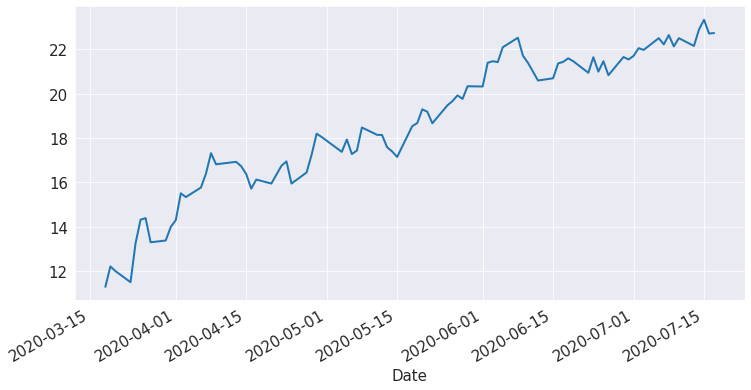

In [439]:
df['Close'].plot();

In [440]:
df.index

DatetimeIndex(['2020-03-18', '2020-03-19', '2020-03-20', '2020-03-23',
               '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27',
               '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
               '2020-04-03', '2020-04-06', '2020-04-07', '2020-04-08',
               '2020-04-09', '2020-04-13', '2020-04-14', '2020-04-15',
               '2020-04-16', '2020-04-17', '2020-04-20', '2020-04-22',
               '2020-04-23', '2020-04-24', '2020-04-27', '2020-04-28',
               '2020-04-29', '2020-04-30', '2020-05-04', '2020-05-05',
               '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-11',
               '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15',
               '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21',
               '2020-05-22', '2020-05-25', '2020-05-26', '2020-05-27',
               '2020-05-28', '2020-05-29', '2020-06-01', '2020-06-02',
               '2020-06-03', '2020-06-04', '2020-06-05', '2020-06-08',
      

In [441]:
idx = pd.date_range(start=df.index.min(), end=df.index.max(), freq='B')
df = df.reindex(idx)
df.fillna(method='ffill', inplace=True)

In [442]:
df.index

DatetimeIndex(['2020-03-18', '2020-03-19', '2020-03-20', '2020-03-23',
               '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27',
               '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
               '2020-04-03', '2020-04-06', '2020-04-07', '2020-04-08',
               '2020-04-09', '2020-04-10', '2020-04-13', '2020-04-14',
               '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-20',
               '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24',
               '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30',
               '2020-05-01', '2020-05-04', '2020-05-05', '2020-05-06',
               '2020-05-07', '2020-05-08', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-18',
               '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22',
               '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28',
               '2020-05-29', '2020-06-01', '2020-06-02', '2020-06-03',
      

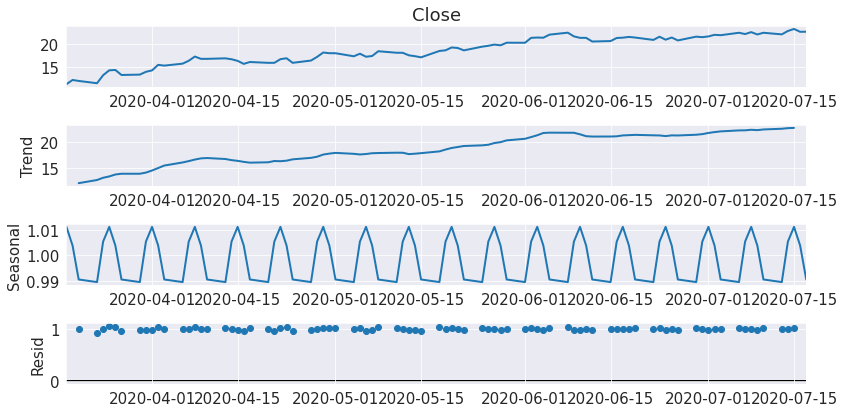

In [443]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

result = seasonal_decompose(df['Close'], model='multiplicative', period=5)
result.plot()

pyplot.show()

In [444]:
from statsmodels.tsa.forecasting.theta import ThetaModel
tm = ThetaModel(df['Close'])
res = tm.fit()
print(res.summary())

                              ThetaModel Results                              
Dep. Variable:                  Close   No. Observations:                   88
Method:                       OLS/SES   Deseasonalized:                   True
Date:                Mon, 25 Nov 2024   Deseas. Method:         Multiplicative
Time:                        11:32:11   Period:                              5
Sample:                    03-18-2020                                         
                         - 07-17-2020                                         
   Parameter Estimates   
           Parameters    
-------------------------
b0    0.11621184015881783
alpha  0.9125105051115893
-------------------------


In [445]:
res = ThetaModel(df['Close']).fit()
fcast = res.forecast(24)


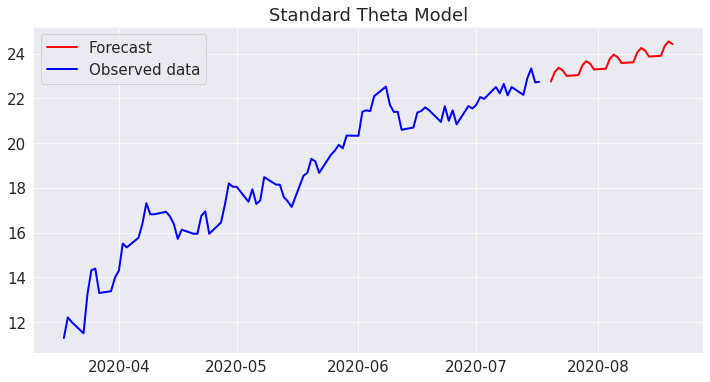

In [446]:
plt.figure(figsize = (12,6))

plt.plot(fcast,  color = 'red', label = 'Forecast')
plt.plot(df['Close'],color = 'blue', label = 'Observed data')


plt.title('Standard Theta Model')
plt.legend()
plt.show()

In [447]:
tm = ThetaModel(df['Close'], method="multiplicative")
res = tm.fit(use_mle=True)
print(res.summary())

                              ThetaModel Results                              
Dep. Variable:                  Close   No. Observations:                   88
Method:                           MLE   Deseasonalized:                   True
Date:                Mon, 25 Nov 2024   Deseas. Method:               Additive
Time:                        11:32:12   Period:                              5
Sample:                    03-18-2020                                         
                         - 07-17-2020                                         
  Parameter Estimates   
          Parameters    
------------------------
b0    0.1338257188850377
alpha 0.8208497367179584
------------------------


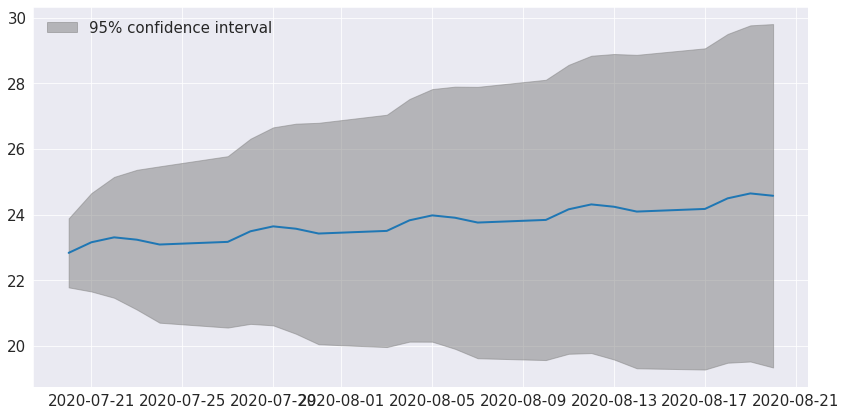

In [448]:
ax = res.plot_predict(24, theta=2)


**Exercício:** Calcule as métricas como erro quadrático médio, erro absoluto médio e raiz do erro quadrático médio para as previsões pontuais pelo método Theta.

### Combinação de todos os modelos para a previsão de dados de COVID-19

In [452]:
import numpy as np
import pandas as pd
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing
from pmdarima import auto_arima


# Função para calcular métricas de erro
def calcular_metricas(y_real, y_prev):
    rmse = np.sqrt(np.mean((y_real - y_prev)**2))
    mae = np.mean(np.abs(y_real - y_prev))
    return rmse, mae

# Dados de treino e teste
y_treino = dados_treino['deaths']
y_teste = dados_teste['deaths']

# 1. Modelo Holt
modelo_holt = Holt(y_treino).fit()
prev_holt = modelo_holt.forecast(len(y_teste))

# 2. Modelo Holt-Winters
modelo_hw = ExponentialSmoothing(y_treino, trend='add', seasonal='add', seasonal_periods=7).fit()
prev_hw = modelo_hw.forecast(len(y_teste))

# 3. Modelo ARIMA (auto_arima para seleção de parâmetros)
modelo_arima = auto_arima(y_treino, seasonal=True, m=7, trace=False, suppress_warnings=True)
prev_arima = modelo_arima.predict(n_periods=len(y_teste))

# 4. Modelo Theta
modelo_theta = ThetaModel(df['Close'], method="multiplicative")  # `h` é o horizonte de previsão; ajusta-se dinamicamente ao comprimento de teste
res = tm.fit(use_mle=True)  # O modelo Theta espera uma DataFrame com coluna 'y'
prev_theta = res.forecast(len(y_teste))




In [459]:
prev_theta

2020-07-20    22.835294
2020-07-21    23.157971
2020-07-22    23.307943
2020-07-23    23.236473
2020-07-24    23.089415
2020-07-27    23.169858
2020-07-28    23.492535
2020-07-29    23.642507
2020-07-30    23.571038
2020-07-31    23.423980
2020-08-03    23.504422
2020-08-04    23.827100
2020-08-05    23.977071
2020-08-06    23.905602
2020-08-07    23.758544
2020-08-10    23.838987
2020-08-11    24.161664
2020-08-12    24.311636
2020-08-13    24.240166
2020-08-14    24.093108
2020-08-17    24.173551
Freq: B, Name: forecast, dtype: float64

In [460]:
# Calcular métricas para cada modelo
metricas = pd.DataFrame({
    'Modelo': ['Holt', 'Holt-Winters', 'ARIMA', 'Theta'],
    'RMSE': [
        calcular_metricas(y_teste, prev_holt)[0],
        calcular_metricas(y_teste, prev_hw)[0],
        calcular_metricas(y_teste, prev_arima)[0],
        calcular_metricas(y_teste, prev_theta)[0]
    ],
    'MAE': [
        calcular_metricas(y_teste, prev_holt)[1],
        calcular_metricas(y_teste, prev_hw)[1],
        calcular_metricas(y_teste, prev_arima)[1],
        calcular_metricas(y_teste, prev_theta)[1]
    ]
})

print(metricas)

         Modelo        RMSE         MAE
0          Holt  129.208846  108.244186
1  Holt-Winters   56.811327   45.945781
2         ARIMA   73.646760   62.412288
3         Theta  287.730804  248.045385


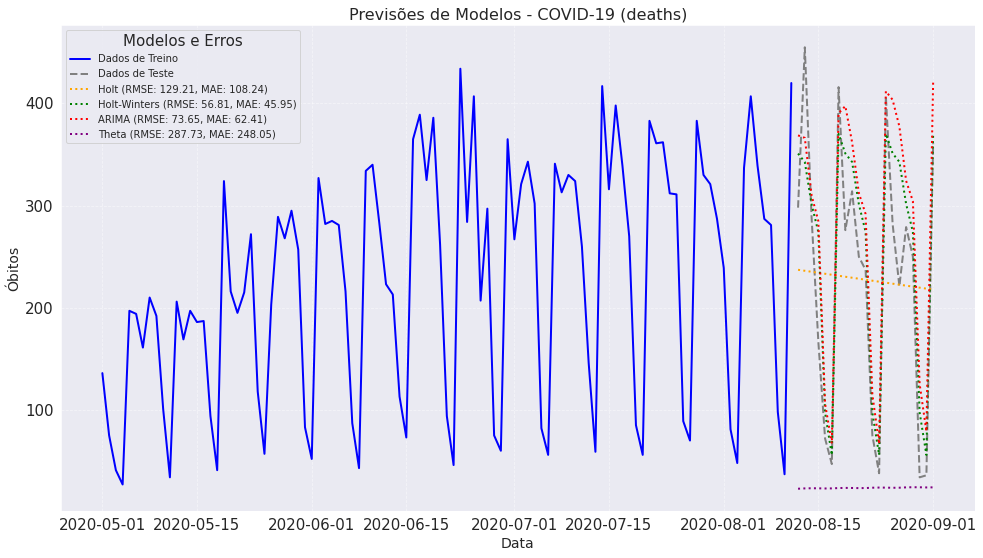

In [463]:
import matplotlib.pyplot as plt

# Criar o gráfico
plt.figure(figsize=(14, 8))

# Plotar os dados de treino
plt.plot(datas_treino, y_treino, label='Dados de Treino', color='blue', linewidth=2)

# Plotar os dados de teste
plt.plot(datas_teste, y_teste, label='Dados de Teste', color='gray', linestyle='dashed', linewidth=2)

# Adicionar previsões de cada modelo
plt.plot(datas_teste, prev_holt, label=f'Holt (RMSE: {metricas.loc[0, "RMSE"]:.2f}, MAE: {metricas.loc[0, "MAE"]:.2f})', color='orange', linestyle='dotted', linewidth=2)
plt.plot(datas_teste, prev_hw, label=f'Holt-Winters (RMSE: {metricas.loc[1, "RMSE"]:.2f}, MAE: {metricas.loc[1, "MAE"]:.2f})', color='green', linestyle='dotted', linewidth=2)
plt.plot(datas_teste, prev_arima, label=f'ARIMA (RMSE: {metricas.loc[2, "RMSE"]:.2f}, MAE: {metricas.loc[2, "MAE"]:.2f})', color='red', linestyle='dotted', linewidth=2)
plt.plot(datas_teste, prev_theta, label=f'Theta (RMSE: {metricas.loc[3, "RMSE"]:.2f}, MAE: {metricas.loc[3, "MAE"]:.2f})', color='purple', linestyle='dotted', linewidth=2)

# Configurações do gráfico
plt.title('Previsões de Modelos - COVID-19 (deaths)', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Óbitos', fontsize=14)
plt.legend(loc='upper left', fontsize=10, title='Modelos e Erros')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Mostrar o gráfico
plt.show()
